In [1]:
from PosSelect_Functions_Old import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.stats import norm
from collections import Counter
from scipy.stats import binomtest
import os

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

def parse_table(i):
    return [int(x) for x in i.replace("[", "").replace("]", "").split(",")]

d_abrev = {"LiangSteinNeuron":"FC exc. neur.", "FetalChondrocytes":"F chond.", "SertoliMale":"FG sertoli", "preGC_IIaFemale":"FG preGC IIa",\
          "NeuralFemale":"FG neur.", "FetalGonadImmuneFemale":"FG immune", "VIP":"AC VIP inh. neur.", "LiangSteinProgenitor":"FC prog.",\
          "AdultHeartVentricularCardiomyocyte":"AH cardiomyo.", "AdultLoopOfHenle":"AK loop of henle", "FetalBrainNeurGlioblast_CB_VZ":"FCB glioblast",\
         "AdultProximalTubule":"AK prox. tub.", "FetalLeydigMale":"FG leydig", "SST":"AC SST inh neur.", "KosoyRoussosControlMicroglia":"AC microglia",\
         "FetalBrainFloorPlate":"FB fl. plate", "FetalArterialECs":"FH endoth.", "ASCT":"AC astro.", "FetalBrainCOP":"FB COP",\
         "AMY":"AA neur.", "PVALB":"AC PVALB inh neur.", "ITL23":"AC L2-3 IT neur.", "FetalBrainNeurCB_GNP_IPC_1":"FB inter. prog.", "FetalBrainNeurDAergic":"FB DA neur.",\
          "OGC":"AC Oligo.", "D1Pu":"AP D1 inh neur.", "FetalBrainNeurSerotonergic":"FB 5-HT neur.", "FetalBrainNeurDRG_2":"FS DRG neur.",\
          "FetalHeartPericytes":"FH peri.", "FetalHeartEndocardium":"FH endocard.", "FetalHeartCardiacFibroblasts":"FH fibro.", "FetalBrainNeurPurkinje_6":"FCB Purk. inh neur.",\
          "AdultHeartSmoothMuscle":"AH smooth musc.", "FetalBrainRoofPlate":"FB ro. plate"}

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [96]:
df = pd.DataFrame()
for file in os.listdir("ReinfOppo"):
    if "FE" in file and "pLI" in file:
        v = pd.read_csv("ReinfOppo/" + file, sep = "\t")
        v.columns = ["StartSpecSup", "Big_Cutoff", "PosLFC_Cutoff", "NegLFC_Cutoff", "LFC_Cutoff", "DecOrInc", "MagRestr", "[[fixed_reinf, fixed_oppo], [poly_reinf, poly_oppo]]", "Fisher exact OR", "Fisher exact p-value"]
        v["ID"] = v.index
        v["ID"] = v["ID"].replace(np.nan, "None")
        v = v[["ID"] + ["StartSpecSup", "Big_Cutoff", "PosLFC_Cutoff", "NegLFC_Cutoff", "LFC_Cutoff", "DecOrInc", "MagRestr", "[[fixed_reinf, fixed_oppo], [poly_reinf, poly_oppo]]", "Fisher exact OR", "Fisher exact p-value"]]
        v = v.copy()
        v = v[(v["ID"] == "None") & (v["StartSpecSup"] == 250) & (v["LFC_Cutoff"] == 0.2) & (v["MagRestr"] == "Magnitude restriction")]
        v = v[v["Big_Cutoff"] == 30000]

        v["Cell type"] = np.repeat(d_abrev[file.replace("_FE.txt", "").replace("_pLI", "")], v.shape[0])
        df = pd.concat([df, v])
df = df.dropna()
df2 = df[df["DecOrInc"] == "Increasing CA"]
#df2 = df2[df2["NegLFC_Cutoff"] < -0.2]
df2_pli = df2.sort_values("Fisher exact OR")

In [97]:
len(df2_pli.index)

29

In [98]:
df = pd.DataFrame()
for file in os.listdir("ReinfOppo"):
    if "FE" in file and "pLI" not in file:
        v = pd.read_csv("ReinfOppo/" + file, sep = "\t")
        v.columns = ["StartSpecSup", "Big_Cutoff", "PosLFC_Cutoff", "NegLFC_Cutoff", "LFC_Cutoff", "DecOrInc", "MagRestr", "[[fixed_reinf, fixed_oppo], [poly_reinf, poly_oppo]]", "Fisher exact OR", "Fisher exact p-value"]
        v["ID"] = v.index
        v["ID"] = v["ID"].replace(np.nan, "None")
        v = v[["ID"] + ["StartSpecSup", "Big_Cutoff", "PosLFC_Cutoff", "NegLFC_Cutoff", "LFC_Cutoff", "DecOrInc", "MagRestr", "[[fixed_reinf, fixed_oppo], [poly_reinf, poly_oppo]]", "Fisher exact OR", "Fisher exact p-value"]]
        v = v.copy()
        v = v[(v["ID"] == "None") & (v["StartSpecSup"] == 250) & (v["LFC_Cutoff"] == 0.2) & (v["MagRestr"] == "Magnitude restriction")]
        v = v[v["Big_Cutoff"] == 30000]

        v["Cell type"] = np.repeat(d_abrev[file.replace("_FE.txt", "").replace("_pLI", "")], v.shape[0])
        df = pd.concat([df, v])
df = df.dropna()
df2 = df[df["DecOrInc"] == "Increasing CA"]
#df2 = df2[df2["NegLFC_Cutoff"] < -0.2]
df2 = df2.sort_values("Fisher exact OR")

In [99]:
df2_pli.sort_values("Fisher exact OR")

,ID,StartSpecSup,Big_Cutoff,PosLFC_Cutoff,NegLFC_Cutoff,LFC_Cutoff,DecOrInc,MagRestr,"[[fixed_reinf, fixed_oppo], [poly_reinf, poly_oppo]]",Fisher exact OR,Fisher exact p-value,Cell type
NaN,None,250,30000,0.341987,-0.330623,0.2,Increasing CA,Magnitude restriction,"[[785, 756], [164, 172]]",1.089011,5.078362e-01,FB DA neur.
NaN,None,250,30000,0.360526,-0.345749,0.2,Increasing CA,Magnitude restriction,"[[929, 820], [183, 178]]",1.101973,4.178462e-01,FB fl. plate
NaN,None,250,30000,0.254642,-0.249341,0.2,Increasing CA,Magnitude restriction,"[[343, 541], [70, 129]]",1.168392,3.744701e-01,FB 5-HT neur.
NaN,None,250,30000,0.529286,-0.527054,0.2,Increasing CA,Magnitude restriction,"[[1242, 954], [234, 222]]",1.235123,4.335506e-02,FB COP
NaN,None,250,30000,0.423291,-0.404584,0.2,Increasing CA,Magnitude restriction,"[[1170, 907], [207, 205]]",1.277503,2.607974e-02,FCB glioblast
NaN,None,250,30000,0.358729,-0.340081,0.2,Increasing CA,Magnitude restriction,"[[823, 711], [159, 176]]",1.281285,4.030651e-02,FG preGC IIa
NaN,None,250,30000,0.310625,-0.317149,0.2,Increasing CA,Magnitude restriction,"[[667, 590], [115, 134]]",1.317288,5.187820e-02,AC SST inh neur.
NaN,None,250,30000,0.410289,-0.417971,0.2,Increasing CA,Magnitude restriction,"[[1314, 1016], [230, 235]]",1.321422,6.756865e-03,F chond.
NaN,None,250,30000,0.285404,-0.271083,0.2,Increasing CA,Magnitude restriction,"[[321, 419], [62, 107]]",1.322157,1.205142e-01,FG neur.
NaN,None,250,30000,0.409091,-0.393373,0.2,Increasing CA,Magnitude restriction,"[[1205, 984], [208, 231]]",1.360005,3.886192e-03,FCB Purk. inh neur.


In [101]:
from scipy.stats import ttest_rel
print(np.mean(df2.sort_values("Cell type")['Fisher exact OR']))
print(np.mean(df2_pli.sort_values("Cell type")['Fisher exact OR']))
ttest_rel(df2.sort_values("Cell type")['Fisher exact OR'], df2_pli.sort_values("Cell type")['Fisher exact OR'])

1.4531864144221818
1.507567248208343


TtestResult(statistic=-1.518012388497306, pvalue=0.1402224806281756, df=28)

In [116]:
df = pd.DataFrame()

for file in os.listdir("ReinfOppo"):
    if "Alpha" in file and "pLI" not in file:

        v = pd.read_csv("ReinfOppo/" + file, sep = "\t")
        v["ID"] = v["ID"].replace(np.nan, "None")
        v = v[v["Big_Cutoff"] == 30000]
        v = v[(v["ID"] == "NoRepeatsNoPseudos") & (v["StartSpecSup"] == 250) & (v["MagRestr"] == "Magnitude restriction")]
        v = v[v["Proportion"] == 0.8]
        v = v[v["RefOppoDecInc"] == "Opposing decreasing CA"]
        v = v[v["Metric"] == "PhyloP447"]
        v["Cell type"] = np.repeat(d_abrev[file.replace("_Alpha.txt", "")], v.shape[0])
        df = pd.concat([df, v])
df = df.drop(["ID", "StartSpecSup", "Big_Cutoff", "PosLFC_Cutoff", "NegLFC_Cutoff", "Metric", "RefOppoDecInc", "MagRestr"], axis = 1)
df = df.sort_values("Fisher exact p-value; alt greater")
df

,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Cell type
363,0.0010,36555,-0.0010,8155,0.981686,0.443296,0.516894,0.556704,-0.000770,0.764,"[[7303, 29252], [1629, 6526]]","[[7310, 29245], [1633, 6522]]",0.8,FB COP
363,-0.0010,39107,0.0050,8799,0.976460,0.129308,0.520818,0.870692,-0.001050,0.792,"[[7811, 31296], [1759, 7040]]","[[7816, 31291], [1760, 7039]]",0.8,FC prog.
363,-0.0090,37087,-0.0090,8330,0.664864,0.245298,0.674069,0.754702,-0.013267,0.746,"[[7338, 29749], [1665, 6665]]","[[7341, 29746], [1667, 6663]]",0.8,FG preGC IIa
363,-0.0110,37025,-0.0040,8675,0.448854,0.083173,0.780402,0.916827,-0.022894,0.779,"[[7261, 29764], [1732, 6943]]","[[7270, 29755], [1735, 6940]]",0.8,FH peri.
363,-0.0240,36755,-0.0200,8544,0.436805,0.400192,0.786541,0.599808,-0.023691,0.750,"[[7209, 29546], [1708, 6836]]","[[7217, 29538], [1709, 6835]]",0.8,FB ro. plate
363,-0.0160,36540,-0.0070,8361,0.288499,0.207624,0.859379,0.792376,-0.032787,0.746,"[[7119, 29421], [1672, 6689]]","[[7126, 29414], [1673, 6688]]",0.8,FG leydig
363,-0.0190,38058,-0.0150,8681,0.270725,0.040928,0.868647,0.959072,-0.033478,0.798,"[[7410, 30648], [1736, 6945]]","[[7423, 30635], [1738, 6943]]",0.8,AC astro.
363,0.0010,36274,0.0250,8311,0.266483,0.007525,0.870857,0.992475,-0.034582,0.777,"[[7054, 29220], [1660, 6651]]","[[7059, 29215], [1663, 6648]]",0.8,AC VIP inh. neur.
363,0.0140,36862,0.0350,8201,0.229550,0.003717,0.889542,0.996283,-0.037697,0.800,"[[7146, 29716], [1638, 6563]]","[[7161, 29701], [1641, 6560]]",0.8,FCB Purk. inh neur.
363,-0.0100,36737,0.0140,8447,0.226313,0.001510,0.890478,0.998490,-0.037422,0.796,"[[7123, 29614], [1686, 6761]]","[[7137, 29600], [1691, 6756]]",0.8,AC Oligo.


In [114]:
df = pd.DataFrame()

for file in os.listdir("ReinfOppo"):
    if "Alpha" in file and "pLI" in file:

        v = pd.read_csv("ReinfOppo/" + file, sep = "\t")
        v["ID"] = v["ID"].replace(np.nan, "None")
        v = v[v["Big_Cutoff"] == 30000]
        v = v[(v["ID"] == "NoRepeatsNoPseudos") & (v["StartSpecSup"] == 250) & (v["MagRestr"] == "Magnitude restriction")]
        v = v[v["Proportion"] == 0.9]
        v = v[v["RefOppoDecInc"] == "Reinforcing increasing CA"]
        v = v[v["Metric"] == "PhyloP447"]
        v["Cell type"] = np.repeat(d_abrev[file.replace("_Alpha.txt", "").replace("_pLI", "")], v.shape[0])
        df = pd.concat([df, v])
df = df.drop(["ID", "StartSpecSup", "Big_Cutoff", "PosLFC_Cutoff", "NegLFC_Cutoff", "Metric", "RefOppoDecInc", "MagRestr"], axis = 1)
df = df.sort_values("Fisher exact p-value; alt greater")
df

,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Cell type
383,0.0120,10089,0.0060,2055,0.326708,0.464596,0.165725,0.232298,0.077931,1.315,"[[1085, 9004], [205, 1850]]","[[1085, 9004], [206, 1849]]",0.9,FB DA neur.
383,0.0070,10169,0.0230,2227,0.445010,0.934511,0.222910,0.532747,0.060501,1.375,"[[1074, 9095], [222, 2005]]","[[1075, 9094], [223, 2004]]",0.9,FB 5-HT neur.
383,-0.0050,10024,-0.0020,2118,0.751969,0.772243,0.377153,0.386122,0.028147,1.460,"[[1025, 8999], [211, 1907]]","[[1029, 8995], [212, 1906]]",0.9,FB ro. plate
383,0.0190,10465,0.0335,2222,0.892203,0.617595,0.447422,0.308798,0.013707,1.503,"[[1061, 9404], [222, 2000]]","[[1061, 9404], [223, 1999]]",0.9,AC microglia
383,0.0100,10083,-0.0180,2133,0.952642,0.255907,0.481275,0.127954,0.007387,1.435,"[[1016, 9067], [213, 1920]]","[[1016, 9067], [214, 1919]]",0.9,FG leydig
383,-0.0170,10220,-0.0110,2192,0.890857,0.763430,0.568928,0.618288,-0.010093,1.383,"[[1016, 9204], [219, 1973]]","[[1017, 9203], [221, 1971]]",0.9,AH smooth musc.
383,0.0200,10266,0.0220,2155,0.811773,0.941176,0.610950,0.470588,-0.018821,1.444,"[[1009, 9257], [215, 1940]]","[[1010, 9256], [216, 1939]]",0.9,FCB Purk. inh neur.
383,0.0010,9693,-0.0030,2052,0.744073,0.970272,0.649937,0.485136,-0.027832,1.510,"[[947, 8746], [205, 1847]]","[[947, 8746], [206, 1846]]",0.9,FB inter. prog.
383,0.0100,10358,0.0020,2121,0.629911,0.963345,0.700857,0.518330,-0.039080,1.558,"[[1002, 9356], [212, 1909]]","[[1003, 9355], [213, 1908]]",0.9,FC prog.
383,0.0260,10914,0.0150,2220,0.623021,0.863365,0.703796,0.568320,-0.039009,1.535,"[[1052, 9862], [221, 1999]]","[[1052, 9862], [222, 1998]]",0.9,FS DRG neur.


In [2]:
v = pd.read_csv("Fixed_LiangSteinNeuron.txt.gz", sep = "\t")
vv = pd.read_csv("Poly_MAF0.25_LiangSteinNeuron.txt.gz", sep = "\t")


try:
    vv = add_unfold(vv)
    vv_ref = vv[vv["Human ref"] == vv["Chimp ref"]]
    vv_alt = vv[vv["Human alt"] == vv["Chimp ref"]]
    vv_ref["fixed logfc"] = -vv_ref["logfc"].astype(float)
    vv_alt["fixed logfc"] = vv_alt["logfc"].astype(float)
    vv = pd.concat([vv_ref, vv_alt])
except:
    pass

te_blacklist = pd.read_csv("BlacklistTE_Variants.txt", sep = "\t")
    
v = v[~v["Position"].isin(te_blacklist["Position"])]
vv = vv[~vv["Position"].isin(te_blacklist["Position"])]



C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:583: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_alt["UnfoldedMAF"] = 1-yvalls_alt["MAFMaxAcrossAncestry"]
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:584: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_ref["UnfoldedMAF"] = yvalls_ref["MAFMaxAcrossAncestry"]
C:\Users\astar\AppData\Local\Temp\ipykernel_24076\2969482670.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [3]:
v["logfc"] = v["logfc"].astype(float)
v["abs logfc"] = v["abs logfc"].astype(float)

vv["logfc"] = vv["logfc"].astype(float)
vv["fixed logfc"] = vv["fixed logfc"].astype(float)
vv["abs logfc"] = vv["abs logfc"].astype(float)

v["Chrom"] = [x.split(":")[0] for x in v["Position"]]
v["Pos"] = [int(x.split(":")[1]) for x in v["Position"]]

vv["Chrom"] = [x.split(":")[0] for x in vv["Position"]]
vv["Pos"] = [int(x.split(":")[1]) for x in vv["Position"]]

#Must be in ascending order!
startSpecSup = 0
lfc_cutoff = 0.25
pos_cut = lfc_cutoff
neg_cut = -lfc_cutoff
v = v[v["SpecSup447"] > startSpecSup]
vv = vv[vv["SpecSup447"] > startSpecSup]

v_bl = v[v["logfc"] >= pos_cut]
v_bg = v[v["logfc"] <= neg_cut]

vv_bl = vv[vv["fixed logfc"] >= pos_cut]
vv_bg = vv[vv["fixed logfc"] <= neg_cut]

d_bl = {}
d_bg = {}


done = 0
out = []
for index, row in v_bg.iterrows():
    window = list(range(row["Pos"]-500, row["Pos"]+500))
    vk = v[(v["Chrom"].isin([row["Chrom"]])) & (v["Pos"].isin(window))]
    num_up = vk[vk["logfc"] <= neg_cut].shape[0]
    num_down = vk[vk["logfc"] >= pos_cut].shape[0]
    if num_up >= 3 and num_down == 0:
        out.append([[row["Position"], row["Gene"], num_up]])
df = pd.DataFrame(out)
df

1000
2000
3000
4000
5000
6000
7000
8000



KeyboardInterrupt



In [8]:
vk

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos
3909,chr1:2408988,chr1:2408988,PEX10,4205,-0.126,0.0,289,0.026364,1067.11020,1086.7900,0.026364,chr1,2408988
3910,chr1:2409042,chr1:2409042,PEX10,4151,-0.392,0.0,286,-0.286870,1091.65830,894.8087,0.286870,chr1,2409042
3911,chr1:2409122,chr1:2409122,PEX10,4071,0.327,0.0,269,-0.226091,1010.77014,864.1560,0.226091,chr1,2409122
3912,chr1:2409323,chr1:2409323,PEX10,3870,-0.560,0.0,198,-0.012939,1032.92540,1023.7030,0.012939,chr1,2409323
3913,chr1:2409355,chr1:2409355,PEX10,3838,0.122,0.0,206,-0.049476,1062.82560,1026.9949,0.049476,chr1,2409355


In [40]:
chrom = "chrX"
pos = 75893165
vc = v[v["Chrom"].isin([chrom])]
window = list(range(pos-500, pos+500))
vk = vc[vc["Pos"].isin(window)]
vk

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos
10125580,chrX:75892820,chrX:75892820,MAGEE2,107596,1.639,0.006,91,0.190252,1294.6310,1477.1262,0.190252,chrX,75892820
10125581,chrX:75893079,chrX:75893079,MAGEE2,107854,-0.151,0.000,91,-0.045257,2367.0150,2293.9140,0.045257,chrX,75893079
10125582,chrX:75893084,chrX:75893084,MAGEE2,107860,-0.584,0.000,91,-0.144129,2358.8625,2134.5950,0.144129,chrX,75893084
10125583,chrX:75893165,chrX:75893165,MAGEE2,107940,1.639,0.050,91,0.254467,2475.6704,2953.2139,0.254467,chrX,75893165
10125584,chrX:75893218,chrX:75893218,MAGEE2,107994,-0.140,0.000,119,0.433498,2519.9534,3403.2080,0.433498,chrX,75893218
10125585,chrX:75893486,chrX:75893486,MAGEE2,108262,-1.805,0.000,59,0.280150,1493.7996,1813.9526,0.280150,chrX,75893486


In [19]:
v_bgc

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos
9945613,chrX:2864344,chrX:2864344,GYG2,35482,-0.654,0.000,157,-0.301815,666.483500,540.672240,0.301815,chrX,2864344
9946052,chrX:3066764,chrX:3066764,ARSF,0,-1.611,0.000,193,-0.565059,3021.910600,2042.593300,0.565059,chrX,3066764
9946053,chrX:3066768,chrX:3066768,ARSF,0,0.342,0.000,198,-0.580529,3045.109000,2036.320400,0.580529,chrX,3066768
9946240,chrX:3141234,chrX:3141234,ARSF,74423,-0.685,0.000,284,-0.505762,406.879200,286.560200,0.505762,chrX,3141234
9946362,chrX:3187810,chrX:3187810,ARSF,120999,0.494,0.008,103,-0.257454,417.787840,349.505800,0.257454,chrX,3187810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10326357,chrX:155313937,chrX:155313937,RAB39B,49440,0.228,0.040,17,-0.761408,1186.984600,700.226200,0.761408,chrX,155313937
10326485,chrX:155443715,chrX:155443715,F8A3,14899,0.133,0.061,5,-0.398400,857.450300,650.546900,0.398400,chrX,155443715
10326567,chrX:155541507,chrX:155541507,TMLHE,71420,-2.866,0.000,87,-0.378225,74.530075,57.342216,0.378225,chrX,155541507
10326749,chrX:155649771,chrX:155649771,TMLHE,36844,-0.235,0.000,70,-0.361128,151.163070,117.688860,0.361128,chrX,155649771


In [35]:
df = pd.DataFrame(out).drop_duplicates(3)
df.sort_values(2)

,0,1,2,3
0,chrX:16506496,S100G,3,chrX:16506496;chrX:16506501;chrX:16506546
263,chr3:125392576,ZNF148,3,chr3:125392576;chr3:125392614;chr3:125392638
262,chr3:116774104,LSAMP,3,chr3:116774049;chr3:116774104;chr3:116774551
259,chr3:106703080,CCDC54,3,chr3:106703080;chr3:106703081;chr3:106703122
256,chr3:105966112,CBLB,3,chr3:105966112;chr3:105966308;chr3:105966309
...,...,...,...,...
209,chr2:221035051,EPHA4,4,chr2:221035051;chr2:221035075;chr2:221035078;c...
93,chr1:188836072,BRINP3,4,chr1:188836072;chr1:188836096;chr1:188836097;c...
131,chr1:240399473,GREM2,4,chr1:240399473;chr1:240399538;chr1:240399540;c...
205,chr2:211461941,CPS1,4,chr2:211461941;chr2:211461945;chr2:211461955;c...


In [118]:
dff = pd.DataFrame()
files = os.listdir("RHAGs")
files.sort()
for file in files:
    if "RHAGs" in file:
        x = pd.read_csv("RHAGs/" + file, sep = "\t")
        prev_row = 0
        ind = 0
        out = []
        for index, row in x.iterrows():
            if ind == 0:
                prev_row = row
                ind = 1
            elif len(np.intersect1d(prev_row["Positions"].split(";"), row["Positions"].split(";"))):
                new_poss = ";".join(np.unique(prev_row["Positions"].split(";") + row["Positions"].split(";")))
                row["Positions"] = new_poss
                row["NumUp"] = len(new_poss.split(";"))
                prev_row = row
            else:
                out.append(prev_row)
                prev_row = row
        out.append(prev_row)
        df = pd.DataFrame(out)
        df["Cell type"] = np.repeat(file.replace("_RHAGs.txt", ""), df.shape[0])
        dff = pd.concat([df, dff])


,Position,NearestGene,NumUp,Positions,Cell type
0,chrX:5329701,NLGN4X,3,chrX:5329701;chrX:5329892;chrX:5330011,preGC_IIaFemale
112,chr1:193684342,B3GALT2,3,chr1:193684342;chr1:193684368;chr1:193684403,FetalBrainCOP
113,chr1:194332432,B3GALT2,3,chr1:194332432;chr1:194332460;chr1:194332461,FetalBrainCOP
115,chr1:199975384,NR5A2,3,chr1:199975384;chr1:199975469;chr1:199975744,FetalBrainCOP
116,chr1:200880392,GPR25,3,chr1:200880392;chr1:200880435;chr1:200880566,FetalBrainCOP
...,...,...,...,...,...
1238,chr15:96082987,NR2F2,6,chr15:96082987;chr15:96083009;chr15:96083058;c...,FetalBrainCOP
5,chrX:63799530,ARHGEF9,6,chrX:63799530;chrX:63799591;chrX:63799592;chrX...,FetalBrainNeurPurkinje_6
632,chr6:52848428,GSTA5,6,chr6:52848428;chr6:52848504;chr6:52848561;chr6...,FetalBrainCOP
108,chr2:15298793,NBAS,6,chr2:15298793;chr2:15298888;chr2:15298960;chr2...,AdultProximalTubule


In [157]:
dff["Chrom"]= [x.split(":")[0] for x in dff["Position"]]
dff["Pos"]= [int(x.split(":")[1]) for x in dff["Position"]]

out = []
for chrom in np.unique(dff["Chrom"]):
    dfc = dff[dff["Chrom"] == chrom].sort_values("Pos")
    prev_row = 0
    ind = 0
    for index, row in dfc.iterrows():
        if ind == 0:
            prev_row = row
            ind = 1
        elif len(np.intersect1d(prev_row["Positions"].split(";"), row["Positions"].split(";"))):
            new_poss = ";".join(np.unique(prev_row["Positions"].split(";") + row["Positions"].split(";")))
            row["Positions"] = new_poss
            row["NumUp"] = len(new_poss.split(";"))
            if prev_row["Cell type"] not in row["Cell type"].split(";"):
                row["Cell type"] = row["Cell type"] + ";" + prev_row["Cell type"]
            prev_row = row
        else:
            out.append(prev_row)
            prev_row = row
dfn = pd.DataFrame(out)
num_cts = []
for index, row in dfn.iterrows():
    num_cts.append(len(row["Cell type"].split(";")))
dfn["NumCTS"] = num_cts
dfn.sort_values("NumCTS")

outtt = []
for index, row in dfn.iterrows():
    for i in row["Positions"].split(";"):
        outtt.append(i)
o = pd.DataFrame(outtt)
o.to_csv("RHAG_Positions.txt", sep = "\t", header = False, index = False)
o

,0
0,chr1:841427
1,chr1:841524
2,chr1:841531
3,chr1:1403990
4,chr1:1404005
...,...
29290,chrX:151237714
29291,chrX:151237727
29292,chrX:151961423
29293,chrX:151961514


In [175]:
rep_all = pd.read_csv("Pseudos_Repeats/HumChp_NC_Final_CREs_NoHLA_rmsk.txt", sep = "\t", header = None)
rep = rep_all[rep_all[0].isin(o[0])]
rep

,0,1
153,chr1:841427,.
154,chr1:841524,MER5A1
155,chr1:841531,MER5A1
1038,chr1:1403990,AluSx1
1039,chr1:1404005,AluSx1
...,...,...
10774940,chrX:151237714,.
10774941,chrX:151237727,.
10776934,chrX:151961423,.
10776935,chrX:151961514,AluSz6


In [199]:
v_mst = v[v["Position"].isin(rep[rep[1].isin(["MSTA", "MSTB"])][0])]
v_mst.sort_values("logfc").sort_values("logfc").head(50)

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos
9248397,chr8:71835462,chr8:71835462,MSC,8700,1.484,0.011,187,-1.020425,792.61414,390.73602,1.020425,chr8,71835462
4578567,chr2:100528550,chr2:100528550,PDCL3,34452,-2.329,0.002,172,-0.938776,544.49243,284.04822,0.938776,chr2,100528550
6464964,chr4:26469809,chr4:26469809,CCKAR,20573,1.481,0.135,183,-0.915165,471.54037,250.04987,0.915165,chr4,26469809
4992791,chr2:211462150,chr2:211462150,CPS1,905550,-1.244,0.000,185,-0.775515,1471.19760,859.44420,0.775515,chr2,211462150
8006367,chr6:67759640,chr6:67759640,BAI3,875722,1.496,0.000,184,-0.711071,334.30634,204.21657,0.711071,chr6,67759640
7059649,chr4:182029147,chr4:182029147,TENM3,294954,0.491,0.002,103,-0.660966,225.82396,142.82343,0.660966,chr4,182029147
9248398,chr8:71835472,chr8:71835472,MSC,8690,-1.013,0.000,187,-0.655018,774.40920,491.80215,0.655018,chr8,71835472
6756504,chr4:104272494,chr4:104272494,CXXC4,222401,1.485,0.001,186,-0.588875,517.53100,344.08633,0.588875,chr4,104272494
9129949,chr8:37511313,chr8:37511313,ZNF703,184457,1.485,0.000,171,-0.577494,428.36163,287.05658,0.577494,chr8,37511313
7059648,chr4:182029143,chr4:182029143,TENM3,294958,-0.698,0.001,103,-0.540640,224.13520,154.08533,0.540640,chr4,182029143


In [205]:
z

,0,1,2,3,4,5,6,7
0,chr1,841427,841428,.,-1,-1,.,0
1,chr1,1403990,1403991,.,-1,-1,.,0
2,chr1,1416064,1416065,.,-1,-1,.,0
3,chr1,1780190,1780191,chr1,1777440,1781036,peak_CM_HP_MN_PP_SKM_300_promoter_NADK,1
4,chr1,2832696,2832697,.,-1,-1,.,0
...,...,...,...,...,...,...,...,...
9189,chrX,150443804,150443805,.,-1,-1,.,0
9190,chrX,150783741,150783742,.,-1,-1,.,0
9191,chrX,150808817,150808818,.,-1,-1,.,0
9192,chrX,151237702,151237703,.,-1,-1,.,0


In [222]:
o["Chrom"] = [j.split(":")[0] for j in o[0]]
o["Pos1"] = [str(int(j.split(":")[1])-1) for j in o[0]]
o["Pos2"] = [str(int(j.split(":")[1])) for j in o[0]]
oo = o[["Chrom", "Pos1", "Pos2"]].to_csv("RHAG_Positions.bed", sep = "\t", header = None, index = None)

In [225]:
xx[xx[5] > 0.5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
6423,chr22,36675279,36676733,peak_CM_216858_enhancer_CACNG2_27636.0_IFT27_1...,peak_CM_216858_enhancer_CACNG2_27744.5_IFT27_1...,0.859713,0.754189,0.806951,chr22:36675279-36676733,23,60,9,60,22.0,55.0,9.0,52.0
21771,chr1,234093265,234094900,peak_CM_HP_MN_31646_enhancer_SLC35F3_120158.5_...,peak_CM_HP_MN_31646_enhancer_SLC35F3_123653.5_...,0.801279,0.848106,0.824693,chr1:234093265-234094900,27,105,24,48,29.0,110.0,23.0,46.0
24403,chr2,17851731,17853937,peak_CM_HP_MN_PP_170025_enhancer_KCNS3_25840.0...,peak_CM_HP_MN_PP_170025_enhancer_KCNS3_25751.5...,0.575389,0.507503,0.541446,chr2:17851731-17853937,42,111,25,97,40.0,106.0,23.0,94.0
24722,chr2,113198496,113199451,peak_CM_HP_MN_PP_181669_enhancer_PSD4_25002.5_...,peak_CM_HP_MN_PP_181669_enhancer_PSD4_25109.5_...,0.580967,0.942219,0.761593,chr2:113198496-113199451,45,112,27,96,50.0,138.0,22.0,85.0
51542,chr21,43319003,43319927,peak_CM_MN_213239_enhancer_SIK1_107651.0_CRYAA...,peak_CM_MN_213239_enhancer_CRYAA_105574.5_SIK1...,0.780173,1.358342,1.069258,chr21:43319003-43319927,59,126,34,83,72.0,161.0,26.0,66.0
61980,chr8,68809913,68811605,peak_CM_MN_PP_330885_enhancer_C8orf34_479894.0...,peak_CM_MN_PP_330885_enhancer_C8orf34_472112.0...,0.511314,0.499692,0.505503,chr8:68809913-68811605,35,79,23,67,36.0,93.0,25.0,66.0
64277,chr12,128243131,128244435,peak_CM_MN_PP_88617_enhancer_TMEM132C_23402.0_...,peak_CM_MN_PP_88617_enhancer_TMEM132C_23380.0_...,0.688198,0.617017,0.652608,chr12:128243131-128244435,21,59,12,44,21.0,62.0,12.0,45.0
66039,chr14,76117728,76118441,peak_CM_MN_SKM_106828_enhancer_GPATCH2L_33871....,peak_CM_MN_SKM_106828_enhancer_GPATCH2L_33944....,0.734748,0.756580,0.745664,chr14:76117728-76118441,24,56,11,54,23.0,62.0,11.0,45.0
89145,chr2,26686042,26686989,peak_HP_MN_171314_enhancer_KCNK3_6205.0_CIB4_4...,peak_HP_MN_171314_enhancer_KCNK3_6175.0_CIB4_4...,0.541179,0.806427,0.673803,chr2:26686042-26686989,53,97,31,93,60.0,114.0,27.0,87.0
93832,chr3,58646677,58647817,peak_HP_MN_PP_227644_enhancer_FAM3D_10517.0_FA...,peak_HP_MN_PP_227644_enhancer_FAM3D_10415.5_FA...,0.614540,0.724702,0.669621,chr3:58646677-58647817,22,93,14,69,22.0,97.0,12.0,63.0


In [224]:
[[up, down], [up_back, down_back]]

[[34, 8], [4682, 3365]]

In [223]:
#NEED TO REDO THIS WITH THE FILE ON GEO, OVERALL SUGGESTS THAT WE INDEED HAVE LOTS OF UPREGULATION
x = pd.read_csv("MN_ATAC_Filtered_All_Peaks_fixed_nofilt.bed", sep = "\t", header = None)
x = x.dropna()
x = x[(x[14] > 50) | (x[16] > 50)]
#x[3] = [i.replace("_enhancer_", "_CRE_") for i in x[3]]
z = pd.read_csv("RHAGs_Fixed_AllCTS_MyriadPeaks.bed", sep = "\t", header = None)
xx = x[x[3].isin(z[6])]
up = xx[xx[5] > 0.5].shape[0]
down = xx[xx[5] < -0.5].shape[0]
up_back = x[x[5] > 0.5].shape[0]
down_back = x[x[5] < -0.5].shape[0]

fisher_exact([[up, down], [up_back, down_back]])

SignificanceResult(statistic=3.0545173002990174, pvalue=0.00255533401098844)

In [176]:
rep = rep.drop_duplicates(0)
rep_all = rep_all.drop_duplicates(0)
tes = Counter(rep[1])
tes_all = Counter(rep_all[1])
out = []
for key in tes.keys():
    if tes[key] >= 25:
        fe = fisher_exact([[tes[key], rep.shape[0] - tes[key]], [tes_all[key], rep_all.shape[0] - tes_all[key]]])
        out.append([key, tes[key], tes_all[key], fe[0], fe[1]])
te_info = pd.DataFrame(out)
te_info.sort_values(4).head(50)

,0,1,2,3,4
18,MSTA,267,28156,3.508238,2.829969e-64
25,AluSx,186,163090,0.415463,8.809211e-44
4,MSTB,129,13382,3.554304,1.278908e-32
2,AluSx1,110,101116,0.397574,1.145088e-29
39,AluSg,111,99663,0.407107,3.044264e-28
28,MER20,130,15564,3.079178,3.198827e-27
43,AluSp,63,64873,0.355546,1.069845e-22
29,AluJb,164,118699,0.505044,1.499005e-22
126,AluJr,120,92347,0.475455,3.903589e-20
32,MLT1K,164,27375,2.208674,2.970685e-19


In [172]:
rep_all = pd.read_csv("Pseudos_Repeats/HumChp_NC_Final_CREs_NoHLA_rmsk.txt", sep = "\t", header = None)
rep = rep_all[rep_all[0].isin(vp["Position"])]

rep_all = rep_all[rep_all[0].isin(v[v["logfc"] < -0.25]["Position"])]

rep = rep.drop_duplicates(0)
rep_all = rep_all.drop_duplicates(0)
tes = Counter(rep[1])
tes_all = Counter(rep_all[1])
out = []
for key in tes.keys():
    if tes[key] >= 10:
        fe = fisher_exact([[tes[key], rep.shape[0] - tes[key]], [tes_all[key], rep_all.shape[0] - tes_all[key]]])
        out.append([key, tes[key], tes_all[key], fe[0], fe[1]])
te_info = pd.DataFrame(out)
te_info.sort_values(4).head(50)

,0,1,2,3,4
2,MSTA,11,294,2.856459,0.002433
7,L1PA16,14,457,2.340686,0.006033
5,MIRb,24,1017,1.807621,0.008100
4,L1ME1,11,357,2.350581,0.009604
1,L2a,25,1172,1.632346,0.020389
3,.,525,42152,0.893300,0.067399
6,L1PA7,10,1083,0.697552,0.344281
0,L2c,17,1103,1.171638,0.504975


In [174]:
0.002433*8

0.019464

In [134]:
x[x["Position"] == "chr15:92610408"]

,Position,NearestGene,NumUp,Positions
190,chr15:92610408,FAM174B,3,chr15:92610408;chr15:92610419;chr15:92610470


In [133]:
x = pd.read_csv("RHAGs/VIP_RHAGs.txt", sep = "\t")
y = pd.read_csv("RHAGs/SST_RHAGs.txt", sep = "\t")

np.intersect1d(x["Position"], y["Position"])

array(['chr10:53925115', 'chr11:134357687', 'chr12:129553149',
       'chr15:92610408', 'chr1:105082045', 'chr20:64321553',
       'chr4:121898269', 'chr4:179831447', 'chr4:26469779',
       'chr5:14798143', 'chr6:158850934', 'chr9:25816599',
       'chrX:80293568'], dtype=object)

In [170]:
x = pd.read_csv("RHAGs/LiangSteinNeuron_RHAGs.txt", sep = "\t")
print(x.shape)
prev_row = 0
ind = 0
out = []
for index, row in x.iterrows():
    if ind == 0:
        prev_row = row
        ind = 1
    elif len(np.intersect1d(prev_row["Positions"].split(";"), row["Positions"].split(";"))):
        new_poss = ";".join(np.unique(prev_row["Positions"].split(";") + row["Positions"].split(";")))
        row["Positions"] = new_poss
        row["NumUp"] = len(new_poss.split(";"))
        prev_row = row
    else:
        out.append(prev_row)
        prev_row = row
out.append(prev_row)
df = pd.DataFrame(out)
df.sort_values("NumUp")

(352, 4)


,Position,NearestGene,NumUp,Positions
0,chrX:16506496,S100G,3,chrX:16506496;chrX:16506501;chrX:16506546
232,chr10:47422298,ZNF488,3,chr10:47422298;chr10:47422336;chr10:47422337
231,chr10:47282667,GDF10,3,chr10:47282667;chr10:47282713;chr10:47282721
230,chr10:32903765,ITGB1,3,chr10:32903765;chr10:32903809;chr10:32903811
228,chr10:18600144,NSUN6,3,chr10:18600144;chr10:18600166;chr10:18600314
...,...,...,...,...
313,chr15:91321886,SV2B,4,chr15:91321886;chr15:91321900;chr15:91321943;c...
249,chr11:40448594,LRRC4C,4,chr11:40448594;chr11:40448711;chr11:40448950;c...
222,chr9:123112321,GPR21,5,chr9:123112321;chr9:123112360;chr9:123112448;c...
289,chr13:43546300,ENOX1,5,chr13:43546300;chr13:43546340;chr13:43546355;c...


In [88]:
vps = v[v["Position"].isin(keep)]

In [96]:
keep_strict = []
for index, row in df.iterrows():
    vk = v[v["Position"].isin(row["Positions"].split(";"))]
    if np.sum(vk["logfc"]) < -1:
        keep_strict = keep_strict + row["Positions"].split(";")
vps = v[v["Position"].isin(keep_strict)]

In [150]:
c = Counter(dfn[dfn["NumUp"] >= 4]["NearestGene"])
for key in c.keys():
    if c[key] >= 5:
        print(key, c[key])

LRRC4C 6
LPHN3 5
AGA 6
POM121L12 5
CSMD1 14


In [155]:
dfn[dfn["NearestGene"] == "CSMD1"].sort_values("Pos").head(50)

,Position,NearestGene,NumUp,Positions,Cell type,Chrom,Pos,NumCTS
167,chr8:3528312,CSMD1,3,chr8:3528312;chr8:3528354;chr8:3528386,AdultHeartVentricularCardiomyocyte,chr8,3528312,1
221,chr8:3529560,CSMD1,3,chr8:3529560;chr8:3529608;chr8:3529743,FetalArterialECs,chr8,3529560,1
622,chr8:3562714,CSMD1,3,chr8:3562714;chr8:3562718;chr8:3563011,AdultProximalTubule,chr8,3562714,1
180,chr8:3608924,CSMD1,4,chr8:3608924;chr8:3608934;chr8:3609035;chr8:36...,preGC_IIaFemale,chr8,3608924,1
258,chr8:3616169,CSMD1,3,chr8:3616169;chr8:3616194;chr8:3616237,FetalBrainNeurCB_GNP_IPC_1,chr8,3616169,1
287,chr8:3663879,CSMD1,3,chr8:3663879;chr8:3663919;chr8:3663971,AdultLoopOfHenle,chr8,3663879,1
431,chr8:3744210,CSMD1,3,chr8:3744210;chr8:3744658;chr8:3744701,FetalChondrocytes,chr8,3744210,1
128,chr8:3783970,CSMD1,3,chr8:3783970;chr8:3784036;chr8:3784038,FetalBrainNeurDAergic,chr8,3783970,1
432,chr8:3787045,CSMD1,3,chr8:3787045;chr8:3787102;chr8:3787103,FetalChondrocytes,chr8,3787045,1
339,chr8:3809632,CSMD1,3,chr8:3809632;chr8:3809950;chr8:3810008,ITL23,chr8,3809632,1


In [146]:
fisher_exact([[14, 19389-56], []])

2.1307692307692307

In [171]:
v_pos = v[v["Position"].isin(df["Position"])]
v_back = v[v["logfc"] < -0.25]

poss = []
for index, row in df.iterrows():
    if row["NumUp"] > 2:
        poss = poss + list(row["Positions"].split(";"))
vp = v[v["Position"].isin(poss)]

syngo = pd.read_csv("../Cell_Type_Prop/Cell_Type_Prop/syngo_genes.csv")
keep = syngo["hgnc_symbol"]

pli = pd.read_csv("gnomad.v4.1.constraint_metrics.tsv", sep = "\t")
pli = pli.dropna()
pli = pli[pli["lof.pLI"] > 0.9]
keep_pli = pli["gene"]

keep = np.setdiff1d(keep, keep_pli)

syn_pos = vp[vp["NearestGene"].isin(keep)].shape[0]
nsyn_pos = vp[~vp["NearestGene"].isin(keep)].shape[0]

syn_b = v_back[v_back["NearestGene"].isin(keep)].shape[0] - syn_pos
nsyn_b = v_back[~v_back["NearestGene"].isin(keep)].shape[0] - nsyn_pos

fisher_exact([[syn_pos, nsyn_pos], [syn_b, nsyn_b]])

SignificanceResult(statistic=1.2909796059917265, pvalue=0.020645580352306722)

In [109]:
[[syn_pos, nsyn_pos], [syn_b, nsyn_b]]

[[210, 710], [12713, 69114]]

In [130]:
v_pos = v[v["Position"].isin(dfn["Position"])]
v_back = v[v["logfc"] < -0.25]


v2_fore = v_pos.copy()

v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
v2_fore["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_fore["Position"]]
v2_fore = v2_fore[["Chrom", "Pos1", "Pos2"]]

#Need to change 
v2_fore.to_csv("RHAGs_Fixed_AllCTS_FilterNewTEs.bed", sep = "\t", header = None, index = None)


v_back["Chrom"] = [x.split(":")[0] for x in v_back["Position"]]
v_back["Pos1"] = [int(x.split(":")[1]) for x in v_back["Position"]]
v_back["Pos2"] = [int(x.split(":")[1]) + 1 for x in v_back["Position"]]

#Set to 0.05 for MEF2A
#Change 0.025 to 0.1 for NFIB and other TFs with large effects on CA
v_back = v_back[["Chrom", "Pos1", "Pos2"]]
v_back.to_csv("RHAGs_Fixed_Background_AllCTS_FilterNewTEs.bed", sep = "\t", header = None, index = None)

C:\Users\astar\AppData\Local\Temp\ipykernel_24076\169364481.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_back["Chrom"] = [x.split(":")[0] for x in v_back["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_24076\169364481.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_back["Pos1"] = [int(x.split(":")[1]) for x in v_back["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_24076\169364481.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos
723881,chr1:233000029,chr1:233000029,NTPCR,49433,2.188,0.001,373,-0.404353,1632.25490,1233.29140,0.404353,chr1,233000029
1998088,chr12:72311373,chr12:72311373,TRHDE,38916,2.197,0.005,308,-0.515176,1403.74760,982.21310,0.515176,chr12,72311373
7681573,chr5:159801601,chr5:159801601,ADRA1B,115005,2.212,0.180,404,-0.286362,591.72015,485.19116,0.286362,chr5,159801601
7058159,chr4:181739923,chr4:181739923,TENM3,584178,2.227,1.000,444,-0.403489,1547.91750,1170.26880,0.403489,chr4,181739923
8338214,chr6:158850958,chr6:158850958,C6orf99,19048,2.239,0.008,434,-0.282366,804.74110,661.69150,0.282366,chr6,158850958
10030451,chrX:32692336,chrX:32692336,DMD,519100,2.298,1.000,407,-0.409087,889.90393,670.18665,0.409087,chrX,32692336
1033687,chr10:69641762,chr10:69641762,C10orf35,11481,2.354,0.000,203,-0.386632,1165.60530,891.58716,0.386632,chr10,69641762
1926757,chr12:51262790,chr12:51262790,SMAGP,7547,2.359,0.992,303,-0.273558,376.90370,311.80360,0.273558,chr12,51262790
8336896,chr6:158548608,chr6:158548608,TMEM181,12014,2.414,0.001,203,-0.600930,2536.20000,1672.19000,0.600930,chr6,158548608
4990353,chr2:210841730,chr2:210841730,CPS1,285130,2.423,1.000,437,-0.718998,847.57947,514.92065,0.718998,chr2,210841730


In [37]:
out = []
done = 0
for chrom in ["chrX"] + ['chr' + str(i) for i in range(1, 23)]:
    vc = v[v["Chrom"].isin([chrom])]
    v_blc = v_bl[v_bl["Chrom"].isin([chrom])]
    
    for index, row in v_blc.iterrows():
        window = list(range(row["Pos"]-500, row["Pos"]+500))
        vk = vc[vc["Pos"].isin(window)]
        num_up = vk[vk["logfc"] <= neg_cut].shape[0]
        num_down = vk[vk["logfc"] >= pos_cut].shape[0]
        if num_down >= 3 and num_up == 0:
            out.append([row["Position"], row["NearestGene"], num_up, ";".join(list(vk[vk["logfc"] >= pos_cut]["Position"]))])
        done += 1
        if done % 1000 == 0:
            print(done)
df = pd.DataFrame(out)
df.columns = ["Position", "NearestGene", "NumUp", "Positions"]
df = df.drop_duplicates("Positions")
df.to_csv("RHAGs/" + dl_prefix + "_RHALs.txt", sep = "\t", index = False)

1000
2000
3000


KeyboardInterrupt: 

In [ ]:
done = 0
for index, row in v_bl.iterrows():
    if row["Chrom"] in d_bl.keys():
        d_bl[row["Chrom"]] = d_bl[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_bl[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)


In [ ]:
2

In [ ]:
v_bln = pd.DataFrame()
for key in d_bl.keys():
    v_blc = v_bl[v_bl["Chrom"].isin([key])]
    v_bln = pd.concat([v_bln, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_bl[key])) & (~v["Pos"].isin(v_blc["Pos"]))]])

vv_bln = pd.DataFrame()
for key in d_bl.keys():
    vv_blc = vv_bl[vv_bl["Chrom"].isin([key])]
    vv_bln = pd.concat([vv_bln, vv[(vv["Chrom"].isin([key])) & (vv["Pos"].isin(d_bl[key])) & (~vv["Pos"].isin(vv_blc["Pos"]))]])

v_bgn = pd.DataFrame()
for key in d_bg.keys():
    v_bgc = v_bg[v_bg["Chrom"].isin([key])]
    v_bgn = pd.concat([v_bgn, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_bg[key])) & (~v["Pos"].isin(v_bgc["Pos"]))]])

vv_bgn = pd.DataFrame()
for key in d_bg.keys():
    vv_bgc = vv_bg[vv_bg["Chrom"].isin([key])]
    vv_bgn = pd.concat([vv_bgn, vv[(vv["Chrom"].isin([key])) & (vv["Pos"].isin(d_bg[key])) & (~vv["Pos"].isin(vv_bgc["Pos"]))]])

In [3]:
vr, vvr = remove_pseudos(v, vv)
vr, vvr = remove_repeats(vr, vvr)

genes = np.unique(vr["NearestGene"])

In [5]:

out = []
for gene in genes:
    if "-" not in gene:
        vrg = vr[vr["NearestGene"].isin([gene])]
        vvrg = vvr[vvr["NearestGene"].isin([gene])]

        up = vrg[vrg["logfc"] < -0.1].shape[0]
        down = vrg[vrg["logfc"] > 0.1].shape[0]

        upb = vrg[vrg["logfc"] < -0.2].shape[0]
        downb = vrg[vrg["logfc"] > 0.2].shape[0]

        upp = vvrg[vvrg["fixed logfc"] < -0.1].shape[0]
        downp = vvrg[vvrg["fixed logfc"] > 0.1].shape[0]

        upbp = vvrg[vvrg["fixed logfc"] < -0.2].shape[0]
        downbp = vvrg[vvrg["fixed logfc"] > 0.2].shape[0]
        
        if upb + downb >= 10:
            samp_up = np.random.binomial(upb + downb, p = up/(up + down))
            samp_down = upb + downb - samp_up
        else:
            samp_up = np.nan
            samp_down = np.nan
        out.append([gene, up, down, upb, downb, upp, downp, upbp, downbp, samp_up, samp_down])

df = pd.DataFrame(out)
df

,0,1,2,3,4,5,6,7,8,9,10
0,A1BG,1,3,0,0,0,0,0,0,NaN,NaN
1,A1CF,9,12,6,4,1,0,0,0,5.0,5.0
2,A2M,9,9,3,3,3,2,0,0,NaN,NaN
3,A2ML1,7,8,2,1,1,1,0,0,NaN,NaN
4,A3GALT2,1,1,0,0,0,2,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17825,ZYG11A,2,1,1,0,1,1,0,0,NaN,NaN
17826,ZYG11B,0,0,0,0,3,1,0,0,NaN,NaN
17827,ZYX,1,5,0,1,0,0,0,0,NaN,NaN
17828,ZZEF1,10,12,4,7,0,0,0,0,4.0,7.0


In [25]:
ps = []
for index, row in df.iterrows():
    if row[1] + row[2] >= 10:
        ps.append(binomtest(row[1], row[1] + row[2]).pvalue)
    else:
        ps.append(np.nan)
df["Binomial p-value 12"] = ps
df

,0,1,2,3,4,5,6,7,8,9,10,Binomial p-value 12
0,A1BG,1,3,0,0,0,0,0,0,NaN,NaN,NaN
1,A1CF,9,12,6,4,1,0,0,0,5.0,5.0,0.663624
2,A2M,9,9,3,3,3,2,0,0,NaN,NaN,1.000000
3,A2ML1,7,8,2,1,1,1,0,0,NaN,NaN,1.000000
4,A3GALT2,1,1,0,0,0,2,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
17825,ZYG11A,2,1,1,0,1,1,0,0,NaN,NaN,NaN
17826,ZYG11B,0,0,0,0,3,1,0,0,NaN,NaN,NaN
17827,ZYX,1,5,0,1,0,0,0,0,NaN,NaN,NaN
17828,ZZEF1,10,12,4,7,0,0,0,0,4.0,7.0,0.831812


In [35]:
v2 = v[v["NearestGene"] == "RFX3"]
vv2 = vv[vv["NearestGene"] == "RFX3"]
vv2[vv2["logfc"] < -0.1].shape

(24, 18)

In [37]:
fisher_exact([[151, 92], [20, 23]])

SignificanceResult(statistic=1.8875, pvalue=0.06383087984274806)

In [26]:
df.to_csv("LSN_UpDown.txt", sep = "\t", index = False)

In [ ]:
not_match_poly = ["CCDC85C", "RBFOX3", "FTHL17", "HS3ST3A1", "CHST15", "MCF2L", "CSMD1", "FANK1", "PAXIP1", "PDGFA", "MYO18A", "FBN1"]

In [28]:
df.sort_values("Binomial p-value 12").head(50)

,0,1,2,3,4,5,6,7,8,9,10,Binomial p-value 12
10262,NTM,149,235,38,78,31,56,11,15,45.0,71.0,0.000013
4720,ELFN1,39,86,12,17,13,23,3,8,8.0,21.0,0.000032
12767,RFX3,93,45,32,16,19,12,7,4,32.0,16.0,0.000054
2525,CCDC85C,1,18,1,3,4,5,0,0,NaN,NaN,0.000076
13300,SALL3,101,166,28,47,35,51,11,18,22.0,53.0,0.000083
12612,RBFOX3,47,94,13,26,22,16,6,5,11.0,28.0,0.000093
15310,TEX29,57,107,21,28,17,35,6,10,21.0,28.0,0.000116
5884,GALNT9,8,32,0,7,9,11,0,3,NaN,NaN,0.000182
5756,FTHL17,151,92,46,31,20,23,5,9,49.0,28.0,0.000186
2273,CAMTA1,44,87,13,26,13,21,2,9,17.0,22.0,0.000216


In [13]:
from scipy.stats import spearmanr, pearsonr

dff = df[df[5] + df[6] >= 30]
print(spearmanr(dff[1]/(dff[1] + dff[2] + 1), dff[5]/(dff[5] + dff[6] + 1)))
print(pearsonr(dff[1]/(dff[1] + dff[2] + 1), dff[5]/(dff[5] + dff[6] + 1)))

SignificanceResult(statistic=0.07258594068645965, pvalue=0.03949783164591446)
PearsonRResult(statistic=0.10910546035590793, pvalue=0.001934907628206235)


In [15]:
dff = df[df[3] + df[4] > 30]
dff["Bias12"] = dff[1]/(dff[1] + dff[2])
dff["Bias34"] = dff[3]/(dff[3] + dff[4])
dff["Bias56"] = dff[5]/(dff[5] + dff[6])
dff["Bias910"] = dff[9]/(dff[9] + dff[10])

C:\Users\astar\AppData\Local\Temp\ipykernel_19824\1079427650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Bias12"] = dff[1]/(dff[1] + dff[2])
C:\Users\astar\AppData\Local\Temp\ipykernel_19824\1079427650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Bias34"] = dff[3]/(dff[3] + dff[4])
C:\Users\astar\AppData\Local\Temp\ipykernel_19824\1079427650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [23]:
dff["Bias12_F"] = np.abs(0.5 - dff["Bias12"])
dff["Bias34_F"] = np.abs(0.5 - dff["Bias34"])
dff["Bias910_F"] = np.abs(0.5 - dff["Bias910"])

dff_agree = dff[np.sign(dff["Bias12_F"])*np.sign(dff["Bias34_F"]) > 0]
dff_agree[dff_agree["Bias12_F"] < dff_agree["Bias34_F"]].shape

C:\Users\astar\AppData\Local\Temp\ipykernel_19824\387811359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Bias12_F"] = np.abs(0.5 - dff["Bias12"])
C:\Users\astar\AppData\Local\Temp\ipykernel_19824\387811359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Bias34_F"] = np.abs(0.5 - dff["Bias34"])
C:\Users\astar\AppData\Local\Temp\ipykernel_19824\387811359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

(638, 19)

In [22]:
dff["Dif"] = dff["Bias34_F"] - dff["Bias910_F"]
dff.sort_values("Dif")

C:\Users\astar\AppData\Local\Temp\ipykernel_19824\4128833788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Dif"] = dff["Bias34_F"] - dff["Bias910_F"]


,0,1,2,3,4,5,6,7,8,9,10,Bias12,Bias34,Bias56,Bias910,Bias12_F,Bias34_F,Bias910_F,Dif
1259,B3GALT1,50,63,19,19,19,11,4,5,10.0,28.0,0.442478,0.500000,0.633333,0.263158,0.057522,0.000000,0.236842,-0.236842
9998,NKAIN2,49,59,21,23,12,8,4,2,11.0,33.0,0.453704,0.477273,0.600000,0.250000,0.046296,0.022727,0.250000,-0.227273
13627,SFMBT2,82,94,23,21,12,22,3,7,11.0,33.0,0.465909,0.522727,0.352941,0.250000,0.034091,0.022727,0.250000,-0.227273
1133,ATP10B,50,45,18,18,14,7,6,1,10.0,26.0,0.526316,0.500000,0.666667,0.277778,0.026316,0.000000,0.222222,-0.222222
11132,PCSK5,45,51,16,16,9,18,3,7,9.0,23.0,0.468750,0.500000,0.333333,0.281250,0.031250,0.000000,0.218750,-0.218750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15479,TLE3,64,90,14,28,19,23,4,8,21.0,21.0,0.415584,0.333333,0.452381,0.500000,0.084416,0.166667,0.000000,0.166667
15251,TDRD3,50,57,10,25,9,10,1,1,19.0,16.0,0.467290,0.285714,0.473684,0.542857,0.032710,0.214286,0.042857,0.171429
8487,LRFN2,67,82,17,40,18,27,5,3,30.0,27.0,0.449664,0.298246,0.400000,0.526316,0.050336,0.201754,0.026316,0.175439
610,ANGPT1,55,47,24,10,13,12,2,8,16.0,18.0,0.539216,0.705882,0.520000,0.470588,0.039216,0.205882,0.029412,0.176471


In [24]:
dff_agree = dff[np.sign(dff["Bias910_F"])*np.sign(dff["Bias34_F"]) > 0]
dff_agree[dff_agree["Bias910_F"] < dff_agree["Bias34_F"]].shape

(322, 19)

In [9]:
bp = []
for index, row in df.iterrows():
    try:
        bp.append(binomtest(row[1], row[1] + row[2]).pvalue)
    except:
        bp.append(np.nan)
df["pvalue 12"] = bp



In [98]:
bp = []
for index, row in df.iterrows():
    try:
        bp.append(binomtest(row[5], row[5] + row[6]).pvalue)
    except:
        bp.append(np.nan)
df["pvalue 56"] = bp


In [10]:
bp = []
for index, row in df.iterrows():
    try:
        bp.append(binomtest(row[3], row[3] + row[4]).pvalue)
    except:
        bp.append(np.nan)
df["pvalue 34"] = bp

In [55]:
ps = []

df["Bias"] = df[1]/(df[1] + df[2])
dff = df[df[1] + df[2] >= 30].copy()
back12 = np.sum(dff[1])/(np.sum(dff[1]) + np.sum(dff[2]))

for i in range(1000):
    np.random.seed(i)
    
    rands = []
    for index, row in dff.iterrows():
        rands.append(np.random.binomial(row[1] + row[2], p = back12)/(row[1] + row[2]))
        
    dff["Rand"] = rands
    dff["Bias stat"] = np.abs(back12 - dff["Bias"])
    dff["Rand stat"] = np.abs(back12 - dff["Rand"])
    mex = dff[dff["Bias stat"] > dff["Rand stat"]].shape[0]
    lex = dff[dff["Bias stat"] < dff["Rand stat"]].shape[0]
    ps.append([i, mex, lex, binomtest(mex, mex + lex, alternative = "greater").pvalue])
    
    if i % 50 == 0:
        print(i)
        
dfp = pd.DataFrame(ps)

np.median(dfp[3])

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


8.312376678092158e-05

In [56]:
ps = []

df["Bias"] = df[3]/(df[3] + df[4])
dff = df[df[1] + df[2] >= 30].copy()
back34 = np.sum(dff[3])/(np.sum(dff[3]) + np.sum(dff[4]))

for i in range(1000):
    np.random.seed(i)
    
    rands = []
    for index, row in dff.iterrows():
        rands.append(np.random.binomial(row[3] + row[4], p = back34)/(row[3] + row[4]))
        
    dff["Rand"] = rands
    dff["Bias stat"] = np.abs(back34 - dff["Bias"])
    dff["Rand stat"] = np.abs(back34 - dff["Rand"])
    mex = dff[dff["Bias stat"] > dff["Rand stat"]].shape[0]
    lex = dff[dff["Bias stat"] < dff["Rand stat"]].shape[0]
    ps.append([i, mex, lex, binomtest(mex, mex + lex, alternative = "greater").pvalue])
    
    if i % 50 == 0:
        print(i)
        
dfp = pd.DataFrame(ps)

np.median(dfp[3])

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


0.005983646839347565

In [62]:
v = pd.read_csv("Homo_sapiens.Loxodonta_africana.VocalLearning.ConvDiv.txt.gz", sep = "\t")
v[v["PhyloP"] > 4]

,Chrom,Pos1,Pos2,PhyloP,NearestGene,NearestDist,SpeciesSupport,Homo_sapiens,Loxodonta_africana,Pan_troglodytes,Gorilla_gorilla,Trichechus_manatus,Echinops_telfairi,ConvOrDiv,AncSame
57,chr1,2088009,2088010,5.581,PRKCZ,5550,303,A,T,G,G,G,NaN,Divergent,AncestralNotSame
340,chr1,5994171,5994172,4.465,NPHP4,7883,331,T,G,A,A,A,A,Divergent,AncestralSame
514,chr1,8282064,8282065,5.466,SLC45A1,42265,299,A,A,G,G,G,G,Convergent,AncestralSame
721,chr1,10897661,10897662,4.381,C1orf127,50004,370,T,A,G,G,G,G,Divergent,AncestralSame
880,chr1,12346345,12346346,4.044,VPS13D,259,369,G,C,T,T,T,T,Divergent,AncestralSame
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182722,chrX,131324734,131324735,5.065,IGSF1,38061,365,C,A,G,G,G,G,Divergent,AncestralSame
182813,chrX,133849597,133849598,4.631,GPC3,95422,378,G,G,A,A,A,C,Convergent,AncestralNotSame
182869,chrX,136191894,136191895,4.790,FHL1,4908,387,T,G,C,C,C,C,Divergent,AncestralSame
182994,chrX,139403570,139403571,4.181,F9,127194,364,A,A,G,G,G,G,Convergent,AncestralSame


In [60]:
ps = []

df["Bias"] = df[5]/(df[5] + df[6])
dff = df[df[1] + df[2] >= 30].copy()
dff = dff[dff[5] + dff[6] >= 5]
back56 = np.sum(dff[5])/(np.sum(dff[5]) + np.sum(dff[6]))

for i in range(1000):
    np.random.seed(i)
    
    rands = []
    for index, row in dff.iterrows():
        rands.append(np.random.binomial(row[5] + row[6], p = back56)/(row[5] + row[6]))
        
    dff["Rand"] = rands
    dff["Bias stat"] = np.abs(back56 - dff["Bias"])
    dff["Rand stat"] = np.abs(back56 - dff["Rand"])
    mex = dff[dff["Bias stat"] > dff["Rand stat"]].shape[0]
    lex = dff[dff["Bias stat"] < dff["Rand stat"]].shape[0]
    ps.append([i, mex, lex, binomtest(mex, mex + lex, alternative = "greater").pvalue])
    
    if i % 50 == 0:
        print(i)
        
dfp = pd.DataFrame(ps)

np.median(dfp[3])

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


0.024158961451418586

In [59]:
dfp = pd.DataFrame(ps)

np.median(dfp[3])

0.026213259203210007

In [54]:
dfp = pd.DataFrame(ps)

np.median(dfp[3])

3.304774881601325e-05

In [147]:

dff = df[df[1] + df[2] >= 50].copy()

from scipy.stats import combine_pvalues
combine_pvalues(dff["pvalue 12"])

SignificanceResult(statistic=4708.096220618806, pvalue=0.00011558612156656323)

In [97]:
ps = []

df["Bias"] = df[1]/(df[1] + df[2])
dff = df[df[1] + df[2] >= 50].copy()
back12 = np.sum(dff[1])/(np.sum(dff[1]) + np.sum(dff[2]))

from scipy.stats import combine_pvalues
combine_pvalues(dff["pvalue 12"])

SignificanceResult(statistic=4708.096220618806, pvalue=0.00011558612156656323)

In [138]:
ps = []

df["Bias34"] = df[3]/(df[4] + df[3])
dff = df[df[3] + df[4] >= 30].copy()
back34 = np.sum(dff[3])/(np.sum(dff[3]) + np.sum(dff[4]))

for i in range(100):
    np.random.seed(i)
    
    rands = []
    for index, row in dff.iterrows():
        rands.append(np.random.binomial(row[3] + row[4], p = back34)/(row[3] + row[4]))
        
    dff["Rand34"] = rands
    dff["Bias34 stat"] = np.abs(0.5 - dff["Bias34"])
    dff["Rand34 stat"] = np.abs(0.5 - dff["Rand34"])
    mex = dff[dff["Bias34 stat"] > dff["Rand34 stat"]].shape[0]
    lex = dff[dff["Bias34 stat"] < dff["Rand34 stat"]].shape[0]
    ps.append([i, mex, lex, binomtest(mex, mex + lex, alternative = "greater").pvalue])
    
    if i % 50 == 0:
        print(i)

0
50


In [137]:
np.mean(dff["Bias34 stat"] - dff["Rand34 stat"])

0.0016204083933437816

In [144]:
dfp = pd.DataFrame(ps)

print(np.mean(dfp[1] - dfp[2]))

69.07


In [41]:

x = pd.read_csv("PerGene_Unfold_Permute/LiangSteinNeuron/Finalizing_PerGene_FilterNewTEs_FisherExact_NonCod_DlLiangSteinNeuron_abs_logfc_All_MAFCut0.25_SpecSup0_PhyloPCut-100_PhastConsCut-1.csv.gz")
x = x.set_index("Gene")
x = x[x["Proportion"] == 0.6]
x = x.join(dff.set_index(0))
from scipy.stats import spearmanr, pearsonr
pearsonr(-np.log10(x.dropna()["MWU p-value; alt greater"]), -np.log10(x.dropna()["pvalue 12"]))

PearsonRResult(statistic=0.02151692631322895, pvalue=0.1188190687709718)

In [27]:
len(x.dropna()["Fisher exact p-value; alt greater"])

23010

In [3]:
#v = v[v["SpecSup447"] > 250]
#vv = vv[vv["SpecSup447"] > 250]

v["Chrom"] = [x.split(":")[0] for x in v["Position"]]
v["Pos"] = [int(x.split(":")[1]) for x in v["Position"]]

vv["Chrom"] = [x.split(":")[0] for x in vv["Position"]]
vv["Pos"] = [int(x.split(":")[1]) for x in vv["Position"]]

In [4]:
neg_cut = list(v.sort_values("logfc")["logfc"])[30000]
pos_cut = list(v.sort_values("logfc")["logfc"])[-30001]

v_bl = v[v["logfc"] >= pos_cut]
v_bg = v[v["logfc"] <= neg_cut]

vv_bl = vv[vv["fixed logfc"] >= pos_cut]
vv_bg = vv[vv["fixed logfc"] <= neg_cut]

d_bl = {}
d_bg = {}

done = 0
for index, row in v_bl.iterrows():
    if row["Chrom"] in d_bl.keys():
        d_bl[row["Chrom"]] = d_bl[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_bl[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)
        
done = 0
for index, row in v_bg.iterrows():
    if row["Chrom"] in d_bg.keys():
        d_bg[row["Chrom"]] = d_bg[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_bg[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000


In [5]:
d_pbl = {}
d_pbg = {}

done = 0
for index, row in vv_bl.iterrows():
    if row["Chrom"] in d_pbl.keys():
        d_pbl[row["Chrom"]] = d_pbl[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_pbl[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)
        
done = 0
for index, row in vv_bg.iterrows():
    if row["Chrom"] in d_pbg.keys():
        d_pbg[row["Chrom"]] = d_pbg[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_pbg[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)

1000
2000
3000
4000
5000
6000
1000
2000
3000
4000
5000
6000


In [6]:
v_bln = pd.DataFrame()
for key in d_bl.keys():
    v_blc = v_bl[v_bl["Chrom"].isin([key])]
    v_bln = pd.concat([v_bln, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_bl[key])) & (~v["Pos"].isin(v_blc["Pos"]))]])

vv_bln = pd.DataFrame()
for key in d_bl.keys():
    vv_blc = vv_bl[vv_bl["Chrom"].isin([key])]
    vv_bln = pd.concat([vv_bln, vv[(vv["Chrom"].isin([key])) & (vv["Pos"].isin(d_bl[key])) & (~vv["Pos"].isin(vv_blc["Pos"]))]])

v_bgn = pd.DataFrame()
for key in d_bg.keys():
    v_bgc = v_bg[v_bg["Chrom"].isin([key])]
    v_bgn = pd.concat([v_bgn, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_bg[key])) & (~v["Pos"].isin(v_bgc["Pos"]))]])

vv_bgn = pd.DataFrame()
for key in d_bg.keys():
    vv_bgc = vv_bg[vv_bg["Chrom"].isin([key])]
    vv_bgn = pd.concat([vv_bgn, vv[(vv["Chrom"].isin([key])) & (vv["Pos"].isin(d_bg[key])) & (~vv["Pos"].isin(vv_bgc["Pos"]))]])

,Position,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd
0,chr10:100000077,0.584081,0.587772,0.550266,0.228734
1,chr10:100000179,0.507535,0.551079,0.937724,0.916756
2,chr10:100000375,0.477707,0.543151,0.558686,0.675296
3,chr10:100000392,0.484247,0.462822,0.747413,0.553882
4,chr10:10000064,0.438175,0.431234,0.713129,0.728740
...,...,...,...,...,...
11934723,chrY:6133093,0.815920,0.818414,0.822262,0.212470
11934724,chrY:6224849,0.453395,0.464385,0.586078,0.407650
11934725,chrY:6534181,0.614867,0.609451,0.254468,0.767241
11934726,chrY:6596273,0.681523,0.702130,0.709847,0.667363


In [12]:
def run_reinf_oppo(v_bln, vv_bln, v_bgn, vv_bgn, suffix = "None"):
    vx = v_bln[v_bln["abs logfc"] < 0.4]
    f_reinf = vx[vx["logfc"] > 0.2].shape[0]
    f_oppo = vx[vx["logfc"] < -0.2].shape[0]

    vvx = vv_bln[vv_bln["abs logfc"] < 0.4]
    p_reinf = vvx[vvx["fixed logfc"] > 0.2].shape[0]
    p_oppo = vvx[vvx["fixed logfc"] < -0.2].shape[0]

    print(suffix, "Decreasing CA, magnitude restriction", [[f_reinf, f_oppo], [p_reinf, p_oppo]], fisher_exact([[f_reinf, f_oppo], [p_reinf, p_oppo]]))

    f_reinf = v_bln[v_bln["logfc"] > 0.2].shape[0]
    f_oppo = v_bln[v_bln["logfc"] < -0.2].shape[0]

    p_reinf = vv_bln[vv_bln["fixed logfc"] > 0.2].shape[0]
    p_oppo = vv_bln[vv_bln["fixed logfc"] < -0.2].shape[0]

    print(suffix, "Decreasing CA, no magnitude restriction", [[f_reinf, f_oppo], [p_reinf, p_oppo]], fisher_exact([[f_reinf, f_oppo], [p_reinf, p_oppo]]))
    
    vx = v_bgn[v_bgn["abs logfc"] < 0.4]
    f_oppo = vx[vx["logfc"] > 0.2].shape[0]
    f_reinf = vx[vx["logfc"] < -0.2].shape[0]

    vvx = vv_bgn[vv_bgn["abs logfc"] < 0.4]
    p_oppo = vvx[vvx["fixed logfc"] > 0.2].shape[0]
    p_reinf = vvx[vvx["fixed logfc"] < -0.2].shape[0]

    print(suffix, "Increasing CA, magnitude restriction", [[f_reinf, f_oppo], [p_reinf, p_oppo]], fisher_exact([[f_reinf, f_oppo], [p_reinf, p_oppo]]))

    f_oppo = v_bgn[v_bgn["logfc"] > 0.2].shape[0]
    f_reinf = v_bgn[v_bgn["logfc"] < -0.2].shape[0]

    p_oppo = vv_bgn[vv_bgn["fixed logfc"] > 0.2].shape[0]
    p_reinf = vv_bgn[vv_bgn["fixed logfc"] < -0.2].shape[0]

    print(suffix, "Increasing CA, no magnitude restriction", [[f_reinf, f_oppo], [p_reinf, p_oppo]], fisher_exact([[f_reinf, f_oppo], [p_reinf, p_oppo]]))
    
    print("\n\nSelection on changes opposing loss of accessibility, no restriction on magnitude")

    v_bln["fixed logfc"] = v_bln["logfc"]
    vx = v_bln[v_bln["fixed logfc"] < 0].copy()
    vvx = vv_bln[vv_bln["fixed logfc"] < 0].copy()

    vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

    cuttt = 0.8

    z = list(vvx["abs logfc"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
    plt.show()
    print(suffix, "Abs logfc alpha", alpha)
    print(suffix, "Abs logfc p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

    cuttt = 0.8

    z = list(vvx["PhyloP447"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff, title = "PhyloP")
    plt.show()
    print(suffix, "PhyloP alpha", alpha)
    print(suffix, "PhyloP p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    print("\n\nSelection on changes opposing loss of accessibility, with restriction on magnitude")

    v_bln["fixed logfc"] = v_bln["logfc"]
    vx = v_bln[(v_bln["fixed logfc"] < 0) & (v_bln["abs logfc"] < 0.4)].copy()
    vvx = vv_bln[(vv_bln["fixed logfc"] < 0) & (vv_bln["abs logfc"] < 0.4)].copy()

    vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

    cuttt = 0.8

    z = list(vvx["abs logfc"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
    plt.show()
    print(suffix, "Abs logfc alpha", alpha)
    print(suffix, "Abs logfc p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

    cuttt = 0.8

    z = list(vvx["PhyloP447"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)
    plt.show()
    print(suffix, "PhyloP alpha", alpha)
    print(suffix, "PhyloP p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)


    print("\n\nSelection on changes reinforcing loss of accessibility, magnitude is already restricted")

    v_bln["fixed logfc"] = v_bln["logfc"]
    vx = v_bln[v_bln["fixed logfc"] > 0].copy()
    vvx = vv_bln[vv_bln["fixed logfc"] > 0].copy()

    vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

    cuttt = 0.8

    z = list(vvx["abs logfc"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
    plt.show()
    print(suffix, "Abs logfc alpha", alpha)
    print(suffix, "Abs logfc p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

    cuttt = 0.8

    z = list(vvx["PhyloP447"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)
    plt.show()
    print(suffix, "PhyloP alpha", alpha)
    print(suffix, "PhyloP p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    print("\n\nSelection on changes opposing gain of accessibility, no restriction on magnitude")

    v_bgn["fixed logfc"] = v_bgn["logfc"]
    vx = v_bgn[v_bgn["fixed logfc"] > 0].copy()
    vvx = vv_bgn[vv_bgn["fixed logfc"] > 0].copy()

    vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

    cuttt = 0.8

    z = list(vvx["abs logfc"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
    plt.show()
    print(suffix, "Abs logfc alpha", alpha)
    print(suffix, "Abs logfc p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

    cuttt = 0.8

    z = list(vvx["PhyloP447"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)
    plt.show()
    print(suffix, "PhyloP alpha", alpha)
    print(suffix, "PhyloP p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    print("\n\nSelection on changes opposing gain of accessibility, with restriction on magnitude")

    v_bgn["fixed logfc"] = v_bgn["logfc"]
    vx = v_bgn[(v_bgn["fixed logfc"] > 0) & (v_bgn["abs logfc"] < 0.4)].copy()
    vvx = vv_bgn[(vv_bgn["fixed logfc"] > 0) & (vv_bgn["abs logfc"] < 0.4)].copy()

    vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

    cuttt = 0.8

    z = list(vvx["abs logfc"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
    plt.show()
    print(suffix, "Abs logfc alpha", alpha)
    print(suffix, "Abs logfc p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

    cuttt = 0.8

    z = list(vvx["PhyloP447"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)
    plt.show()
    print(suffix, "PhyloP alpha", alpha)
    print(suffix, "PhyloP p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    
    print("\n\nSelection on changes reinforcing gain of accessibility, magnitude is already restricted")

    v_bgn["fixed logfc"] = v_bgn["logfc"]
    vx = v_bgn[v_bgn["fixed logfc"] < 0].copy()
    vvx = vv_bgn[vv_bgn["fixed logfc"] < 0].copy()

    vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

    cuttt = 0.8

    z = list(vvx["abs logfc"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
    plt.show()
    print(suffix, "Abs logfc alpha", alpha)
    print(suffix, "Abs logfc p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

    cuttt = 0.8

    z = list(vvx["PhyloP447"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)
    plt.show()
    print(suffix, "PhyloP alpha", alpha)
    print(suffix, "PhyloP p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)


In [25]:

print(fisher_exact([[v_bgt_cts.shape[0], v_bgt_ncts.shape[0]], [v_blt_cts.shape[0], v_blt_ncts.shape[0]]]))

SignificanceResult(statistic=1.0614664042452477, pvalue=0.05904406808395134)


None Decreasing CA, magnitude restriction [[243, 262], [54, 39]] SignificanceResult(statistic=0.6698473282442748, pvalue=0.0904318829956855)
None Decreasing CA, no magnitude restriction [[244, 349], [54, 53]] SignificanceResult(statistic=0.6861933566804627, pvalue=0.08889560465414303)
None Increasing CA, magnitude restriction [[490, 323], [76, 79]] SignificanceResult(statistic=1.576910542610396, pvalue=0.009966250895491557)
None Increasing CA, no magnitude restriction [[490, 464], [76, 112]] SignificanceResult(statistic=1.5562613430127041, pvalue=0.006626486809195467)


Selection on changes opposing loss of accessibility, no restriction on magnitude


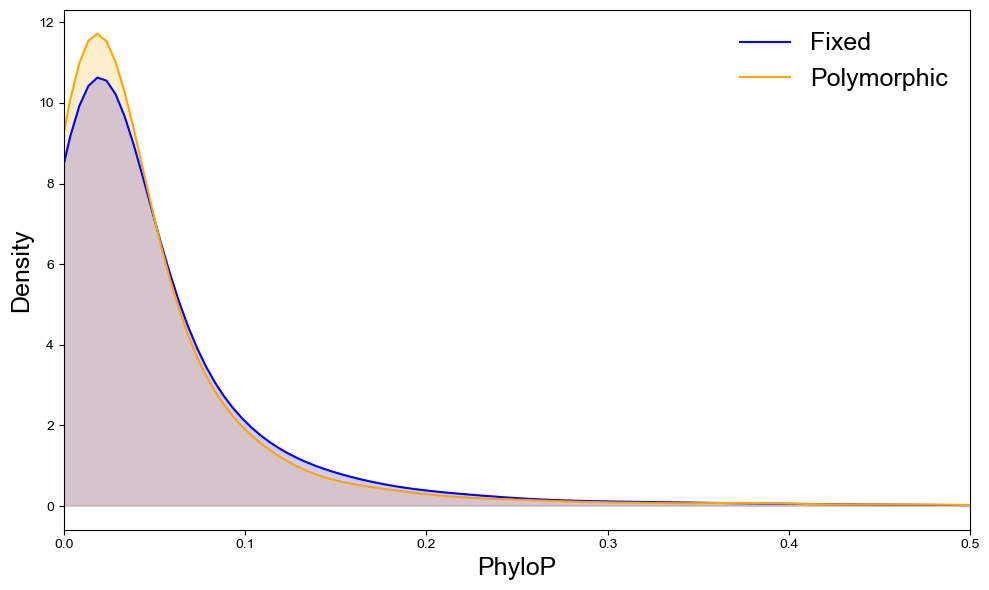

None Abs logfc alpha (0.12532127948072652, 0.063187666, [[1992, 6977], [345, 1384]], [[1992, 6977], [346, 1383]], <Figure size 1000x600 with 1 Axes>)
None Abs logfc p-value 0.04202204601400454


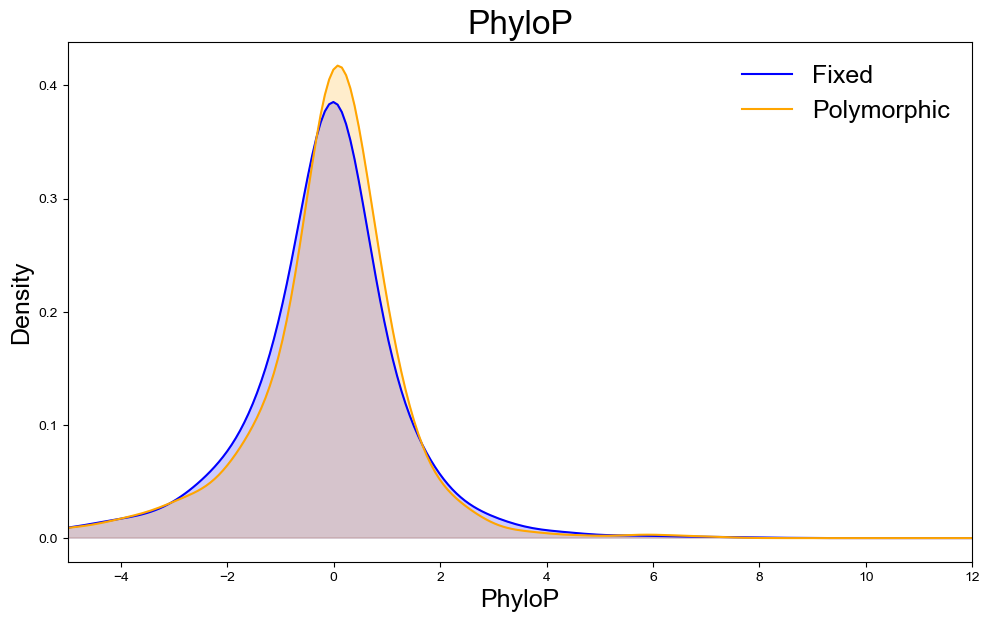

None PhyloP alpha (-0.07925935921527694, 0.6779999999999999, [[977, 4097], [196, 764]], [[977, 4097], [197, 763]], <Figure size 1000x600 with 1 Axes>)
None PhyloP p-value 0.38622517124598393


Selection on changes opposing loss of accessibility, with restriction on magnitude


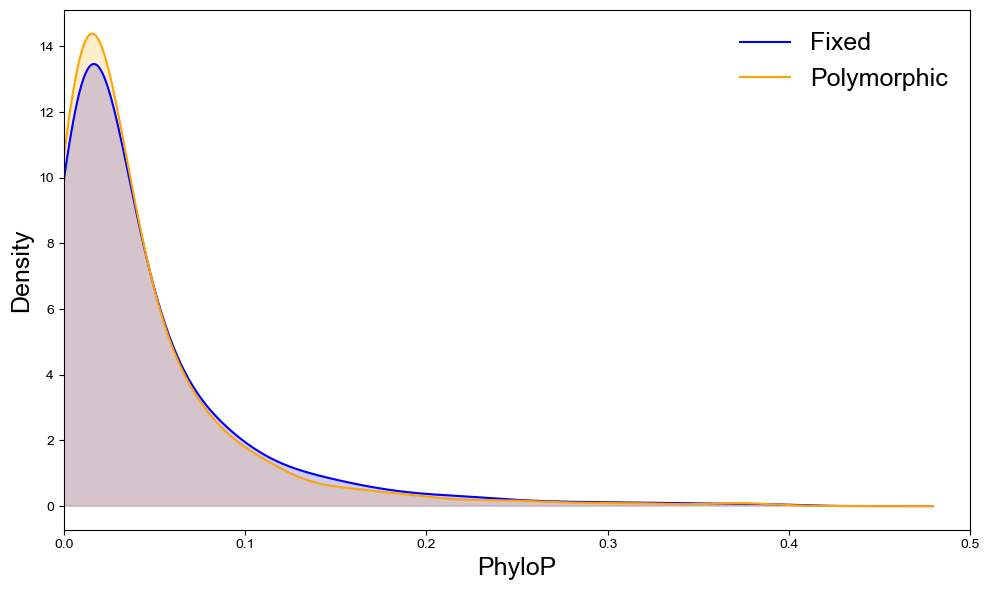

None Abs logfc alpha (0.11290025585000091, 0.061913203, [[1950, 6932], [342, 1373]], [[1950, 6932], [343, 1372]], <Figure size 1000x600 with 1 Axes>)
None Abs logfc p-value 0.0703790950164237


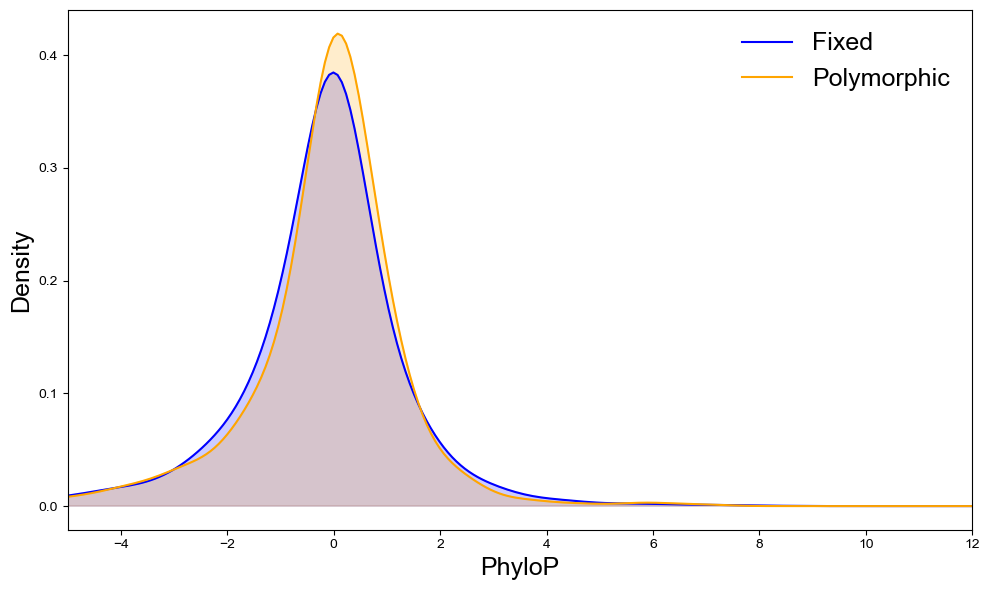

None PhyloP alpha (-0.06840484624200072, 0.6779999999999999, [[973, 4054], [194, 759]], [[973, 4054], [195, 758]], <Figure size 1000x600 with 1 Axes>)
None PhyloP p-value 0.44937691959364146


Selection on changes reinforcing loss of accessibility, magnitude is already restricted


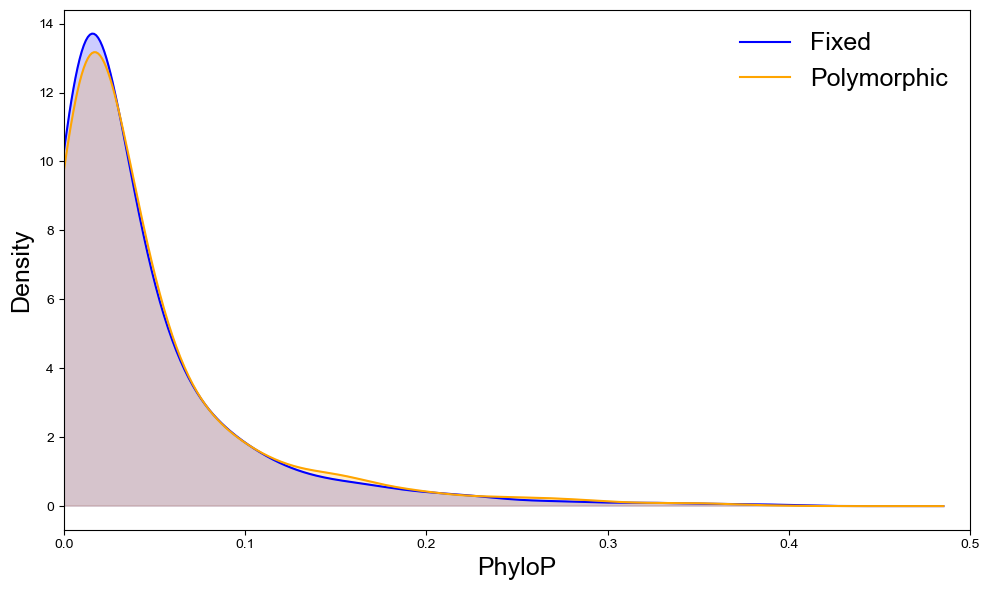

None Abs logfc alpha (-0.06748710811385406, 0.06799427, [[1574, 6734], [320, 1285]], [[1574, 6734], [321, 1284]], <Figure size 1000x600 with 1 Axes>)
None Abs logfc p-value 0.3494499910691582


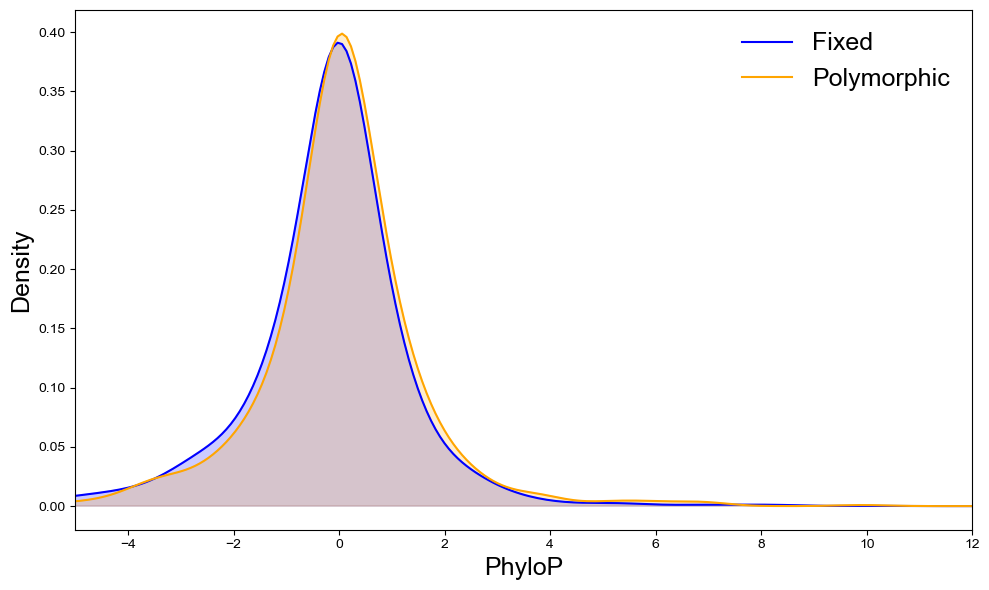

None PhyloP alpha (-0.24257831355615844, 0.672, [[914, 3908], [212, 729]], [[915, 3907], [212, 729]], <Figure size 1000x600 with 1 Axes>)
None PhyloP p-value 0.01340373227124547


Selection on changes opposing gain of accessibility, no restriction on magnitude


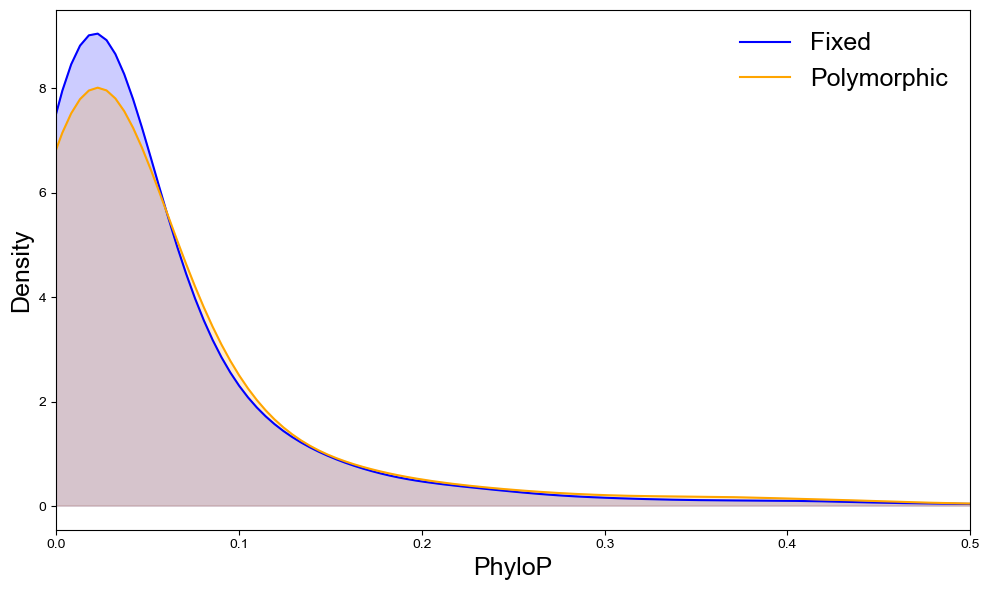

None Abs logfc alpha (-0.0746868741859168, 0.08127228, [[1558, 6700], [327, 1311]], [[1558, 6700], [328, 1310]], <Figure size 1000x600 with 1 Axes>)
None Abs logfc p-value 0.2936821849641057


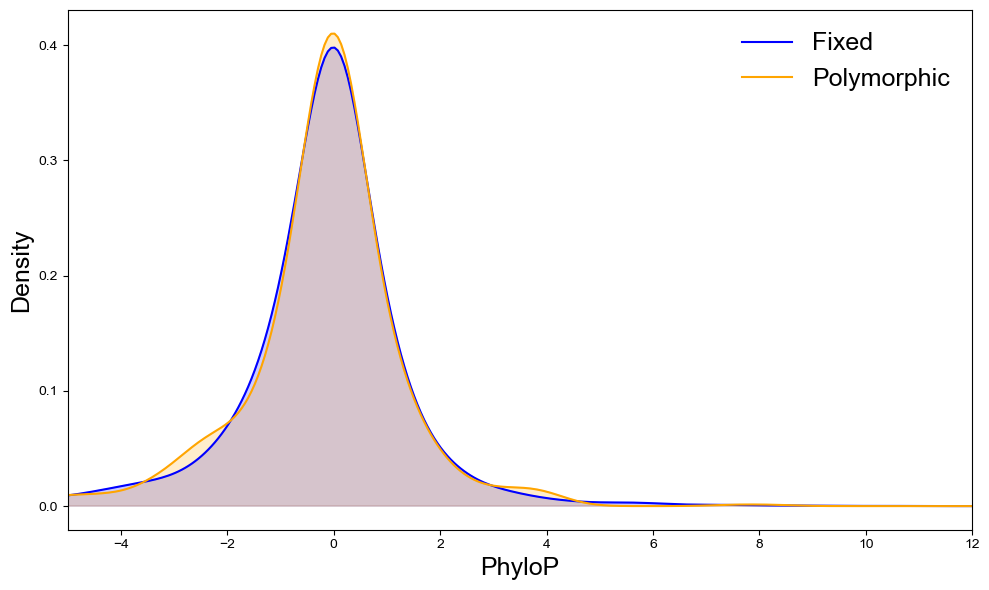

None PhyloP alpha (0.010940263511139081, 0.609, [[959, 3712], [185, 724]], [[959, 3712], [185, 724]], <Figure size 1000x600 with 1 Axes>)
None PhyloP p-value 0.9284815003964855


Selection on changes opposing gain of accessibility, with restriction on magnitude


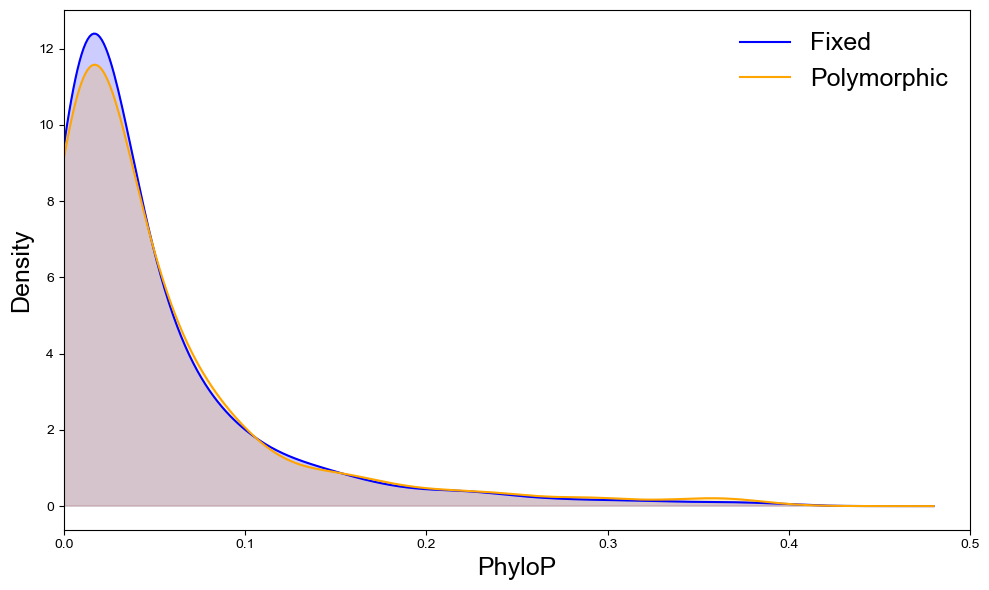

None Abs logfc alpha (-0.056290406340079424, 0.07549792, [[1551, 6566], [320, 1285]], [[1551, 6566], [321, 1284]], <Figure size 1000x600 with 1 Axes>)
None Abs logfc p-value 0.42592802037594746


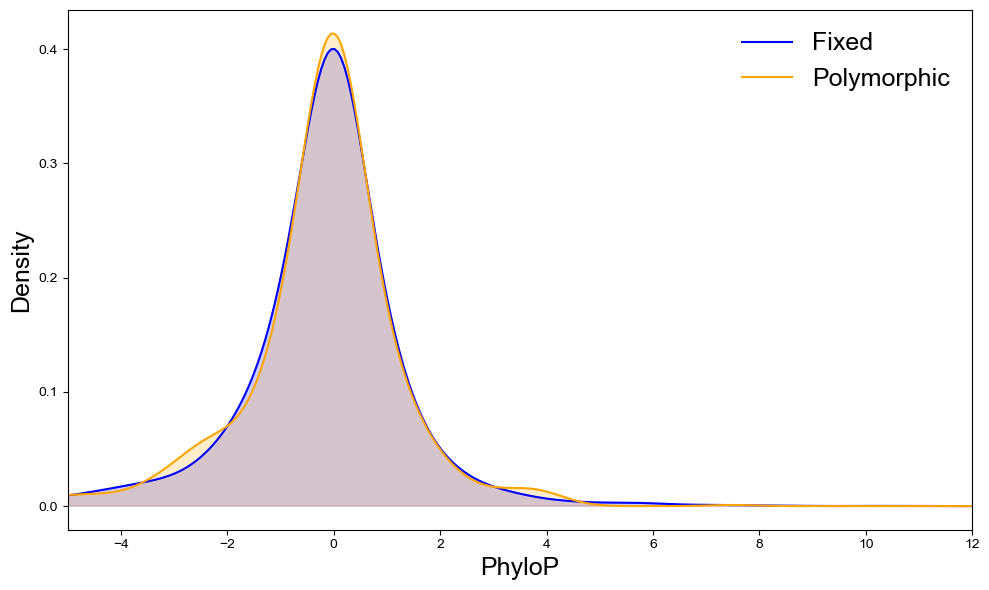

None PhyloP alpha (0.011843391052604568, 0.607, [[937, 3660], [180, 714]], [[937, 3660], [181, 713]], <Figure size 1000x600 with 1 Axes>)
None PhyloP p-value 0.9277554154638611


Selection on changes reinforcing gain of accessibility, magnitude is already restricted


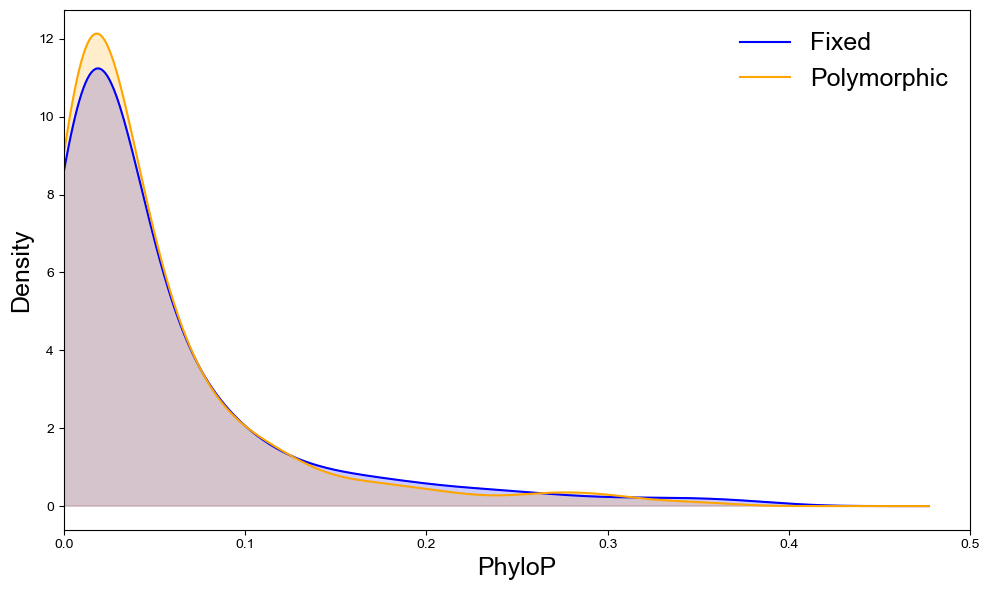

None Abs logfc alpha (0.12346774145976014, 0.0730697, [[1936, 6800], [349, 1401]], [[1936, 6800], [350, 1400]], <Figure size 1000x600 with 1 Axes>)
None Abs logfc p-value 0.04402405745530595


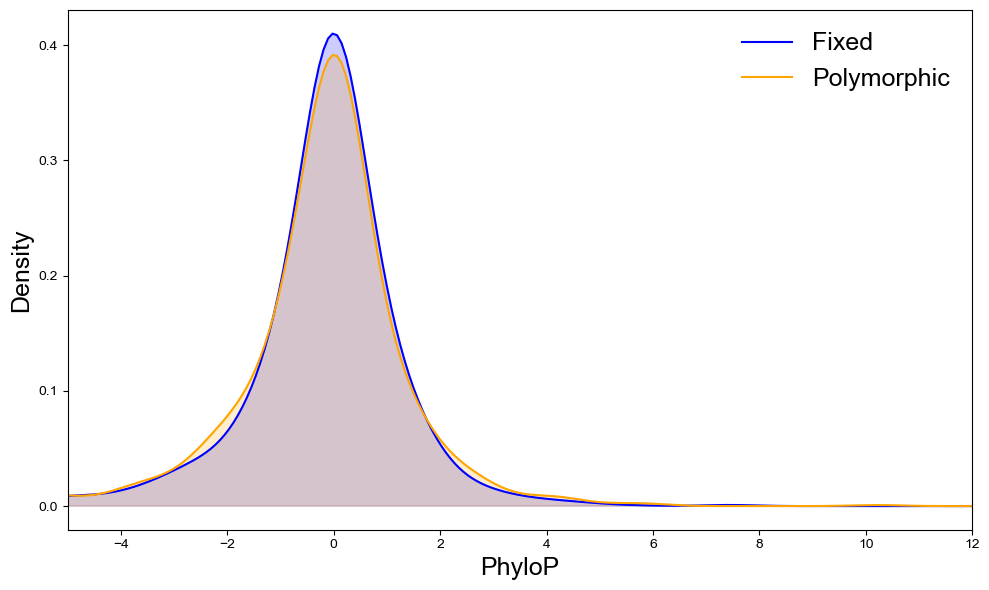

None PhyloP alpha (0.02131007920141037, 0.629, [[993, 3817], [186, 733]], [[993, 3817], [187, 732]], <Figure size 1000x600 with 1 Axes>)
None PhyloP p-value 0.8413072960053376


In [36]:
run_reinf_oppo(v_bln_ncts, vv_bln_ncts, v_bgn_ncts, vv_bgn_ncts, suffix = "None")

In [230]:
dff = pd.DataFrame()
for file in os.listdir("ChangeCTS_Results"):
    if "Alpha" in file and "Expanded" not in file:
        df = pd.read_csv("ChangeCTS_Results/" + file, sep = "\t")
        df = df[df["TauDif_Cutoff"] == 0.2]
        df = df[df["Metric"] == "Absolute log fold-change"]
        df = df[df["StartSpecSup"] == 0]
        df = df[df["ID"] == "NoChange"]
        df["Cell type"] = np.repeat(d_abrev[file.replace("_Alpha.txt", "").replace("_pLI", "")], df.shape[0])
        dff = pd.concat([dff, df])
dff = dff.dropna()
dff2 = dff[dff["Proportion"] == 0.6]
dff2 = dff2[dff2["IncOrDecCA"] == "No CA direction restriction"]
dff2.sort_values("Fisher exact p-value; alt greater")

,ID,StartSpecSup,TauDif_Cutoff,Metric,IncOrDecCTS,IncOrDecCA,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Cell type
0,NoChange,0,0.2,Absolute log fold-change,Increasing CTS,No CA direction restriction,0.157042,14757,0.122261,3888,0.001025,0.000807,0.000529,0.000404,0.113667,0.420616,"[[6336, 8421], [1555, 2333]]","[[6336, 8421], [1556, 2332]]",0.6,FB COP
0,NoChange,0,0.2,Absolute log fold-change,Increasing CTS,No CA direction restriction,0.085585,10572,0.077832,2801,0.008682,0.007985,0.004496,0.003993,0.107587,0.113572,"[[4521, 6051], [1120, 1681]]","[[4521, 6051], [1121, 1680]]",0.6,F chond.
0,NoChange,0,0.2,Absolute log fold-change,Increasing CTS,No CA direction restriction,0.022133,10572,0.021103,2801,0.148206,0.213239,0.075880,0.106619,0.061060,0.029150,"[[4390, 6182], [1120, 1681]]","[[4390, 6182], [1121, 1680]]",0.6,AC microglia
0,NoChange,0,0.2,Absolute log fold-change,Increasing CTS,No CA direction restriction,0.040052,10572,0.038601,2801,0.180763,0.825300,0.092577,0.412650,0.056659,0.061025,"[[4378, 6194], [1120, 1681]]","[[4378, 6194], [1121, 1680]]",0.6,FH endoth.
0,NoChange,0,0.2,Absolute log fold-change,Increasing CTS,No CA direction restriction,0.043460,10572,0.040751,2801,0.455499,0.156426,0.230394,0.078213,0.032393,0.063029,"[[4313, 6259], [1120, 1681]]","[[4313, 6259], [1121, 1680]]",0.6,FC exc. neur.
0,NoChange,0,0.2,Absolute log fold-change,Increasing CTS,No CA direction restriction,0.049522,10572,0.051213,2801,0.879437,0.494312,0.444596,0.752846,0.006994,0.072427,"[[4247, 6325], [1120, 1681]]","[[4247, 6325], [1121, 1680]]",0.6,AH cardiomyo.
0,NoChange,0,0.2,Absolute log fold-change,Increasing CTS,No CA direction restriction,0.048569,10572,0.051061,2801,0.939517,0.941027,0.473413,0.529489,0.003862,0.070924,"[[4239, 6333], [1120, 1681]]","[[4239, 6333], [1121, 1680]]",0.6,FG sertoli
0,NoChange,0,0.2,Absolute log fold-change,Increasing CTS,No CA direction restriction,0.053918,14757,0.053923,3888,0.963325,0.782611,0.486015,0.391305,0.001991,0.076288,"[[5911, 8846], [1555, 2333]]","[[5911, 8846], [1556, 2332]]",0.6,FG preGC IIa
0,NoChange,0,0.2,Absolute log fold-change,Increasing CTS,No CA direction restriction,0.035744,10572,0.036433,2801,0.479858,0.983799,0.768560,0.491899,-0.031391,0.050998,"[[4151, 6421], [1120, 1681]]","[[4151, 6421], [1121, 1680]]",0.6,AC astro.
0,NoChange,0,0.2,Absolute log fold-change,Increasing CTS,No CA direction restriction,0.032467,14757,0.032768,3888,0.391073,0.333662,0.812554,0.833170,-0.032508,0.044089,"[[5791, 8966], [1555, 2333]]","[[5791, 8966], [1556, 2332]]",0.6,FH fibro.


In [264]:
file = "AdultLoopOfHenle_Expanded_FE.txt"
df = pd.read_csv("ChangeCTS_Results/" + file, sep = "\t")
df.drop_duplicates()

,ID,LFC_Cutoff,StartSpecSup,TauDif_Cutoff,LFC_Cutoff_ForFE,IncOrDecCTS,IncludesFocalSites,"[[fixed_reinf, fixed_oppo], [poly_reinf, poly_oppo]]",Fisher exact OR,Fisher exact p-value
0,NoChange,-0.1,0,0.2,0.1,Increasing CTS,Includes focal sites,"[[8052, 2310], [2185, 743]]",1.185302,0.000542
1,NoChange,-0.1,0,0.2,0.1,Decreasing CTS,Includes focal sites,"[[1540, 411], [394, 131]]",1.245816,0.057326
2,NoChange,-0.1,0,0.2,0.1,Increasing CTS,Does not include focal sites,"[[2836, 2304], [725, 743]]",1.261463,0.000089
3,NoChange,-0.1,0,0.2,0.1,Decreasing CTS,Does not include focal sites,"[[504, 399], [125, 131]]",1.323789,0.054887
4,NoChange,-0.1,0,0.2,0.2,Increasing CTS,Includes focal sites,"[[5449, 902], [1444, 316]]",1.321996,0.000138
...,...,...,...,...,...,...,...,...,...,...
283,NoRepeatsNoPseudos,0.1,250,0.2,0.1,Decreasing CTS,Does not include focal sites,"[[885, 908], [265, 243]]",0.893754,0.269189
284,NoRepeatsNoPseudos,0.1,250,0.2,0.2,Increasing CTS,Includes focal sites,"[[190, 53], [38, 15]]",1.415094,0.367130
285,NoRepeatsNoPseudos,0.1,250,0.2,0.2,Decreasing CTS,Includes focal sites,"[[1836, 337], [515, 89]]",0.941511,0.701771
286,NoRepeatsNoPseudos,0.1,250,0.2,0.2,Increasing CTS,Does not include focal sites,"[[54, 52], [11, 15]]",1.416084,0.513603


In [11]:
v = pd.read_csv("Fixed_FetalBrainCOP.txt.gz", sep = "\t")
vv = pd.read_csv("Poly_MAF0.25_FetalBrainCOP.txt.gz", sep = "\t")


try:
    vv = add_unfold(vv)
    vv_ref = vv[vv["Human ref"] == vv["Chimp ref"]]
    vv_alt = vv[vv["Human alt"] == vv["Chimp ref"]]
    vv_ref["fixed logfc"] = -vv_ref["logfc"].astype(float)
    vv_alt["fixed logfc"] = vv_alt["logfc"].astype(float)
    vv = pd.concat([vv_ref, vv_alt])
except:
    pass

te_blacklist = pd.read_csv("BlacklistTE_Variants.txt", sep = "\t")
    
v = v[~v["Position"].isin(te_blacklist["Position"])]
vv = vv[~vv["Position"].isin(te_blacklist["Position"])]



In [2]:
cts_fixed = pd.read_csv("Taus_HumanDerived_Group2_WithNeuron.txt", sep = "\t").set_index("Position")
cts_poly = pd.read_csv("Taus_Polymorphic_Group2_WithNeuron.txt", sep = "\t").set_index("Position")
cts_fixed["Dif"] = cts_fixed["Tau_Allele1"] - cts_fixed["Tau_Allele2"]
cts_poly["Dif"] = cts_poly["Tau_Allele1"] - cts_poly["Tau_Allele2"]


In [14]:
cts_fixed = cts_fixed.loc[np.intersect1d(cts_fixed.index, (v["Position"]))]
cts_poly = cts_poly.loc[np.intersect1d(cts_poly.index, (vv["Position"]))]

In [25]:
v.index = v["Position"]
vv.index = vv["Position"]

In [19]:
cts_fixed[cts_fixed["Dif"] < -0.2]

,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd,Dif
Position,,,,,
chr10:10003777,0.395763,0.646440,0.985371,0.962995,-0.250677
chr10:100064978,0.574964,0.823002,0.990218,0.943522,-0.248039
chr10:10031863,0.595833,0.798344,0.974284,0.888742,-0.202511
chr10:100344736,0.244656,0.599604,0.921757,0.872555,-0.354949
chr10:100355445,0.509895,0.730635,0.932821,0.901895,-0.220740
...,...,...,...,...,...
chrX:99335656,0.484774,0.692241,0.926262,0.917022,-0.207467
chrX:99482463,0.293840,0.518320,0.916137,0.880226,-0.224480
chrX:99734422,0.690152,0.919021,0.906079,0.864208,-0.228869


In [26]:
v_cts = v.join(cts_fixed)
vv_cts = vv.join(cts_poly)

signs = []
for index, row in vv_cts.iterrows():
    if np.sign(row["logfc"]) == np.sign(row["fixed logfc"]):
        signs.append(1)
    else:
        signs.append(-1)
vv_cts["SignFlip"] = signs
vv_cts["Fixed Dif"] = vv_cts["SignFlip"]*vv_cts["Dif"]

In [39]:
fisher_exact([[14536, 14757], [3973, 3888]])
fisher_exact([[827, 620], [239, 174]])

SignificanceResult(statistic=0.9711027129167229, pvalue=0.821611221499412)

In [38]:
v_cts[(v_cts["Dif"] > 0.2) & (v_cts["PhyloP447"] > 2)]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd,Dif
Position,,,,,,,,,,,,,,,,
chr1:11535930,chr1:11535930,chr1:11535930,PTCHD2,56884,2.096,0.001,189,0.003266,47.173218,47.280136,0.003266,0.673906,0.445073,0.781376,0.760047,0.228833
chr1:14405175,chr1:14405175,chr1:14405175,KAZN,193584,3.449,1.000,439,-0.243377,55.329810,46.740734,0.243377,0.541734,0.312252,0.800650,0.557016,0.229481
chr1:20387021,chr1:20387021,chr1:20387021,VWA5B1,96126,8.408,1.000,443,-0.956470,352.684140,181.743840,0.956470,0.682543,0.480468,0.689445,0.542503,0.202075
chr1:33436791,chr1:33436791,chr1:33436791,ZSCAN20,35850,2.326,0.030,442,-1.151303,128.287660,57.757458,1.151303,0.770546,0.552631,0.699863,0.500363,0.217915
chr1:33547825,chr1:33547825,chr1:33547825,ZSCAN20,75184,3.431,0.015,396,0.310590,7.612305,9.440893,0.310590,0.789433,0.579871,0.868222,0.864289,0.209562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:124997161,chrX:124997161,chrX:124997161,TENM1,33406,3.174,0.993,416,0.105712,17.480083,18.809017,0.105712,0.647755,0.419848,0.898028,0.968834,0.227907
chrX:125079382,chrX:125079382,chrX:125079382,TENM1,115626,2.911,0.999,430,-0.755741,56.362873,33.380470,0.755741,0.679688,0.468219,0.928510,0.904330,0.211469
chrX:130685126,chrX:130685126,chrX:130685126,ENOX2,218096,2.269,0.031,344,0.020665,18.848690,19.120620,0.020665,0.432650,0.191027,0.967402,0.921437,0.241622


In [28]:
ee_fixed = pd.read_csv("FetalBrainCOP_EEs_HumanDerived_WithNeuron.txt.gz", sep = "\t")
ee_poly = pd.read_csv("FetalBrainCOP_EEs_Polymorphic_WithNeuron.txt.gz", sep = "\t")

In [40]:
ee_fixed = ee_fixed[ee_fixed["Position"].isin(v["Position"])]
ee_poly = ee_poly[ee_poly["Position"].isin(vv["Position"])]

ee_poly[ee_poly[""]]

,Position,EE_Allele1,EE_Allele2,dEE_logfc,EE_jsd,EE_abs_logfc
0,chr10:100000235,0.175169,0.177799,0.117206,0.170495,0.104568
4,chr10:100002628,0.049383,0.049615,0.058798,0.092818,0.046700
8,chr10:100004827,0.091007,0.088746,0.013621,0.066679,0.013473
10,chr10:100005358,0.094617,0.095102,0.149549,0.075920,0.105778
12,chr10:100005711,0.074742,0.071152,0.148525,0.015817,0.143976
...,...,...,...,...,...,...
6817236,chrY:8878399,0.080046,0.075301,0.462062,0.015190,0.179597
6817247,chrY:9561874,0.077740,0.075648,0.309309,0.000742,0.247211
6817251,chrY:9601209,0.054889,0.055552,0.225834,0.102418,0.134673
6817252,chrY:9602899,0.056959,0.057210,0.086758,0.121909,0.065944


In [48]:
ee_fixed[ee_fixed["EE_Allele2"] > 0.5]

,Position,EE_Allele1,EE_Allele2,dEE_logfc,EE_jsd,EE_abs_logfc
2134,chr10:100471560,0.580608,0.574136,0.110595,0.041605,0.110595
2834,chr10:100638422,0.561960,0.562892,0.043039,0.173053,0.042968
2835,chr10:100638457,0.559285,0.561237,0.119916,0.134541,0.111276
2836,chr10:100638550,0.513033,0.508787,0.059155,0.017345,0.059155
3236,chr10:100751265,0.486957,0.505036,0.629973,0.032157,0.238532
...,...,...,...,...,...,...
11933024,chrX:99505128,0.418029,0.564842,1.000000,0.578472,0.388861
11933088,chrX:99525410,0.581624,0.585257,0.017393,0.026086,0.017393
11933451,chrX:99629039,0.511524,0.517062,0.097602,0.063667,0.097602
11933452,chrX:99629123,0.538883,0.577612,0.274503,0.012764,0.232002


In [49]:
v_cts

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd,Dif
Position,,,,,,,,,,,,,,,,
chr1:15446,chr1:15446,chr1:15446,OR4F5,53644,-1.587,0.000,383,-0.014194,62.835060,62.219894,0.014194,0.385302,0.386597,0.847408,0.453523,-0.001295
chr1:16497,chr1:16497,chr1:16497,OR4F5,52593,0.010,0.000,398,0.002383,29.460460,29.509155,0.002383,0.513779,0.558242,0.908935,0.830035,-0.044462
chr1:16580,chr1:16580,chr1:16580,OR4F5,52510,-1.563,0.000,400,-0.019375,30.725185,30.315306,0.019375,0.499341,0.523642,0.593378,0.811188,-0.024301
chr1:19051,chr1:19051,chr1:19051,OR4F5,50039,-0.060,0.000,411,0.016582,43.208107,43.707580,0.016582,0.475040,0.478419,0.869770,0.369853,-0.003378
chr1:39163,chr1:39163,chr1:39163,OR4F5,29927,-1.209,0.000,222,0.054128,15.559766,16.154642,0.054128,0.591574,0.794563,0.940274,0.895383,-0.202988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:56878783,chrY:56878783,chrY:56878783,CDY1,31256667,1.497,0.006,182,0.013635,11.280750,11.387869,0.013635,0.531034,0.529358,0.550753,0.337903,0.001677
chrY:56878814,chrY:56878814,chrY:56878814,CDY1,31256698,-0.145,0.000,103,-0.022729,11.581715,11.400681,0.022729,0.522172,0.534960,0.530633,0.496271,-0.012788
chrY:56884539,chrY:56884539,chrY:56884539,CDY1,31262423,0.535,0.000,244,-0.015668,40.371315,39.935250,0.015668,0.447823,0.449529,0.680656,0.522833,-0.001706


In [50]:
v_cts = v_cts.join(ee_fixed.set_index("Position")[["EE_Allele1", "EE_Allele2"]])
vv_cts = vv_cts.join(ee_poly.set_index("Position")[["EE_Allele1", "EE_Allele2"]])


In [51]:
v_cts["EE_Dif"] = v_cts["EE_Allele1"] - v_cts["EE_Allele2"]
vv_cts["EE_Dif"] = vv_cts["EE_Allele1"] - vv_cts["EE_Allele2"]
vv_cts["Fixed EE_Dif"] = vv_cts["SignFlip"]*vv_cts["EE_Dif"]

In [57]:
v_cts["Fixed EE_Dif"] = v_cts["EE_Dif"]

In [65]:
fisher_exact([[44825, 29055], [11156, 7715]])

SignificanceResult(statistic=1.0669076846936416, pvalue=9.879124536505107e-05)

MannwhitneyuResult(statistic=709415532.0, pvalue=0.00017456145390008893)
0.0004410257065248145 0.009349962919400042
(0.06271178439665448, -0.0021952782696322837, [0.20747731844070771, 0.25115910942202857, 0.3006651392008588, 0.31813785559338714, 0.35599540777719874, 0.5336346911012368, 0.7345709296153127], 'dc > 0.1, likely stable', [[44825, 29055], [11156, 7715]], <Figure size 1000x600 with 1 Axes>)


Text(0.5, 38.72222222222221, 'Difference in expression enrichment in COPs')

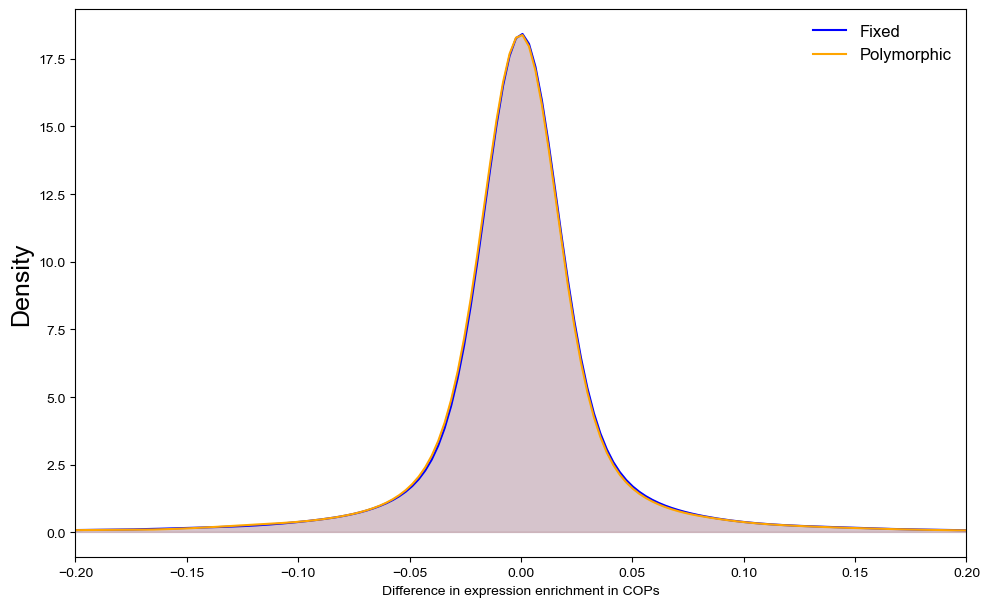

In [75]:
vk = v_cts[(v_cts["EE_Allele1"] > 0.4) | (v_cts["EE_Allele2"] > 0.4)]
vvk = vv_cts[(vv_cts["EE_Allele1"] > 0.4) | (vv_cts["EE_Allele2"] > 0.4)]

#vk = vk[vk["SpecSup447"] > 250]
#vvk = vvk[vvk["SpecSup447"] > 250]

vk, vvk = remove_repeats(vk, vvk)
vk, vvk = remove_pseudos(vk, vvk)

print(mwu(vk["Fixed EE_Dif"], vvk["Fixed EE_Dif"]))

print(np.mean(vk["Fixed EE_Dif"]), np.mean(vk["Fixed EE_Dif"])/np.std(vk["Fixed EE_Dif"]))

up = vk[vk["Fixed EE_Dif"] > 0.1].shape[0]
down = vk[vk["Fixed EE_Dif"] < -0.1].shape[0]

print(binomtest(up, up + down))

vvv = prepare_alpha(vk, vvk, stat = "Fixed EE_Dif")
print(compute_alpha_new(vvv, plot = True, window = [-0.2, 0.2]))
plt.xlabel("Difference in expression enrichment in COPs")

In [86]:
spec_sup = 250
ee_cut = 0.3
vk = v_cts[(v_cts["SpecSup447"] > spec_sup) & ((v_cts["EE_Allele1"] > ee_cut) | (v_cts["EE_Allele2"] > ee_cut))]

In [82]:
fisher_exact([[536427, 4021862], [140956, 1078414]])

SignificanceResult(statistic=1.0204351608331825, pvalue=1.989585360753292e-10)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.06515074452660186,
 0.4,
 [[3715, 16078], [950, 4398]],
 [[3715, 16078], [950, 4398]],
 <Figure size 1000x600 with 1 Axes>)

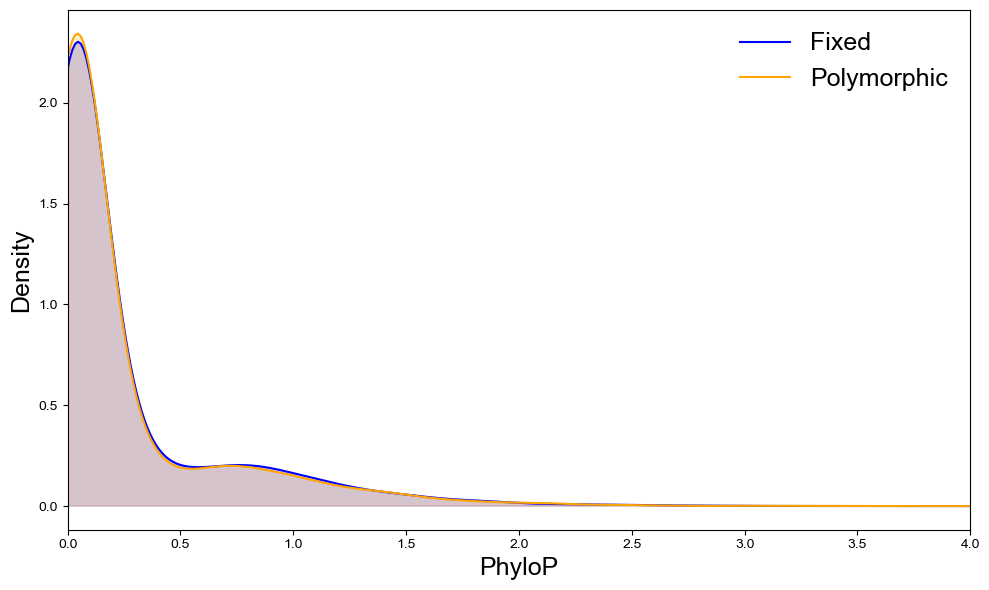

In [110]:
v_mctsln2 = v_mctsln[v_mctsln["allele2_pred_counts"] > 35]
vv_mctsln2 = vv_mctsln[((vv_mctsln["allele2_pred_counts"] > 35) & (vv_mctsln["fixed logfc"] == vv_mctsln["logfc"])) | ((vv_mctsln["allele1_pred_counts"] > 35) & (vv_mctsln["fixed logfc"] != vv_mctsln["logfc"]))]

vvv = prepare_alpha(v_mctsln2, vv_mctsln2, stat = "abs logfc")
compute_alpha_cutoff(vvv, plot = True, window = [0, 4], cutoff = 0.4)


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.10018612858423115,
 0.1,
 [[3829, 12355], [954, 3421]],
 [[3829, 12355], [954, 3421]],
 <Figure size 1000x600 with 1 Axes>)

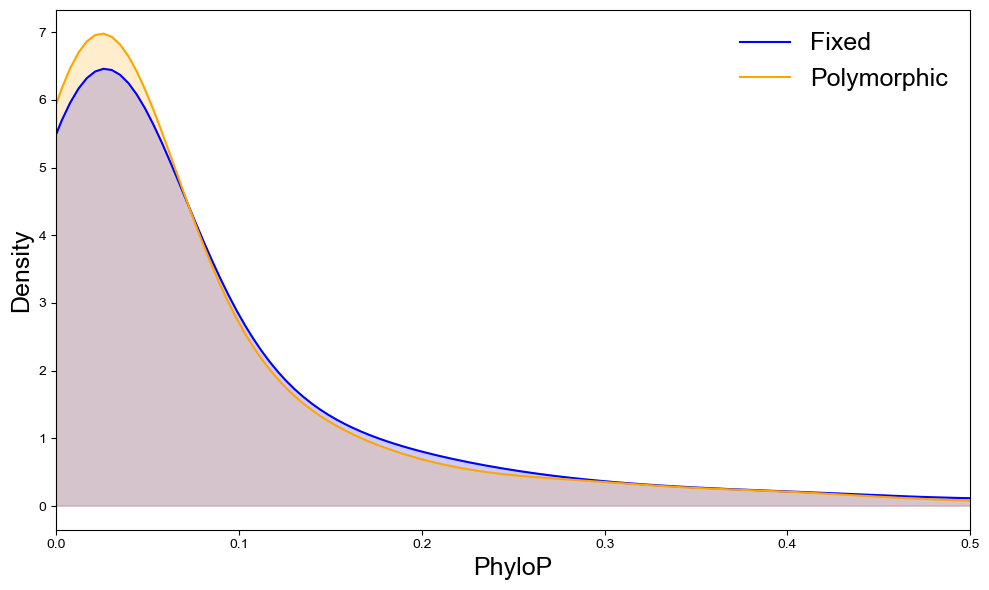

In [128]:
v_mctsln2 = v_mctsln[(v_mctsln["allele2_pred_counts"] > 35) & (~v_mctsln["Position"].isin(v_mcts["Position"]))]
vv_mctsln2 = vv_mctsln[(((vv_mctsln["allele2_pred_counts"] > 35) & (vv_mctsln["fixed logfc"] == vv_mctsln["logfc"])) | ((vv_mctsln["allele1_pred_counts"] > 35) & (vv_mctsln["fixed logfc"] != vv_mctsln["logfc"]))) & (~vv_mctsln["Position"].isin(vv_mcts["Position"]))]

vvv = prepare_alpha(v_mctsln2, vv_mctsln2, stat = "abs logfc")
compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = 0.1)


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.051224568841166884,
 0.1,
 [[3891, 21882], [1074, 6366]],
 [[3891, 21882], [1074, 6366]],
 <Figure size 1000x600 with 1 Axes>)

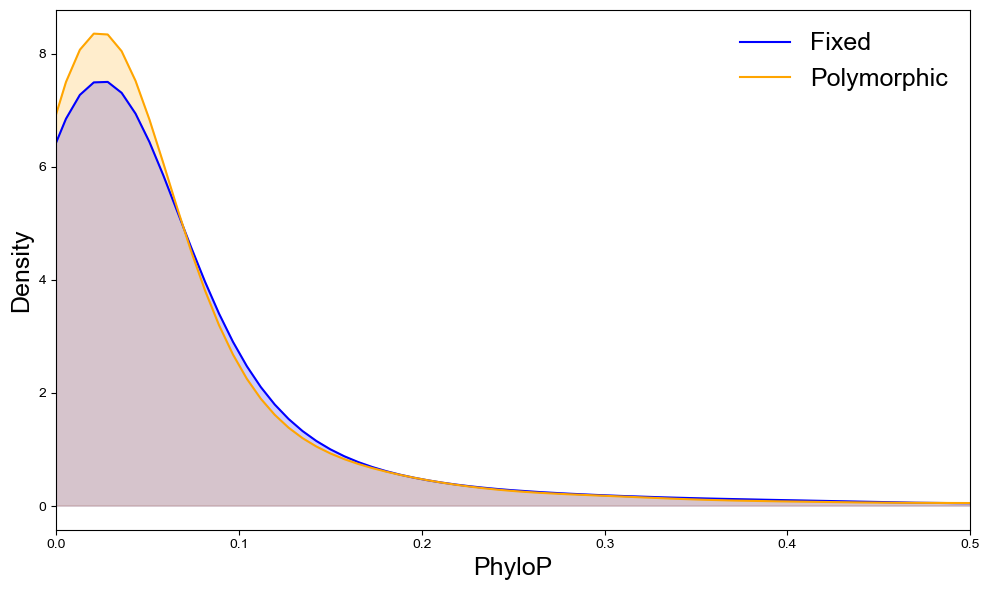

In [127]:
v_mctsln2 = v_mctsln[(v_mctsln["allele2_pred_counts"] < 35) & (~v_mctsln["Position"].isin(v_mcts["Position"]))]
vv_mctsln2 = vv_mctsln[(((vv_mctsln["allele2_pred_counts"] < 35) & (vv_mctsln["fixed logfc"] == vv_mctsln["logfc"])) | ((vv_mctsln["allele1_pred_counts"] < 35) & (vv_mctsln["fixed logfc"] != vv_mctsln["logfc"]))) & (~vv_mctsln["Position"].isin(vv_mcts["Position"]))]

vvv = prepare_alpha(v_mctsln2, vv_mctsln2, stat = "abs logfc")
compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = 0.1)


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.08103966824978237,
 0.1,
 [[7720, 34237], [2028, 9787]],
 [[7720, 34237], [2028, 9787]],
 <Figure size 1000x600 with 1 Axes>)

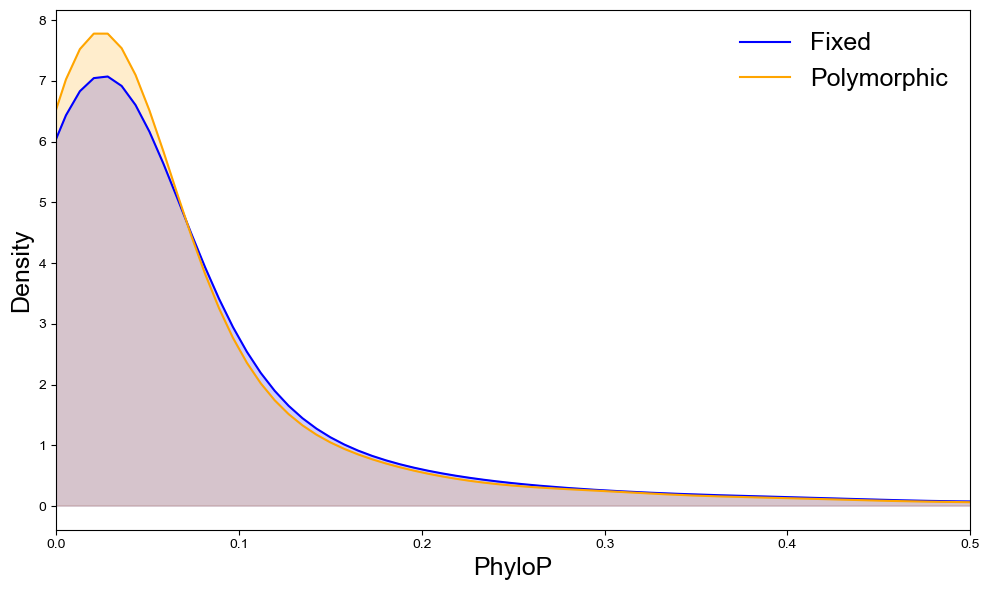

In [120]:
v_mctsln2 = v_mctsln[(~v_mctsln["Position"].isin(v_mcts["Position"]))]
vv_mctsln2 = vv_mctsln[(~vv_mctsln["Position"].isin(vv_mcts["Position"]))]

vvv = prepare_alpha(v_mctsln2, vv_mctsln2, stat = "abs logfc")
compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = 0.1)


In [103]:
v_mcts[v_mcts["allele2_pred_counts"] > 35]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,...,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd,Dif,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,Chrom,Pos
Position,,,,,,,,,,,,,,,,,,,,,
chr1:1551296,chr1:1551296,chr1:1551296,TMEM240,10815,-0.424,0.000,180,-0.653535,219.683290,139.657200,...,0.665139,0.458559,0.863210,0.884781,0.206581,Fixed,.,.,chr1,1551296
chr1:2159365,chr1:2159365,chr1:2159365,C1orf86,35390,-1.856,0.000,98,-0.002285,40.639420,40.575104,...,0.648058,0.317413,0.975255,0.970246,0.330645,Fixed,.,.,chr1,2159365
chr1:2811223,chr1:2811223,chr1:2811223,TTC34,9530,-1.006,0.000,141,-1.872074,218.441380,59.673904,...,0.761146,0.497101,0.966332,0.973948,0.264045,Fixed,.,.,chr1,2811223
chr1:2811281,chr1:2811281,chr1:2811281,TTC34,9588,0.032,0.004,141,-1.582430,233.166960,77.858890,...,0.772347,0.431616,0.969534,0.964927,0.340730,Fixed,.,.,chr1,2811281
chr1:2834423,chr1:2834423,chr1:2834423,TTC34,32730,-1.849,0.000,298,0.147050,33.725983,37.344883,...,0.481632,0.277755,0.651227,0.851225,0.203877,Fixed,.,.,chr1,2834423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:147506968,chrX:147506968,chrX:147506968,FMR1,404970,-1.218,0.000,370,-0.916966,89.776566,47.547596,...,0.711539,0.459737,0.930008,0.883624,0.251802,Fixed,.,.,chrX,147506968
chrX:149805450,chrX:149805450,chrX:149805450,MAGEA9,23514,-0.314,0.014,59,-0.822499,121.651060,68.789010,...,0.561511,0.299632,0.893118,0.900617,0.261879,Fixed,.,.,chrX,149805450
chrX:150151516,chrX:150151516,chrX:150151516,MAMLD1,211782,-0.983,0.000,402,-0.583929,65.861020,43.938797,...,0.456305,0.239662,0.903170,0.874875,0.216642,Fixed,.,.,chrX,150151516


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.11771512728802869,
 0.40379163295947296,
 [0.40379163295947296,
  1.58870644754519,
  1.687449348760666,
  2.5884783223518886,
  3.267335768208288,
  3.35373580677183,
  3.7487074116337364,
  4.180707604451445,
  5.2792223804736205],
 'dc > 0.1, likely stable',
 [[6370, 8387], [1560, 2328]],
 <Figure size 1000x600 with 1 Axes>)

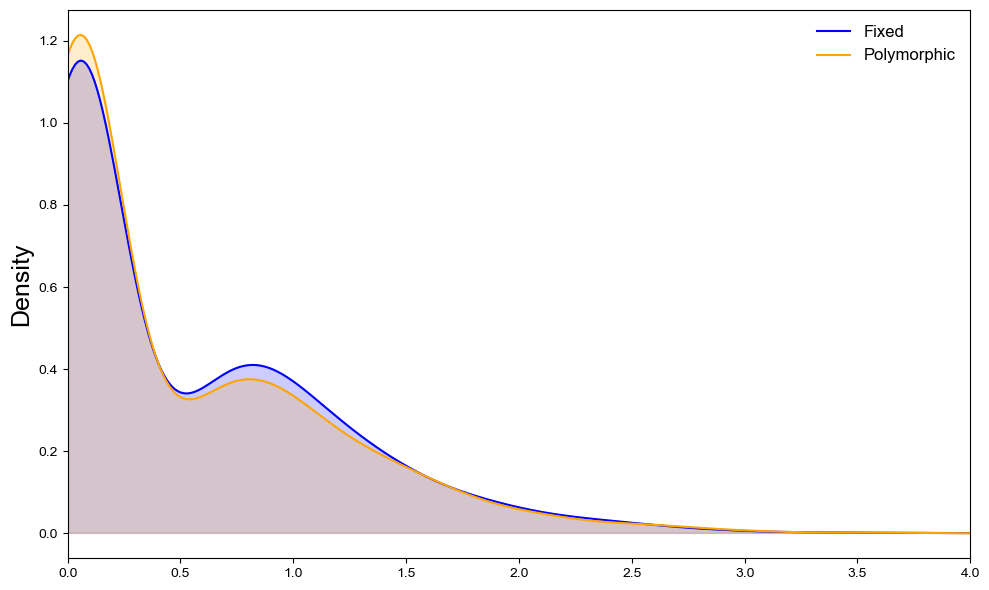

In [5]:
vvv = prepare_alpha(v_mcts, vv_mcts, stat = "abs logfc")
compute_alpha_new(vvv, plot = True, window = [0, 4])

In [7]:
fisher_exact([[6365, 8171], [1684, 2289]])

SignificanceResult(statistic=1.058831621943197, pvalue=0.11621853316863426)

In [12]:
v_lctsb = v_lcts[v_lcts["logfc"] > 0.75]
v_mctsb = v_mcts[v_mcts["logfc"] < -0.75]

v_lctsb[v_lctsb["NearestGene"].isin(["SOX9", "PDGFRA", "SOX10", "MBP"])]
v_mctsb[v_mctsb["NearestGene"].isin(["SOX9", "PDGFRA", "SOX10", "MBP"])]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd,Dif,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
Position,,,,,,,,,,,,,,,,,,,
chr17:71196366,chr17:71196366,chr17:71196366,SOX9,924656,-0.379,0.0,185,-0.872834,53.977566,29.475689,0.872834,0.665465,0.383046,0.936765,0.834051,0.282419,Fixed,.,.
chr17:71300622,chr17:71300622,chr17:71300622,SOX9,820400,-1.369,0.0,294,-1.083381,94.973740,44.820145,1.083381,0.724567,0.465834,0.865927,0.717293,0.258732,Fixed,.,.
chr17:71834387,chr17:71834387,chr17:71834387,SOX9,286635,-1.956,0.0,293,-0.927441,96.948560,50.974610,0.927441,0.713920,0.452425,0.899791,0.865060,0.261495,Fixed,.,.
chr17:71841753,chr17:71841753,chr17:71841753,SOX9,279269,-1.409,0.0,324,-1.530021,117.492294,40.684315,1.530021,0.837642,0.566422,0.842829,0.479899,0.271220,Fixed,.,.
chr17:71933620,chr17:71933620,chr17:71933620,SOX9,187402,0.019,0.0,298,-1.008351,98.745420,49.087740,1.008351,0.574222,0.367991,0.960746,0.968681,0.206232,Fixed,.,.
chr17:72561148,chr17:72561148,chr17:72561148,SOX9,440126,-8.471,0.0,351,-1.427315,279.303100,103.851135,1.427315,0.696268,0.476277,0.356740,0.353412,0.219992,Fixed,.,.


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.05556277383860864,
 0.3135620027081586,
 [0.3135620027081586,
  0.6422102676428211,
  1.0764954748779108,
  2.837111179885031,
  3.4709328336875944,
  4.010854983223112,
  5.0202746540938605],
 'dc > 0.1, likely stable',
 [[6365, 8171], [1684, 2289]],
 <Figure size 1000x600 with 1 Axes>)

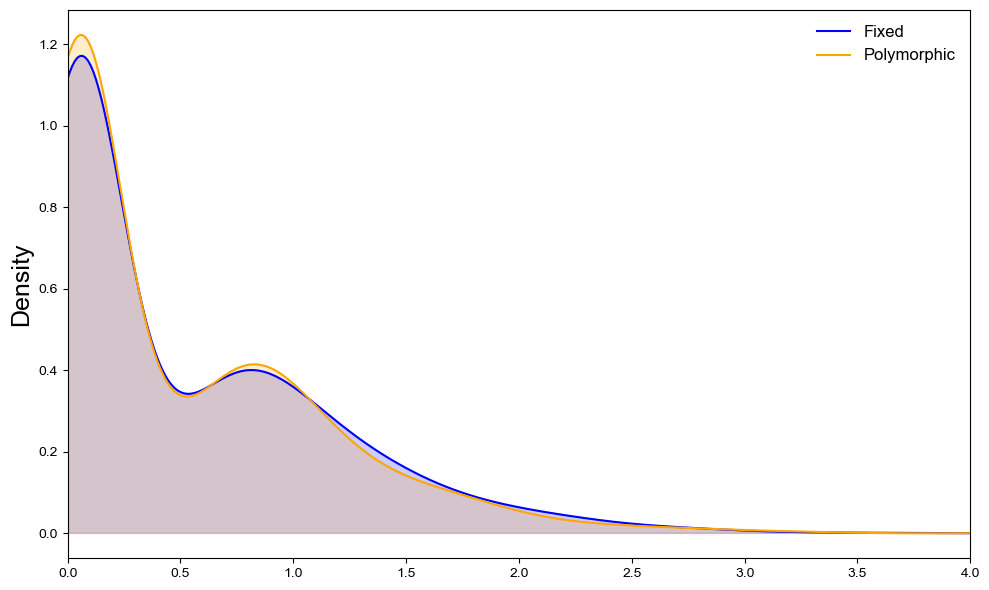

In [6]:
vvv = prepare_alpha(v_lcts, vv_lcts, stat = "abs logfc")
compute_alpha_new(vvv, plot = True, window = [0, 4])

In [13]:
lfc_cutz = "NoCut"

v_mcts["Chrom"] = [x.split(":")[0] for x in v_mcts["Position"]]
v_mcts["Pos"] = [int(x.split(":")[1]) for x in v_mcts["Position"]]

vv_mcts["Chrom"] = [x.split(":")[0] for x in vv_mcts["Position"]]
vv_mcts["Pos"] = [int(x.split(":")[1]) for x in vv_mcts["Position"]]

v_lcts["Chrom"] = [x.split(":")[0] for x in v_lcts["Position"]]
v_lcts["Pos"] = [int(x.split(":")[1]) for x in v_lcts["Position"]]

vv_lcts["Chrom"] = [x.split(":")[0] for x in vv_lcts["Position"]]
vv_lcts["Pos"] = [int(x.split(":")[1]) for x in vv_lcts["Position"]]

v["Chrom"] = [x.split(":")[0] for x in v["Position"]]
v["Pos"] = [int(x.split(":")[1]) for x in v["Position"]]

vv["Chrom"] = [x.split(":")[0] for x in vv["Position"]]
vv["Pos"] = [int(x.split(":")[1]) for x in vv["Position"]]

if lfc_cutz == "NoCut":
    v_mcts2 = v_mcts.copy()
    vv_mcts2 = vv_mcts.copy()

    v_lcts2 = v_lcts.copy()
    vv_lcts2 = vv_lcts.copy()
elif lfc_cutz == -0.1:
    v_mcts2 = v_mcts[v_mcts["logfc"] < -0.1]
    vv_mcts2 = vv_mcts[vv_mcts["fixed logfc"] < -0.1]

    v_lcts2 = v_lcts[v_lcts["logfc"] < -0.1]
    vv_lcts2 = vv_lcts[vv_lcts["fixed logfc"] < -0.1]
elif lfc_cutz == 0.1:
    v_mcts2 = v_mcts[v_mcts["logfc"] > 0.1]
    vv_mcts2 = vv_mcts[vv_mcts["fixed logfc"] > 0.1]

    v_lcts2 = v_lcts[v_lcts["logfc"] > 0.1]
    vv_lcts2 = vv_lcts[vv_lcts["fixed logfc"] > 0.1]

d_mcts = {}
d_lcts = {}

done = 0
for index, row in v_mcts2.iterrows():
    if row["Chrom"] in d_mcts.keys():
        d_mcts[row["Chrom"]] = d_mcts[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_mcts[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)

done = 0
for index, row in v_lcts2.iterrows():
    if row["Chrom"] in d_lcts.keys():
        d_lcts[row["Chrom"]] = d_lcts[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_lcts[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)

d_pmcts = {}
d_plcts = {}

done = 0
for index, row in vv_mcts2.iterrows():
    if row["Chrom"] in d_pmcts.keys():
        d_pmcts[row["Chrom"]] = d_pmcts[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_pmcts[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)

done = 0
for index, row in vv_lcts2.iterrows():
    if row["Chrom"] in d_plcts.keys():
        d_plcts[row["Chrom"]] = d_plcts[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_plcts[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)


v_mctsn = pd.DataFrame()
vv_mctsn = pd.DataFrame()
v_lctsn = pd.DataFrame()
vv_lctsn = pd.DataFrame()

for key in d_mcts.keys():
    v_mctsn = pd.concat([v_mctsn, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_mcts[key]))]])
    vv_mctsn = pd.concat([vv_mctsn, vv[(vv["Chrom"].isin([key])) & (vv["Pos"].isin(d_mcts[key]))]])

for key in d_pmcts.keys():
    v_mctsn = pd.concat([v_mctsn, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_pmcts[key]))]])
    vv_mctsn = pd.concat([vv_mctsn, vv[(vv["Chrom"].isin([key])) & (vv["Pos"].isin(d_pmcts[key]))]])

for key in d_lcts.keys():
    v_lctsn = pd.concat([v_lctsn, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_lcts[key]))]])
    vv_lctsn = pd.concat([vv_lctsn, vv[(vv["Chrom"].isin([key])) & (vv["Pos"].isin(d_lcts[key]))]])

for key in d_plcts.keys():
    v_lctsn = pd.concat([v_lctsn, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_plcts[key]))]])
    vv_lctsn = pd.concat([vv_lctsn, vv[(vv["Chrom"].isin([key])) & (vv["Pos"].isin(d_plcts[key]))]])

C:\Users\astar\AppData\Local\Temp\ipykernel_23008\3139349486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_mcts["Chrom"] = [x.split(":")[0] for x in v_mcts["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_23008\3139349486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_mcts["Pos"] = [int(x.split(":")[1]) for x in v_mcts["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_23008\3139349486.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
1000
2000
3000
1000
2000
3000


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.014166423284380447,
 0.1374966897675628,
 [0.1374966897675628,
  0.6422069920385797,
  1.0530177031894077,
  1.6281526988005663,
  1.8042144321509208,
  2.872322281143073,
  3.459194725644256,
  4.046067170145438,
  5.020275428017401],
 'dc > 0.1, likely stable',
 [[17847, 81457], [4951, 22922]],
 <Figure size 1000x600 with 1 Axes>)

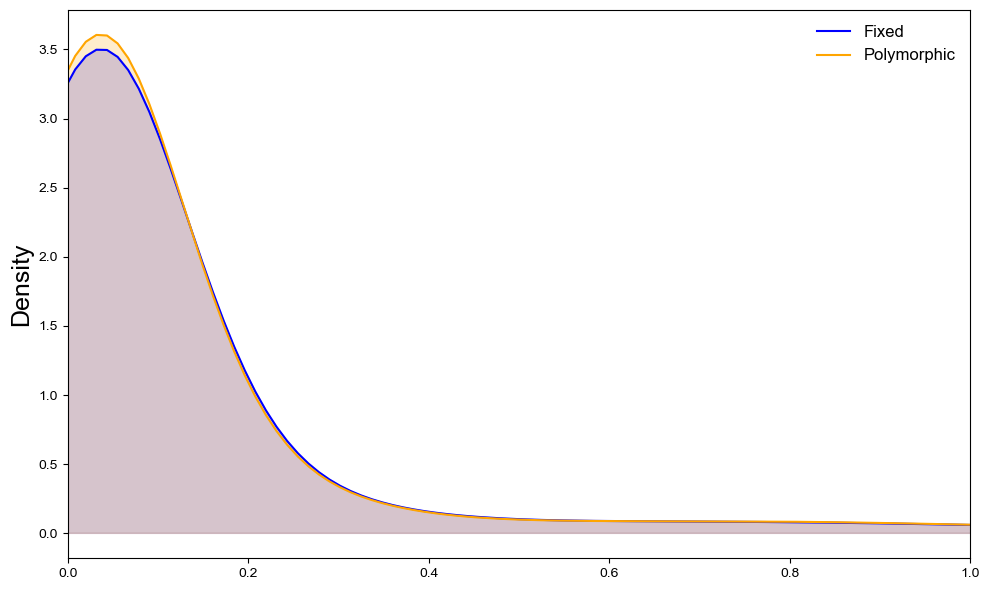

In [41]:
vvv = prepare_alpha(v_lctsn.drop_duplicates("Position"), vv_lctsn.drop_duplicates("Position"), stat = "abs logfc")
compute_alpha_new(vvv, plot = True, window = [0, 1])

In [46]:
v_mctsn = v_mctsn.drop_duplicates("Position")
vv_mctsn = vv_mctsn.drop_duplicates("Position")

v_lctsn = v_lctsn.drop_duplicates("Position")
vv_lctsn = vv_lctsn.drop_duplicates("Position")

v_mctsn

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
1186,chr1:1551028,chr1:1551028,TMEM240,10547,-1.650,0.000,183,-0.080195,219.488070,207.620250,0.080195,chr1,1551028,Fixed,.,.
1187,chr1:1551296,chr1:1551296,TMEM240,10815,-0.424,0.000,180,-0.653535,219.683290,139.657200,0.653535,chr1,1551296,Fixed,.,.
1188,chr1:1551411,chr1:1551411,TMEM240,10930,-1.044,0.000,297,0.007689,189.445370,190.457730,0.007689,chr1,1551411,Fixed,.,.
1189,chr1:1551629,chr1:1551629,TMEM240,11148,-0.175,0.000,290,-0.068740,128.531520,122.551025,0.068740,chr1,1551629,Fixed,.,.
2266,chr1:2007731,chr1:2007731,C1orf222,3929,-4.550,0.000,137,0.013082,37.167343,37.505890,0.013082,chr1,2007731,Fixed,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10019442,chrX:150576967,chrX:150576967,MTM1,8434,0.489,0.004,103,-0.022438,11.384410,11.208719,0.022438,chrX,150576967,Fixed,.,.
10019516,chrX:150610682,chrX:150610682,MTM1,42150,1.710,0.001,414,0.018026,20.152690,20.406070,0.018026,chrX,150610682,Fixed,.,.
10026497,chrX:153562398,chrX:153562398,FAM58A,36748,1.639,0.013,393,0.009134,27.106329,27.278488,0.009134,chrX,153562398,Fixed,.,.
10026498,chrX:153562400,chrX:153562400,FAM58A,36746,-0.272,0.000,393,-0.017286,27.119100,26.796100,0.017286,chrX,153562400,Fixed,.,.


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.07754533383547457,
 -0.062215230460918036,
 [2.1653334669338733,
  2.9364080160320682,
  8.076905010020049,
  9.36202925851704,
  16.6444],
 'dc > 0.1, likely stable',
 [[12256, 12130], [3374, 3099]],
 <Figure size 1000x600 with 1 Axes>)

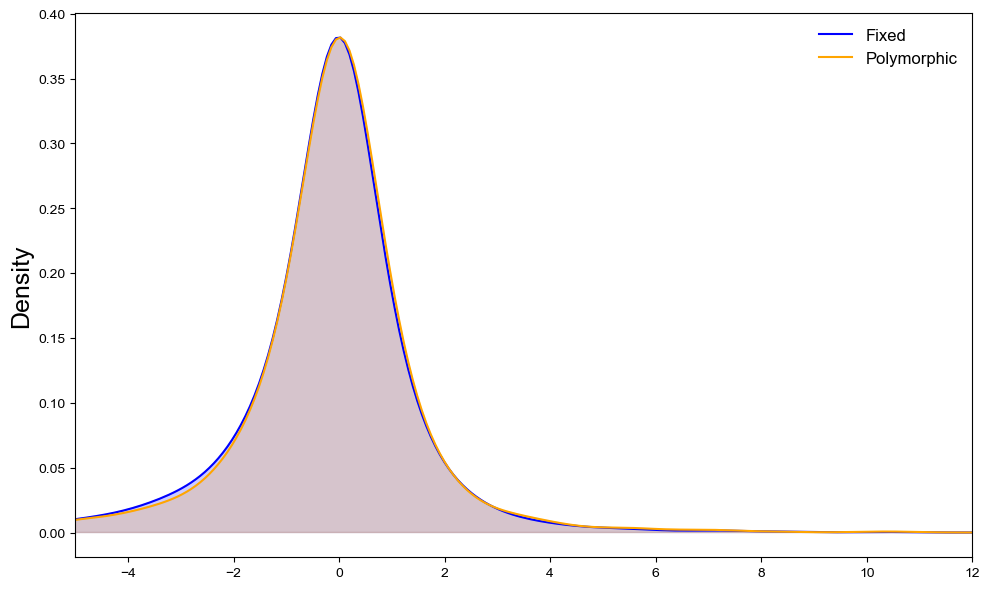

In [53]:
vvv = prepare_alpha(v_mctsn[(v_mctsn["allele1_pred_counts"] > cut_cop) & (v_mctsn["allele2_pred_counts"] > cut_cop) & (v_mctsn["SpecSup447"] > 250)], vv_mctsn[(vv_mctsn["allele1_pred_counts"] > cut_cop) & (vv_mctsn["allele2_pred_counts"] > cut_cop) & (vv_mctsn["SpecSup447"] > 250)], stat = "PhyloP447")
compute_alpha_new(vvv, plot = True, window = [-5, 12])

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.07087133992302608,
 0.13224548516841284,
 [0.13224548516841284,
  1.3665326671444924,
  1.5023042571618608,
  1.6627615908187514,
  1.7491616935570766,
  2.008362001772053,
  2.26756230998703,
  2.465048259103203,
  2.5884769773008105,
  2.946420260073874,
  3.649963953800239,
  4.242421801148756,
  5.2792230340086626],
 'dc > 0.1, likely stable',
 [[10140, 30235], [2610, 8376]],
 <Figure size 1000x600 with 1 Axes>)

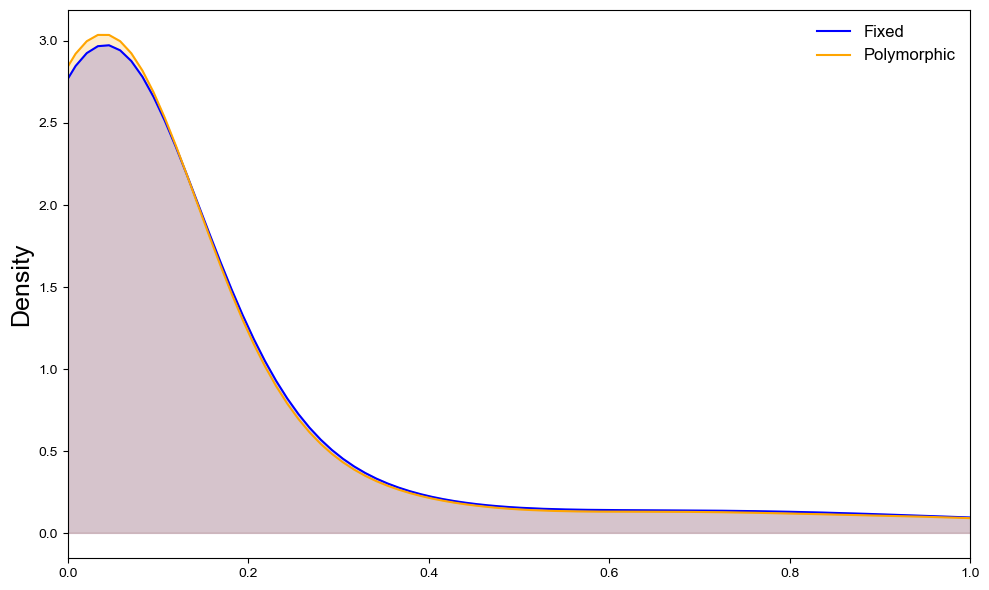

In [49]:
vvv = prepare_alpha(v_mctsn[(v_mctsn["allele1_pred_counts"] > cut_cop) & (v_mctsn["allele2_pred_counts"] > cut_cop)], vv_mctsn[(vv_mctsn["allele1_pred_counts"] > cut_cop) & (vv_mctsn["allele2_pred_counts"] > cut_cop)], stat = "abs logfc")
compute_alpha_new(vvv, plot = True, window = [0, 1])

In [58]:
v_lctsn[v_lctsn["logfc"] > 1].sort_values("allele2_pred_counts").tail(50)

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
7044700,chr5:36885676,chr5:36885676,NIPBL,8866,1.497,0.005,185,2.061992,92.220955,385.08005,2.061992,chr5,36885676,Fixed,.,.
1867590,chr12:50597724,chr12:50597724,DIP2B,92668,0.068,0.013,378,1.126487,177.267030,387.02075,1.126487,chr12,50597724,Fixed,.,.
3026600,chr15:81473815,chr15:81473815,TMC3,99588,-0.122,0.000,218,1.770574,113.855070,388.46185,1.770574,chr15,81473815,Fixed,.,.
5202350,chr20:64082478,chr20:64082478,C20orf201,1653,-2.939,0.000,377,1.395452,148.584500,390.88270,1.395452,chr20,64082478,Fixed,.,.
10021175,chrX:151248587,chrX:151248587,GPR50,72002,2.075,1.000,419,1.642445,125.683945,392.37842,1.642445,chrX,151248587,Fixed,.,.
2581425,chr14:33848931,chr14:33848931,EGLN3,102138,0.075,0.000,229,1.407358,148.255100,393.24800,1.407358,chr14,33848931,Fixed,.,.
5433956,chr22:46885110,chr22:46885110,TBC1D22A,122441,-0.515,0.000,104,1.273350,164.028060,396.49220,1.273350,chr22,46885110,Fixed,.,.
9692869,chrX:13652397,chrX:13652397,TCEANC,0,0.147,0.771,241,1.816484,112.852800,397.49207,1.816484,chrX,13652397,Fixed,.,.
8805726,chr8:20929570,chr8:20929570,LZTS1,625618,0.055,0.000,399,2.192961,87.326645,399.29492,2.192961,chr8,20929570,Fixed,.,.
2851735,chr15:31157333,chr15:31157333,TRPM1,3939,-0.036,0.000,342,2.230468,86.040880,403.77805,2.230468,chr15,31157333,Fixed,.,.


In [73]:
fisher_exact([[2995, 14757-2995], [2877, 14536 - 2877]])

SignificanceResult(statistic=1.0318987635491235, pvalue=0.2866894290038425)

In [79]:
x = pd.read_csv("ChangeCTS_Results/FetalBrainCOP_Expanded_FE.txt", sep = "\t").drop_duplicates()
x[(x["LFC_Cutoff"] != "NoCut") & (x["StartSpecSup"] == 0) & (x["LFC_Cutoff_ForFE"] == 0.2)]

,ID,LFC_Cutoff,StartSpecSup,TauDif_Cutoff,LFC_Cutoff_ForFE,IncOrDecCTS,IncludesFocalSites,"[[fixed_reinf, fixed_oppo], [poly_reinf, poly_oppo]]",Fisher exact OR,Fisher exact p-value
4,NoChange,-0.1,0,0.2,0.2,Increasing CTS,Includes focal sites,"[[9115, 1957], [2239, 626]]",1.302225,4.467747e-07
5,NoChange,-0.1,0,0.2,0.2,Decreasing CTS,Includes focal sites,"[[567, 203], [147, 68]]",1.292048,1.419025e-01
6,NoChange,-0.1,0,0.2,0.2,Increasing CTS,Does not include focal sites,"[[2420, 1952], [555, 625]]",1.396119,3.993506e-07
7,NoChange,-0.1,0,0.2,0.2,Decreasing CTS,Does not include focal sites,"[[198, 195], [42, 67]]",1.619780,3.049502e-02
44,NoRepeatsNoPseudos,-0.1,0,0.2,0.2,Increasing CTS,Includes focal sites,"[[4430, 933], [1080, 272]]",1.195824,2.142231e-02
45,NoRepeatsNoPseudos,-0.1,0,0.2,0.2,Decreasing CTS,Includes focal sites,"[[273, 106], [67, 32]]",1.230076,3.867664e-01
46,NoRepeatsNoPseudos,-0.1,0,0.2,0.2,Increasing CTS,Does not include focal sites,"[[1110, 930], [256, 272]]",1.268145,1.647006e-02
47,NoRepeatsNoPseudos,-0.1,0,0.2,0.2,Decreasing CTS,Does not include focal sites,"[[93, 100], [20, 31]]",1.441500,2.726963e-01
84,NoChange,0.1,0,0.2,0.2,Increasing CTS,Includes focal sites,"[[543, 180], [153, 49]]",0.966122,9.265752e-01
85,NoChange,0.1,0,0.2,0.2,Decreasing CTS,Includes focal sites,"[[8194, 2323], [2332, 580]]",0.877296,1.179288e-02


In [82]:
x = pd.read_csv("ChangeCTS_Results/FetalBrainCOP_Expanded_Alpha.txt", sep = "\t").drop_duplicates()
x[(x["LFC_Cutoff"] != "NoCut") & (x["StartSpecSup"] == 0)].to_csv("Bleh.csv")

In [26]:
#More SOX9 binders than expected by chance
fisher_exact([[10, 1], [99076 - 10, 99530]])
fisher_exact([[10, 1], [99076 - 10, 99530]])

SignificanceResult(statistic=10.046837461894091, pvalue=0.006236972404187956)

In [48]:
cop_cut = (32.073036 + 31.682693)/2
cut_cop = (32.073036 + 31.682693)/2

In [33]:
myl_cand = ["NKX6-2", "PDGFRA", "SOX9", "SOX10", "NKX2-2", "NKX6-1", "OLIG2", "MYRF", "TCF7L2", "ZNF24", "CHD8", "CHD7", "NFATC2", "ZBTB33", "SOX2", "SOX3", "SOX4", "SOX5", "SOX6", "SOX8", "RXRA", "RXRG"]
v_lctsn_c = v_lctsn[v_lctsn["NearestGene"].isin(myl_cand)]
v_mctsn_c = v_mctsn[v_mctsn["NearestGene"].isin(myl_cand)]

In [34]:
v_lctsn_c[v_lctsn_c["logfc"] > 0.25]
v_mctsn_c[v_mctsn_c["logfc"] < -0.25]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos
466457,chr1:165425566,chr1:165425566,RXRG,19544,-0.801,0.000,400,-1.099346,54.642082,25.502983,1.099346,chr1,165425566
466458,chr1:165425602,chr1:165425602,RXRG,19508,-0.895,0.000,375,-0.289173,54.147484,44.312744,0.289173,chr1,165425602
466461,chr1:165426003,chr1:165426003,RXRG,19107,-0.493,0.000,261,-0.560342,40.133278,27.216030,0.560342,chr1,165426003
1790489,chr12:23579020,chr12:23579020,SOX5,317006,0.346,0.000,350,-0.868499,49.437347,27.077642,0.868499,chr12,23579020
1790655,chr12:23616686,chr12:23616686,SOX5,279340,-4.486,0.000,401,-0.951535,63.394684,32.780247,0.951535,chr12,23616686
1791921,chr12:23890263,chr12:23890263,SOX5,5763,-0.818,0.018,186,-0.335031,17.094532,13.551977,0.335031,chr12,23890263
1792375,chr12:23999108,chr12:23999108,SOX5,49347,0.193,0.001,19,-1.764570,83.736680,24.644909,1.764570,chr12,23999108
1793332,chr12:24223249,chr12:24223249,SOX5,273488,-0.273,0.000,433,-1.340106,86.324060,34.097290,1.340106,chr12,24223249
1794227,chr12:24442720,chr12:24442720,SOX5,492959,-0.518,0.000,407,-0.530293,38.246430,26.482357,0.530293,chr12,24442720
3594071,chr17:71196366,chr17:71196366,SOX9,924656,-0.379,0.000,185,-0.872834,53.977566,29.475689,0.872834,chr17,71196366


In [4]:
tau_more_cts = tau[tau["Dif"] > 0.2]
tau_less_cts = tau[tau["Dif"] < -0.2]

taup = pd.read_csv("Taus_Polymorphic_Group1_WithNeuron.txt", sep = "\t")
taup["Dif"] = taup["Tau_Allele1"] - taup["Tau_Allele2"]

taup_cand_cts = taup[np.abs(taup["Dif"]) > 0.2]

vv_cand_cts = vv[vv["Position"].isin(taup_cand_cts["Position"])]
vv_cand_cts = vv_cand_cts.set_index("Position").join(taup_cand_cts.set_index("Position"))

signs = []
for index, row in vv_cand_cts.iterrows():
    if np.sign(row["logfc"]) == np.sign(row["fixed logfc"]):
        signs.append(1)
    else:
        signs.append(-1)
vv_cand_cts["SignFlip"] = signs
vv_cand_cts["Fixed Dif"] = vv_cand_cts["SignFlip"]*vv_cand_cts["Dif"]

taup_more_cts = vv_cand_cts[vv_cand_cts["Fixed Dif"] > 0.2]
taup_less_cts = vv_cand_cts[vv_cand_cts["Fixed Dif"] < -0.2]

In [86]:
vv_cand_cts.sort_values("fixed logfc").head(50).loc["chr4:22320268"]

Unnamed: 0              chr4:22320268
MAFMaxAcrossAncestry         0.319026
NearestGene                    GPR125
NearestDist                    195729
PhyloP447                       0.176
PhastCons447                      0.0
SpecSup447                        188
logfc                        2.027984
allele1_pred_counts         493.61752
allele2_pred_counts         2013.1426
abs logfc                    2.027984
Human ref                           C
Human alt                           G
Chimp ref                           C
Gorilla ref                         C
UnfoldedMAF                  0.319026
fixed logfc                 -2.027984
Chrom                            chr4
Pos                          22320268
Tau_Allele1                  0.615546
Tau_Allele2                  0.895035
Tau_abs_logfc                0.928651
Tau_jsd                      0.917386
Dif                         -0.279489
SignFlip                            1
Fixed Dif                   -0.279489
Name: chr4:2

In [5]:
fisher_exact([[tau_more_cts.shape[0], tau_less_cts.shape[0]], [taup_more_cts.shape[0], taup_less_cts.shape[0]]])

SignificanceResult(statistic=0.9792048379632542, pvalue=0.5135491677070974)

In [6]:
v_mcts = v[v["Position"].isin(tau_more_cts["Position"])]
v_lcts = v[v["Position"].isin(tau_less_cts["Position"])]
vv_mcts = vv_cand_cts.loc[taup_more_cts.index]
vv_lcts = vv_cand_cts.loc[taup_less_cts.index]

In [36]:
"chr10:10650022" in te_blacklist["Position"]

False

In [31]:
y = pd.read_csv("vMCTS_LSN_Download.txt", sep = "\t")
y

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd,Dif
0,chr1:2276030,chr1:2276030,SKI,47329,-2.810,0.000,270,0.090307,410.77360,437.30835,0.090307,0.681676,0.364535,0.791335,0.885098,0.317141
1,chr1:2994422,chr1:2994422,ACTRT2,27062,-0.027,0.001,190,0.079163,783.37476,827.56104,0.079163,0.575752,0.375211,0.760034,0.788684,0.200542
2,chr1:3485509,chr1:3485509,ARHGEF16,30867,-3.951,0.000,225,0.000856,346.80444,347.01025,0.000856,0.806343,0.512414,0.985432,0.946415,0.293930
3,chr1:3648329,chr1:3648329,WRAP73,1736,0.848,0.000,234,-0.015987,460.56058,455.48520,0.015987,0.715301,0.475375,0.960274,0.944276,0.239926
4,chr1:4050336,chr1:4050336,C1orf174,150076,-1.424,0.000,166,0.005665,270.27940,271.34270,0.005665,0.614477,0.295488,0.966095,0.974736,0.318989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10567,chrX:150552205,chrX:150552205,MTM1,16328,-3.113,0.000,391,-0.029498,301.05267,294.95970,0.029498,0.812851,0.586013,0.939790,0.966763,0.226837
10568,chrX:150552242,chrX:150552242,MTM1,16290,0.491,0.000,360,0.002765,311.32474,311.92188,0.002765,0.803588,0.564946,0.907946,0.791097,0.238642
10569,chrX:151617791,chrX:151617791,PASD1,54084,-0.357,0.000,378,0.028580,933.14124,951.81116,0.028580,0.803210,0.585558,0.980629,0.988250,0.217652
10570,chrX:152336239,chrX:152336239,GABRA3,115069,-0.043,0.000,219,0.056748,412.95627,429.52338,0.056748,0.669465,0.451819,0.917574,0.884025,0.217646


In [29]:
taup[taup["Position"] == "chr10:10650022"]

,Position,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd,Dif
14799,chr10:10650022,0.847905,0.404965,0.870207,0.825352,0.44294


In [50]:
vv[vv["Position"] == "chr10:112738717"]


,Unnamed: 0,Position,MAFMaxAcrossAncestry,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Human ref,Human alt,Chimp ref,Gorilla ref,UnfoldedMAF,fixed logfc


In [33]:
vv[vv["Position"] == "chr10:100697537"]

vv3 = add_unfold(vv2)
vv_ref = vv3[vv3["Human ref"] == vv3["Chimp ref"]]
vv_alt = vv[vv["Human alt"] == vv["Chimp ref"]]
vv_ref["fixed logfc"] = -vv_ref["logfc"].astype(float)
vv_alt["fixed logfc"] = vv_alt["logfc"].astype(float)
vv = pd.concat([vv_ref, vv_alt])

,Unnamed: 0,Position,MAFMaxAcrossAncestry,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Human ref,Human alt,Chimp ref,Gorilla ref,UnfoldedMAF,fixed logfc
chr10:100697537-G-A,chr10:100697537,chr10:100697537,0.383309,PAX2,48133,-1.164,0.0,399,0.052805,1202.1702,1246.9863,0.052805,G,A,G,G,0.383309,-0.052805


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["MAFMaxAcrossAncestry"] = z
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

(0.05315977489700763,
 0.7593911823647304,
 [0.7593911823647304,
  1.1824885771543094,
  2.0286833667334676,
  6.894303406813631,
  7.740498196392789,
  15.567800000000002],
 'dc > 0.1, likely stable',
 [[2054, 8518], [437, 1914]],
 <Figure size 1000x600 with 1 Axes>)

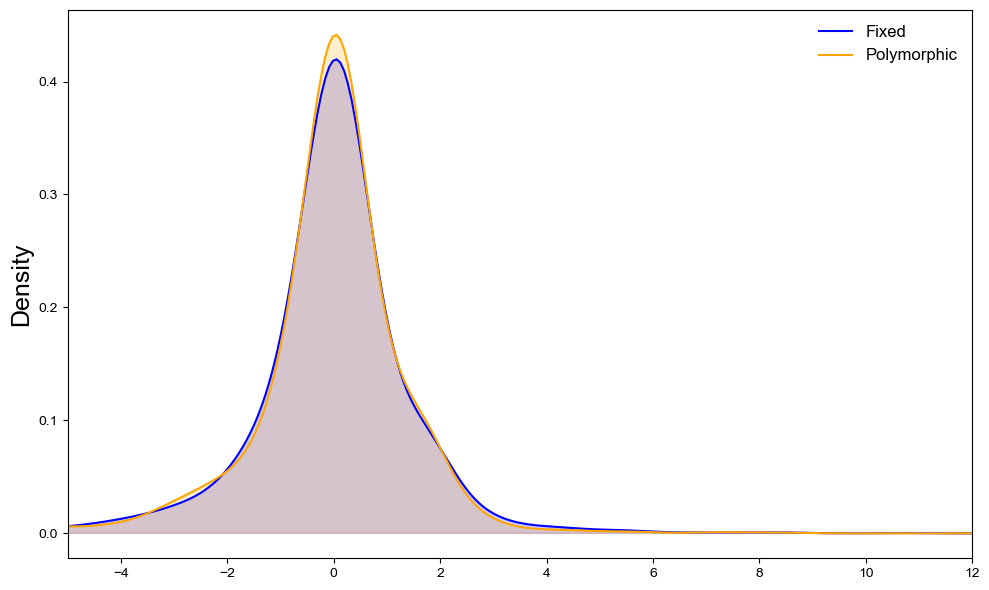

In [43]:
vvv = prepare_alpha(v_mcts, vv_mcts, stat = "PhyloP447")
compute_alpha_new(vvv, plot = True)

(-0.02316075395523054,
 -0.01628737474949915,
 [2.1697158316633285,
  7.387917034068138,
  8.586692985971947,
  15.567800000000002],
 'dc > 0.1, likely stable',
 [[5658, 4914], [1515, 1286]],
 <Figure size 1000x600 with 1 Axes>)

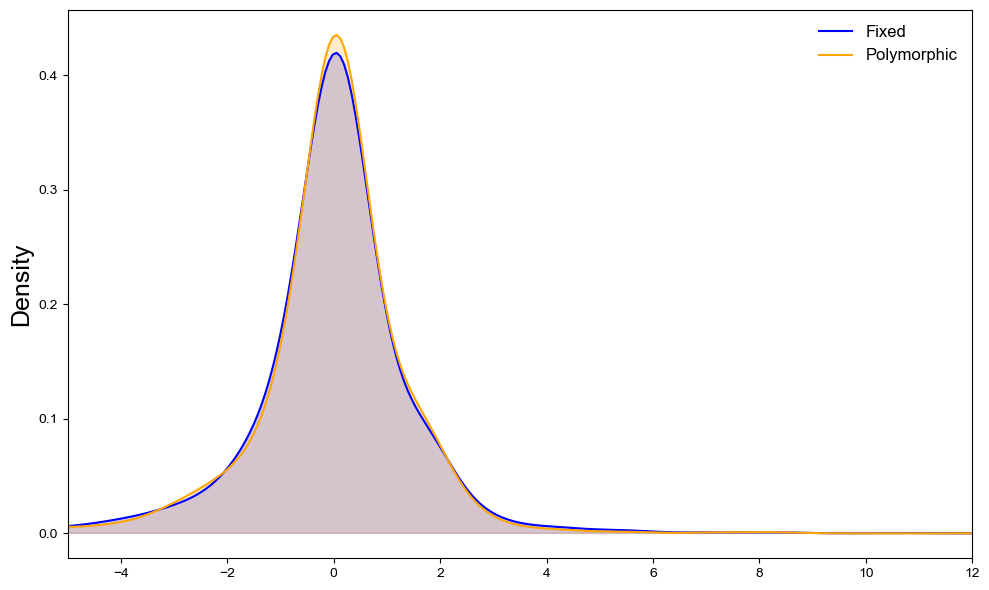

In [44]:
vvv = prepare_alpha(y, z, stat = "PhyloP447")
compute_alpha_new(vvv, plot = True)

In [53]:
o = open("Func_Local.txt")
oo = open("Func_Global.txt")

x = []
w = []
for line in o:
    w.append(line)
for line in oo:
    x.append(line)
x == w

True

In [57]:
vv2 = pd.read_csv("Poly_MAF0.25_LiangSteinNeuron.txt.gz", sep = "\t")


In [58]:
vv2

,Unnamed: 0,Position,MAFMaxAcrossAncestry,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc
0,chr10:100000235,chr10:100000235,0.319120,DNMBP,9675,0.323,0.000,443,0.044364,1285.46670,1325.60950,0.044364
1,chr10:100002628,chr10:100002628,0.578567,DNMBP,7282,-0.346,0.000,437,0.005797,466.08356,467.96008,0.005797
2,chr10:100004827,chr10:100004827,0.572780,DNMBP,5083,-1.019,0.000,187,0.023751,914.81104,929.99600,0.023751
3,chr10:100005358,chr10:100005358,0.304798,DNMBP,4552,-0.680,0.000,418,-0.006299,493.51355,491.36337,0.006299
4,chr10:100005711,chr10:100005711,0.328561,DNMBP,4199,-0.203,0.001,185,-0.028610,623.38960,611.14905,0.028610
...,...,...,...,...,...,...,...,...,...,...,...,...
3130266,chrY:9561874,chrY:9561874,0.713087,FAM197Y1,14790,2.028,0.969,207,0.001731,145.82253,145.99759,0.001731
3130267,chrY:9587157,chrY:9587157,0.255250,FAM197Y1,40073,-0.162,0.003,85,0.019052,344.10370,348.67804,0.019052
3130268,chrY:9601209,chrY:9601209,0.598676,FAM197Y1,54125,0.302,0.001,188,0.014120,363.34546,366.91900,0.014120
3130269,chrY:9602899,chrY:9602899,0.593522,FAM197Y1,55815,0.000,0.050,1,0.023253,149.83429,152.26889,0.023253


In [59]:
path = "./"
maf_base = pd.read_csv(path + "UnfoldPoly/HumPoly_NC_Final_CREs_NoHLA_LinkMAF_Base.txt", sep = "\t").drop_duplicates()
maf_base.index = maf_base["Position"] + ":" + maf_base["MAFMaxAcrossAncestry"].astype(str)
maf_base

,Position,Human ref,Human alt,MAFMaxAcrossAncestry
chr1:13273:0.248405,chr1:13273,G,C,0.248405
chr1:14464:0.302604,chr1:14464,A,T,0.302604
chr1:15211:0.287572,chr1:15211,T,G,0.287572
chr1:15447:0.0826677,chr1:15447,A,G,0.082668
chr1:15616:0.0713998,chr1:15616,G,A,0.071400
...,...,...,...,...
chrY:56886518:0.6,chrY:56886518,A,G,0.600000
chrY:56886638:0.6,chrY:56886638,A,G,0.600000
chrY:56886905:0.102981,chrY:56886905,C,T,0.102981
chrY:56886944:0.5,chrY:56886944,C,T,0.500000


In [16]:
print(np.mean(v_mcts["logfc"]), np.mean(v_lcts["logfc"]), np.mean(vv_mcts["fixed logfc"]), np.mean(vv_lcts["fixed logfc"]), np.mean(z["fixed logfc"]))

-0.13700871290486477 0.14260231707513032 -0.11526225481430658 0.1420868408832292 -0.12036256785907085


In [8]:
np.mean(tau_less_cts["Tau_abs_logfc"])

0.8920130209802924

In [9]:
np.mean(tau_more_cts["Tau_abs_logfc"])

0.8913287402374541

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["MAFMaxAcrossAncestry"] = z
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

(0.12379765407209908,
 0.17416433173172507,
 [0.17416433173172507,
  1.3203638496318812,
  1.5183437663600903,
  1.6642237050019282,
  1.9559835822856044,
  4.4567825304314],
 'dc > 0.1, likely stable',
 [[2341, 8231], [469, 1882]],
 <Figure size 1000x600 with 1 Axes>)

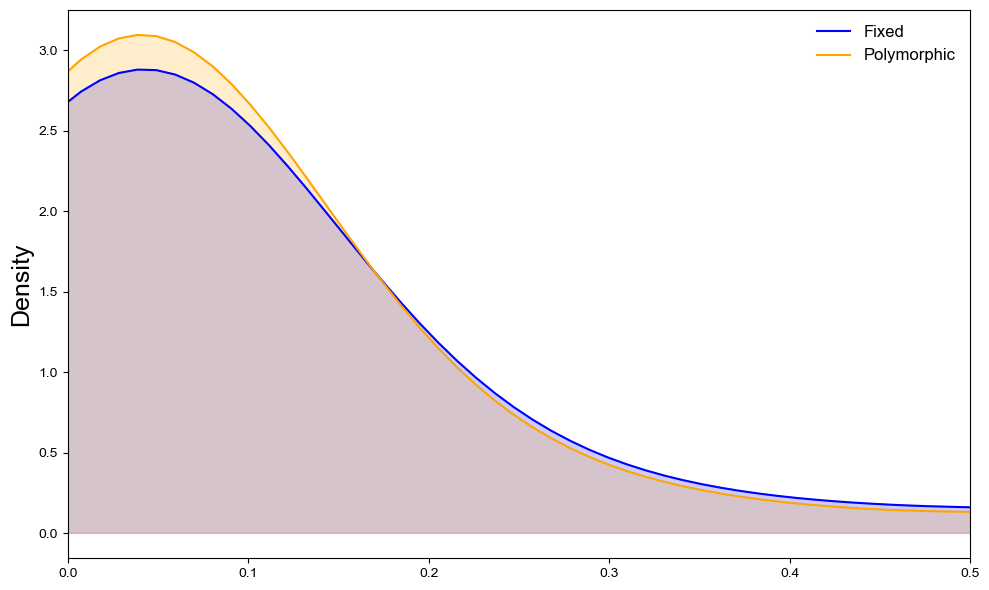

In [99]:
vvv = prepare_alpha(v_mcts, vv_mcts, stat = "abs logfc")
compute_alpha_new(vvv, plot = True, window = [0, 0.5])

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["MAFMaxAcrossAncestry"] = z
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

(-0.017644197101155168,
 0.1763379716843798,
 [0.1763379716843798,
  0.6191886482985248,
  0.977238131518472,
  1.0526169700910923,
  1.5425794208131256,
  4.0300810937096],
 'dc > 0.1, likely stable',
 [[2434, 8290], [542, 1814]],
 <Figure size 1000x600 with 1 Axes>)

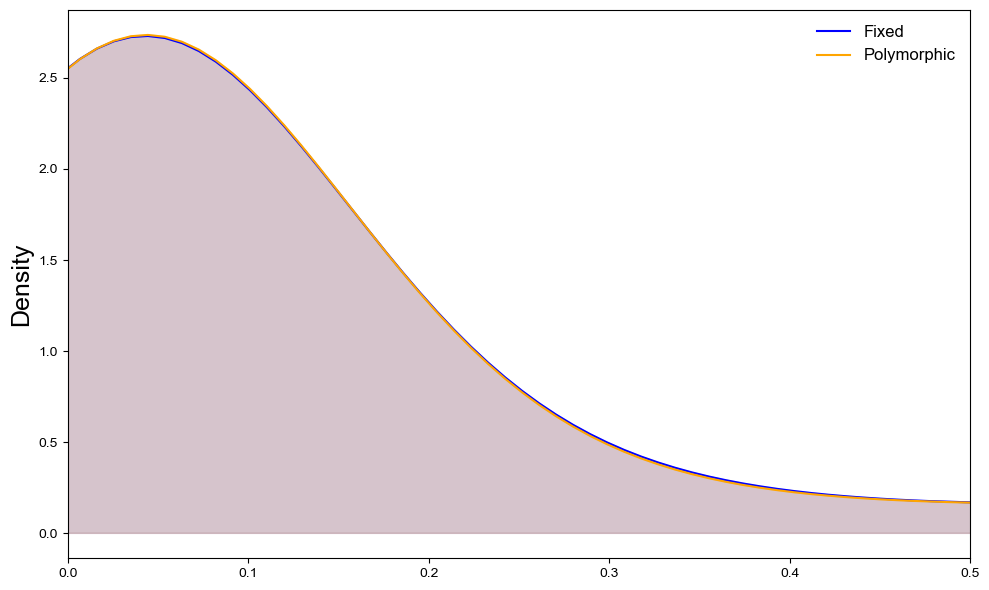

In [100]:
vvv = prepare_alpha(v_lcts, vv_lcts, stat = "abs logfc")
compute_alpha_new(vvv, plot = True, window = [0, 0.5])

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.1433279545258348,
 0.16374433611445094,
 [0.16374433611445094, 1.7371636743228476, 2.008083560371975, 4.4567825304314],
 'dc > 0.1, likely stable',
 [[1491, 4591], [281, 1010]],
 <Figure size 1000x600 with 1 Axes>)

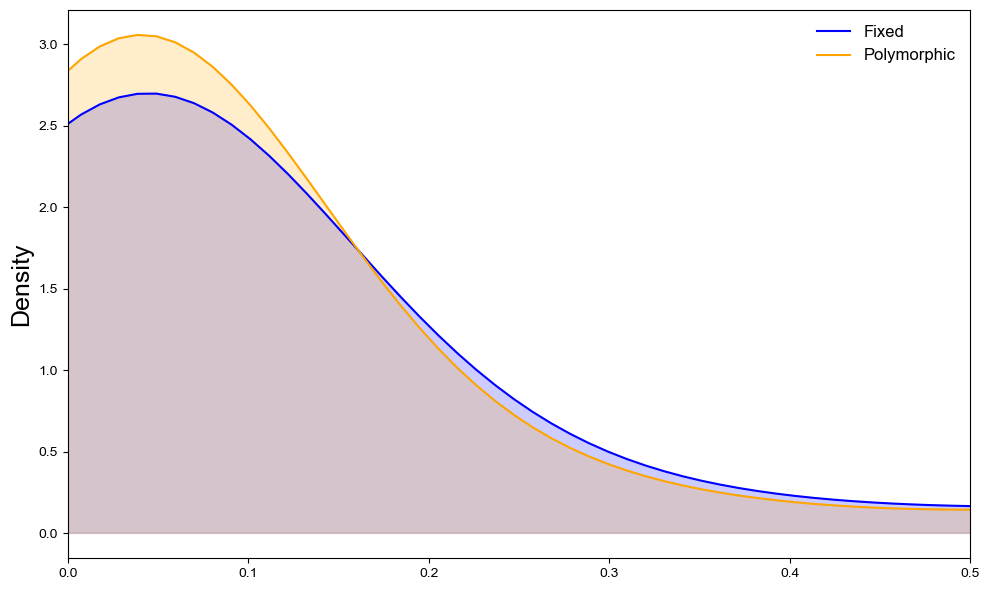

In [17]:
vvv = prepare_alpha(v_mcts[v_mcts["SpecSup447"] > 250], vv_mcts[vv_mcts["SpecSup447"] > 250], stat = "abs logfc")
compute_alpha_new(vvv, plot = True, window = [0, 0.5])

In [111]:
vv_mcts["Position"] = vv_mcts.index
vv_lcts["Position"] = vv_lcts.index

In [109]:
v_mcts_rr, vv_mcts_rr = remove_pseudos(v_mcts, vv_mcts)
v_mcts_rr, vv_mcts_rr = remove_repeats(v_mcts_rr, vv_mcts_rr)

v_lcts_rr, vv_lcts_rr = remove_pseudos(v_lcts, vv_lcts)
v_lcts_rr, vv_lcts_rr = remove_repeats(v_lcts_rr, vv_lcts_rr)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.23873729134740562,
 2,
 [[396, 5686], [65, 1226]],
 [[396, 5686], [65, 1226]],
 <Figure size 1000x600 with 1 Axes>)

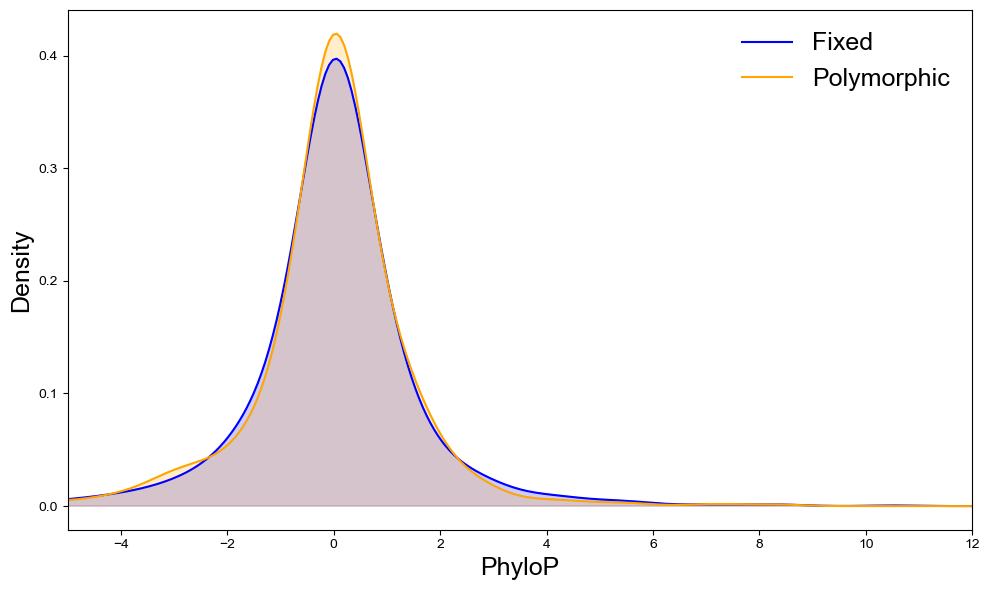

In [131]:
vvv = prepare_alpha(v_mcts[v_mcts["SpecSup447"] > 250], vv_mcts[vv_mcts["SpecSup447"] > 250], stat = "PhyloP447")
compute_alpha_cutoff(vvv, plot = True, cutoff = 2)

In [ ]:
65/1226

In [132]:
fisher_exact([[396, 5686], [65, 1226]])

SignificanceResult(statistic=1.3136069698855488, pvalue=0.04956759662847931)

In [140]:
tau_ncts = tau[np.abs(tau["Dif"]) < 0.05]
v_ncts = v[v["Position"].isin(tau_ncts["Position"])]

np.mean(v_ncts["abs logfc"])


KeyError: 'abs logfc'

In [208]:
v_mcts.sort_values("logfc").head(50)

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd,Dif,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
Position,,,,,,,,,,,,,,,,,,,
chr5:103079946,chr5:103079946,chr5:103079946,GIN1,40160,-0.441,0.000,159,-4.270868,673.566160,34.891594,4.270868,0.964643,0.297523,0.981434,0.953451,0.667120,Fixed,.,.
chr20:50422105,chr20:50422105,chr20:50422105,PTPN1,88287,-0.093,0.000,347,-3.899206,646.745100,43.346603,3.899206,0.914837,0.664811,0.983995,0.962462,0.250026,Fixed,.,.
chr7:136742070,chr7:136742070,chr7:136742070,CHRM2,126798,-0.827,0.000,243,-3.880782,322.451930,21.889368,3.880782,0.880281,0.673677,0.968811,0.908656,0.206604,Fixed,.,.
chr3:173512186,chr3:173512186,chr3:173512186,NLGN1,92412,1.009,0.002,172,-3.843665,235.805270,16.424606,3.843665,0.916662,0.433798,0.990263,0.974556,0.482865,Fixed,.,.
chr22:42927189,chr22:42927189,chr22:42927189,ARFGAP3,69942,0.750,0.000,367,-3.792090,424.969570,30.677845,3.792090,0.922848,0.454837,0.969021,0.931105,0.468011,Fixed,.,.
chr15:74426729,chr15:74426729,chr15:74426729,SEMA7A,7225,0.087,0.002,189,-3.693222,963.199600,74.463900,3.693222,0.980740,0.745637,0.977458,0.836965,0.235103,Fixed,.,.
chr21:31902657,chr21:31902657,chr21:31902657,HUNK,29579,-0.148,0.000,269,-3.652009,167.316640,13.309903,3.652009,0.891643,0.448672,0.967968,0.928997,0.442971,Fixed,.,.
chr13:35343588,chr13:35343588,chr13:35343588,MAB21L1,133088,0.204,0.004,182,-3.606095,159.721440,13.116579,3.606095,0.880853,0.475192,0.984568,0.974014,0.405661,Fixed,.,.
chr8:20478611,chr8:20478611,chr8:20478611,LZTS1,174659,-0.739,0.000,103,-3.581745,176.594860,14.749100,3.581745,0.859440,0.322547,0.981248,0.971223,0.536893,Fixed,.,.


In [216]:
v_mcts_m["logfc"]

TypeError: 'int' object is not subscriptable

In [215]:
v_mcts_m[v_mcts_m["logfc"] < -0.5]

TypeError: 'int' object is not subscriptable

In [228]:
v_lcts[v_lcts["NearestGene"] == "PDGFRA"]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd,Dif
Position,,,,,,,,,,,,,,,,
chr4:54206341,chr4:54206341,chr4:54206341,PDGFRA,22910,6.638,1.0,399,0.012027,14.915691,15.040555,0.012027,0.303183,0.627091,0.910659,0.886627,-0.323908
chr4:54225111,chr4:54225111,chr4:54225111,PDGFRA,4140,6.980,1.0,406,1.002967,38.882140,77.924350,1.002967,0.229695,0.493964,0.922639,0.941711,-0.264268
chr4:54361775,chr4:54361775,chr4:54361775,PDGFRA,132524,-0.618,0.0,381,3.254354,31.288021,298.563100,3.254354,0.417939,0.879872,0.977933,0.963102,-0.461934


In [227]:
v_lcts[v_lcts["logfc"] > 1].sort_values("PhyloP447").tail(50)

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd,Dif
Position,,,,,,,,,,,,,,,,
chr6:26569312,chr6:26569312,chr6:26569312,ABT1,27744,4.464,1.000,430,1.932399,148.065860,565.151600,1.932399,0.514773,0.734611,0.356411,0.396702,-0.219837
chr2:45710768,chr2:45710768,chr2:45710768,PRKCE,59458,4.467,0.919,423,1.245649,68.473070,162.366880,1.245649,0.560210,0.811720,0.967197,0.919844,-0.251510
chr14:103753719,chr14:103753719,chr14:103753719,ZFYVE21,37950,4.551,0.084,395,1.590216,84.182830,253.469790,1.590216,0.424511,0.812335,0.966482,0.971629,-0.387824
chr11:113441037,chr11:113441037,chr11:113441037,DRD2,34368,4.764,1.000,433,1.947269,25.152973,97.000910,1.947269,0.494645,0.737440,0.838477,0.706215,-0.242795
chr7:124553658,chr7:124553658,chr7:124553658,GPR37,212095,4.792,1.000,440,1.891981,27.876163,103.460880,1.891981,0.302388,0.782808,0.962249,0.966320,-0.480420
chr10:21502450,chr10:21502450,chr10:21502450,CASC10,5158,4.879,1.000,441,1.395114,115.153110,302.863500,1.395114,0.668694,0.875744,0.976636,0.957021,-0.207049
chr16:61778912,chr16:61778912,chr16:61778912,CDH8,257449,4.885,1.000,443,1.847653,19.748528,71.077740,1.847653,0.492085,0.705108,0.515882,0.467446,-0.213023
chr5:157507707,chr5:157507707,chr5:157507707,NIPAL4,47478,4.886,1.000,414,1.261010,68.283134,163.649720,1.261010,0.406097,0.741030,0.907346,0.782306,-0.334933
chr7:29480822,chr7:29480822,chr7:29480822,PRR15,83036,5.028,1.000,422,1.311510,101.306870,251.444900,1.311510,0.429665,0.695332,0.747764,0.684458,-0.265667


In [225]:
myel = list(pd.read_csv("Myelination_Delay_Genes.csv")["Gene"])
v_lcts_m = v_lcts[v_lcts["NearestGene"].isin(myel)]
v_lcts_nm = v_lcts[~v_lcts["NearestGene"].isin(myel)]
v_lcts_ml = v_lcts_m[v_lcts_m["logfc"] > 0.5]
v_lcts_nml = v_lcts_nm[v_lcts_nm["logfc"] > 0.5]

fisher_exact([[v_lcts_ml.shape[0], v_lcts_m.shape[0] - v_lcts_ml.shape[0]], [v_lcts_nml.shape[0], v_lcts_nm.shape[0] - v_lcts_nml.shape[0]]])

SignificanceResult(statistic=0.7546272271233351, pvalue=0.576607945624286)

In [210]:
v_mcts2 = v_mcts[v_mcts["logfc"] < -1]

v2_fore = v_mcts2.copy()

v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
v2_fore["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_fore["Position"]]
v2_fore = v2_fore[["Chrom", "Pos1", "Pos2"]]

#Need to change 
v2_fore.to_csv("MCTS_TauDif0.2_LogfcL-1_Fixed_COP_FilterNewTEs.bed", sep = "\t", header = None, index = None)

v_mctsb = v_mcts.copy()
v_mctsb = v_mctsb[v_mctsb["logfc"] > 0]

v_mctsb["Chrom"] = [x.split(":")[0] for x in v_mctsb["Position"]]
v_mctsb["Pos1"] = [int(x.split(":")[1]) for x in v_mctsb["Position"]]
v_mctsb["Pos2"] = [int(x.split(":")[1]) + 1 for x in v_mctsb["Position"]]

#Set to 0.05 for MEF2A
#Change 0.025 to 0.1 for NFIB and other TFs with large effects on CA
v2_back = pd.concat([v2_fore, v_mctsb])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("MCTS_TauDif0.2_LogfcG0_Fixed_Background_COP_FilterNewTEs.bed", sep = "\t", header = None, index = None)

In [206]:
v2_fore = v_mcts2.copy()

v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
v2_fore["Pos1"] = [int(x.split(":")[1]) - 11 for x in v2_fore["Position"]]
v2_fore["Pos2"] = [int(x.split(":")[1]) + 10 for x in v2_fore["Position"]]
v2_fore = v2_fore[["Chrom", "Pos1", "Pos2"]]
v2_fore.to_csv("COP_Specific.bed", sep = '\t', header = False, index = False)

In [165]:
v2_fore = v_mcts2.copy()
v2_fore = v2_fore[v2_fore["abs logfc"] > 0.25]

v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
v2_fore["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_fore["Position"]]
v2_fore = v2_fore[["Chrom", "Pos1", "Pos2"]]

#Need to change 
v2_fore.to_csv("MCTS_TauDifG0.2_LogfcL-1_Fixed_COP_FilterNewTEs.bed", sep = "\t", header = None, index = None)

v2 = v_ncts.copy()
v2 = v2[v2["abs logfc"] > 0.25]

v2["Chrom"] = [x.split(":")[0] for x in v2["Position"]]
v2["Pos1"] = [int(x.split(":")[1]) for x in v2["Position"]]
v2["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2["Position"]]

#Set to 0.05 for MEF2A
#Change 0.025 to 0.1 for NFIB and other TFs with large effects on CA
v2_back = pd.concat([v2_fore, v2])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("MCTS_AbsTauDifL0.05_AbsLogfcG0.25_Fixed_Background_LSN_FilterNewTEs.bed", sep = "\t", header = None, index = None)

In [154]:
v_mcts_g = v_mcts[v_mcts["logfc"] > 0]
v_mcts_l = v_mcts[v_mcts["logfc"] < 0]
vv_mcts_g = vv_mcts[vv_mcts["fixed logfc"] > 0]
vv_mcts_l = vv_mcts[vv_mcts["fixed logfc"] < 0]

v_lcts_g = v_lcts[v_lcts["logfc"] > 0]
v_lcts_l = v_lcts[v_lcts["logfc"] < 0]
vv_lcts_g = vv_lcts[vv_lcts["fixed logfc"] > 0]
vv_lcts_l = vv_lcts[vv_lcts["fixed logfc"] < 0]

In [164]:
fisher_exact([[132, 2096], [22, 449]])

SignificanceResult(statistic=1.2853053435114503, pvalue=0.32564288585320667)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.22197475872308836,
 2,
 [[132, 2096], [22, 449]],
 [[132, 2096], [22, 449]],
 <Figure size 1000x600 with 1 Axes>)

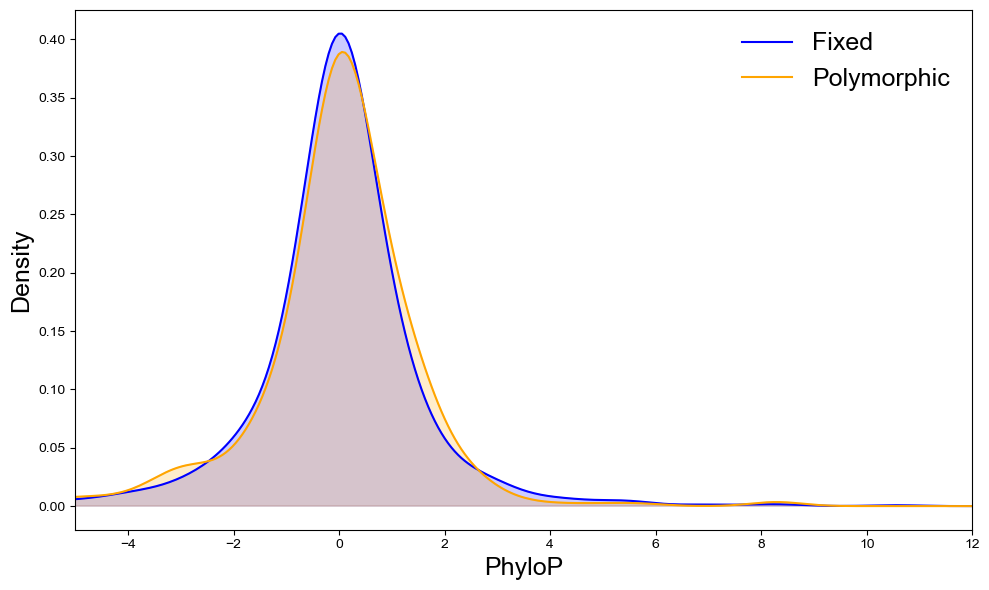

In [163]:
vvv = prepare_alpha(v_mcts_g[v_mcts_g["SpecSup447"] > 250], vv_mcts_g[vv_mcts_g["SpecSup447"] > 250], stat = "PhyloP447")
compute_alpha_cutoff(vvv, plot = True, cutoff = 2)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.1728327992408092,
 0.680970741482966,
 [0.680970741482966, 6.601270541082165, 7.728946693386774, 15.552200000000001],
 'dc > 0.1, likely stable',
 [[884, 2970], [162, 658]],
 <Figure size 1000x600 with 1 Axes>)

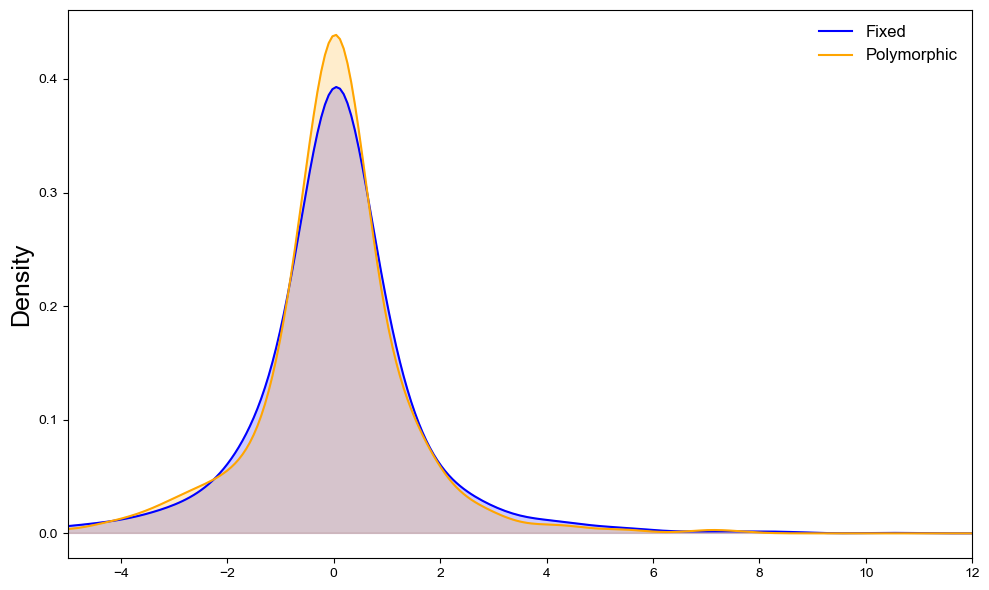

In [159]:
vvv = prepare_alpha(v_mcts_l[v_mcts_l["SpecSup447"] > 250], vv_mcts_l[vv_mcts_l["SpecSup447"] > 250], stat = "PhyloP447")
compute_alpha_new(vvv, plot = True)

In [160]:
fisher_exact([[884, 2970], [162, 658]])

SignificanceResult(statistic=1.2089454212911004, pvalue=0.047351836634562404)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.014266743015874939,
 0.02608256513026319,
 [1.5684336673346735,
  4.995880561122249,
  6.0241146292585235,
  7.823524248496998,
  9.280189178356718,
  16.6492],
 'dc > 0.1, likely stable',
 [[2110, 1850], [450, 389]],
 <Figure size 1000x600 with 1 Axes>)

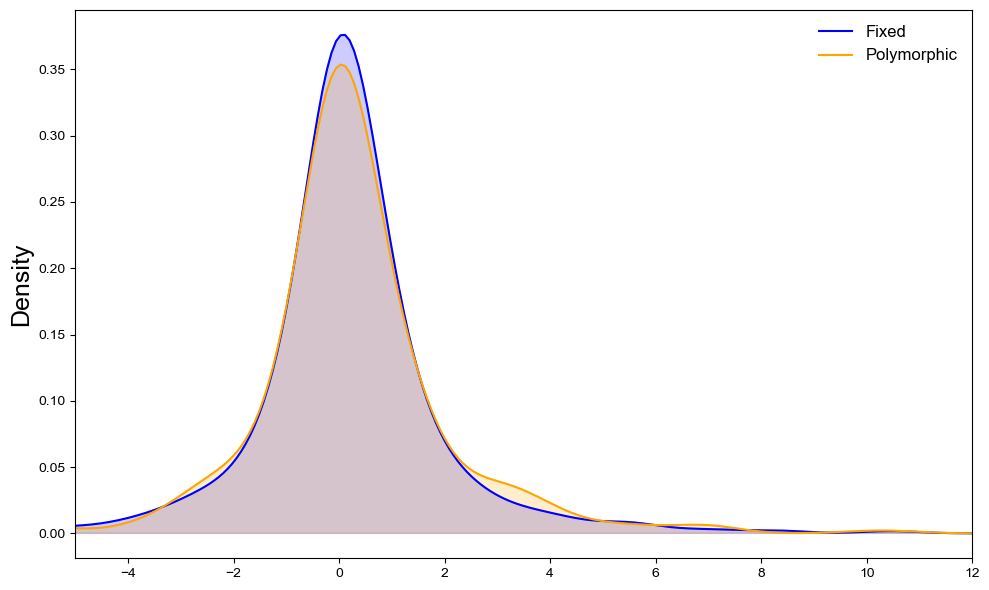

In [158]:
vvv = prepare_alpha(v_lcts_g[v_lcts_g["SpecSup447"] > 250], vv_lcts_g[vv_lcts_g["SpecSup447"] > 250], stat = "PhyloP447")
compute_alpha_new(vvv, plot = True)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.05505975327679269,
 0.027609624970482582,
 [0.08023584013167656,
  0.3199774869771158,
  0.45446670350016716,
  0.7292924937864024,
  0.9690341406318418,
  1.4251280053621898,
  2.5010417375466],
 'dc > 0.1, likely stable',
 [[1297, 1203], [273, 240]],
 <Figure size 1000x600 with 1 Axes>)

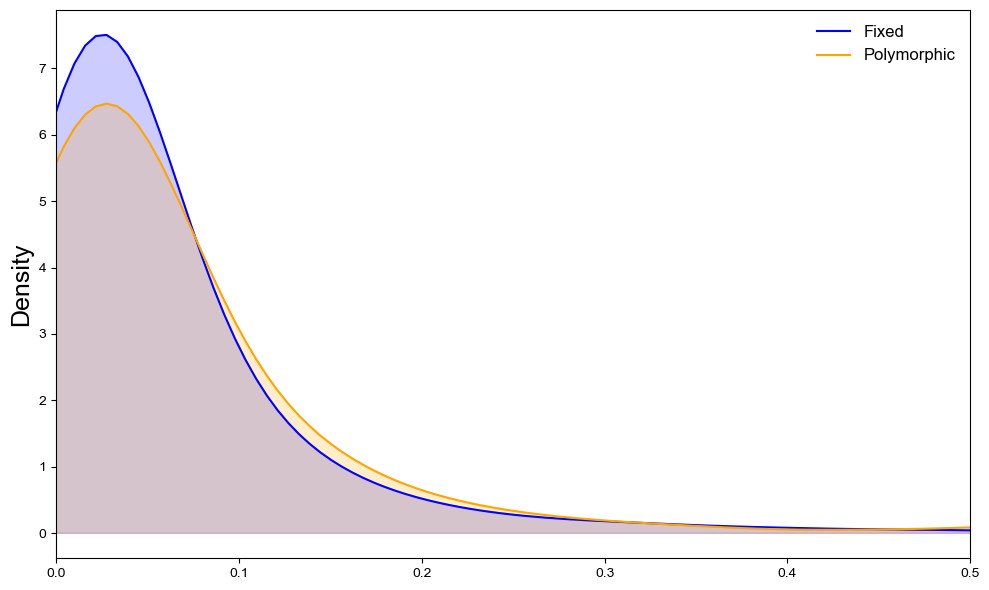

In [156]:
vvv = prepare_alpha(v_lcts_l[v_lcts_l["SpecSup447"] > 250], vv_lcts_l[vv_lcts_l["SpecSup447"] > 250], stat = "abs logfc")
compute_alpha_new(vvv, plot = True, window = [0, 0.5])

In [14]:
x = pd.read_csv("Agoglia_Fraser_2021_DESeq2_HumChp_Hybrid_CS_D100_chpr.txt", sep = "\t")
x = x.dropna()
#x = x[x["padj"] < 0.05]
#xd = x[x["log2FoldChange"] < 0]
#xu = x[x["log2FoldChange"] > 0]

In [15]:
x

,Gene,log2FoldChange,pvalue,padj,padj_mine
0,A1BG,1.359874,9.172780e-13,2.434856e-11,3.476212e-11
1,A1BG-AS1,0.577670,4.175602e-05,3.216647e-04,4.592366e-04
2,A1CF,0.226882,3.326226e-01,5.331422e-01,7.361356e-01
3,A2M,-0.143440,5.568810e-01,7.325234e-01,9.752535e-01
4,A2M-AS1,0.656734,8.378070e-03,3.202563e-02,4.572259e-02
...,...,...,...,...,...
57103,ZXDC,-0.230889,2.336913e-03,1.097579e-02,1.567000e-02
57104,ZYG11A,-0.496190,8.082018e-02,1.954377e-01,2.772534e-01
57106,ZYG11B,-0.154888,7.916079e-02,1.924427e-01,2.730227e-01
57107,ZYX,0.101556,1.748685e-01,3.436816e-01,4.829542e-01


In [19]:
pli = pd.read_csv("gnomad.v4.1.constraint_metrics.tsv", sep = "\t")
pli = pli.dropna()
pli = pli[pli["lof.pLI"] > 0.9]
keep_pli = pli["gene"]


In [24]:
syngo = pd.read_csv("../Cell_Type_Prop/Cell_Type_Prop/syngo_genes.csv")
keep = syngo["hgnc_symbol"]

#Less than -0.25, CTS increase in neurons
v_mcts_025 = v_mcts[v_mcts["logfc"] < -0.25]

#Less than -0.25 all sites except our neuron-specific ones
v_025 = v[(v["logfc"] < -0.25) & (~v["Position"].isin(v_mcts_025["Position"]))]

#Now restrict to synaptic
v_mcts_025_syn = v_mcts_025[v_mcts_025["NearestGene"].isin(keep)]
v_025_syn = v_025[v_025["NearestGene"].isin(keep)]

#Non-synaptic
v_mcts_025_nsyn = v_mcts_025[~v_mcts_025["NearestGene"].isin(keep)]
v_025_nsyn = v_025[~v_025["NearestGene"].isin(keep)]

#Count and run fisher's exact test
cts_syn_num = v_mcts_025_syn.shape[0]
cts_nsyn_num = v_mcts_025_nsyn.shape[0]

ncts_syn_num = v_025_syn.shape[0]
ncts_nsyn_num = v_025_nsyn.shape[0]

print(fisher_exact([[cts_syn_num, cts_nsyn_num], [ncts_syn_num, ncts_nsyn_num]]))
print([[cts_syn_num, cts_nsyn_num], [ncts_syn_num, ncts_nsyn_num]])

SignificanceResult(statistic=1.0493438471278922, pvalue=0.6471045169573821)
[[141, 730], [714, 3879]]


In [77]:
vv_mcts = z.copy()
v_mcts = y.copy()
v_mcts

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd,Dif,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
0,chr1:2276030,chr1:2276030,SKI,47329,-2.810,0.000,270,0.090307,410.77360,437.30835,0.090307,0.681676,0.364535,0.791335,0.885098,0.317141,Fixed,.,.
1,chr1:2994422,chr1:2994422,ACTRT2,27062,-0.027,0.001,190,0.079163,783.37476,827.56104,0.079163,0.575752,0.375211,0.760034,0.788684,0.200542,Fixed,.,.
2,chr1:3485509,chr1:3485509,ARHGEF16,30867,-3.951,0.000,225,0.000856,346.80444,347.01025,0.000856,0.806343,0.512414,0.985432,0.946415,0.293930,Fixed,.,.
3,chr1:3648329,chr1:3648329,WRAP73,1736,0.848,0.000,234,-0.015987,460.56058,455.48520,0.015987,0.715301,0.475375,0.960274,0.944276,0.239926,Fixed,.,.
4,chr1:4050336,chr1:4050336,C1orf174,150076,-1.424,0.000,166,0.005665,270.27940,271.34270,0.005665,0.614477,0.295488,0.966095,0.974736,0.318989,Fixed,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10567,chrX:150552205,chrX:150552205,MTM1,16328,-3.113,0.000,391,-0.029498,301.05267,294.95970,0.029498,0.812851,0.586013,0.939790,0.966763,0.226837,Fixed,.,.
10568,chrX:150552242,chrX:150552242,MTM1,16290,0.491,0.000,360,0.002765,311.32474,311.92188,0.002765,0.803588,0.564946,0.907946,0.791097,0.238642,Fixed,.,.
10569,chrX:151617791,chrX:151617791,PASD1,54084,-0.357,0.000,378,0.028580,933.14124,951.81116,0.028580,0.803210,0.585558,0.980629,0.988250,0.217652,Fixed,.,.
10570,chrX:152336239,chrX:152336239,GABRA3,115069,-0.043,0.000,219,0.056748,412.95627,429.52338,0.056748,0.669465,0.451819,0.917574,0.884025,0.217646,Fixed,.,.


In [11]:
82747 - 1512 - 12923

68312

In [ ]:
fisher_exact([[280, 1512 - 280], [12923 - 280, 82747 - 1512 - 12923]])

In [194]:
v_mcts2 = v_mcts.set_index("NearestGene")
v_mcts2 = v_mcts2.join(x.set_index("Gene"))
v_mcts2 = v_mcts2.dropna()
v_mcts2 = v_mcts2[v_mcts2["logfc"] < -0.25]
v_mcts2["NearestGene"] = v_mcts2.index

In [205]:
v_mcts2_up = v_mcts2[(v_mcts2["padj"] < 0.05) & (v_mcts2["log2FoldChange"] > 0)]
v_mcts2_down = v_mcts2[(v_mcts2["padj"] < 0.05) & (v_mcts2["log2FoldChange"] < 0)]



In [190]:
binomtest(136, 163 + 136)

BinomTestResult(k=136, n=299, alternative='two-sided', statistic=0.45484949832775917, pvalue=0.1325435110015917)

In [204]:
v_mcts2_up[(v_mcts2_up["allele1_pred_counts"] > 550) & (v_mcts2_up["allele2_pred_counts"] < 400)]

,Position,Position.1,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,log2FoldChange,pvalue,padj,padj_mine,NearestGene
NearestGene,,,,,,,,,,,,,,,,,,,,
DIRAS3,chr1:68105164,chr1:68105164,54548,-0.625,0.000,352,-0.950767,713.02234,368.88733,0.950767,chr1,68105164,Fixed,.,.,1.914713,1.579396e-04,1.048676e-03,1.497181e-03,DIRAS3
KCNT2,chr1:195562313,chr1:195562313,1046177,0.183,0.000,208,-1.127225,800.20410,366.32990,1.127225,chr1,195562313,Fixed,.,.,0.463721,1.220440e-03,6.302445e-03,8.997920e-03,KCNT2
ZNF33B,chr10:42549206,chr10:42549206,89339,-0.322,0.000,54,-0.857600,654.35430,361.11853,0.857600,chr10,42549206,Fixed,.,.,0.535231,2.807939e-04,1.735537e-03,2.477804e-03,ZNF33B
SPTLC2,chr14:77604112,chr14:77604112,12525,0.886,0.000,400,-1.004014,719.59845,358.79956,1.004014,chr14,77604112,Fixed,.,.,0.287364,2.744725e-03,1.259103e-02,1.797605e-02,SPTLC2
NIPA2,chr15:22831612,chr15:22831612,7128,-0.465,0.000,291,-1.455747,997.63980,363.70593,1.455747,chr15,22831612,Fixed,.,.,0.344450,1.721302e-06,1.805096e-05,2.577112e-05,NIPA2
CNTNAP4,chr16:76525010,chr16:76525010,247624,-0.257,0.000,247,-1.296873,913.05237,371.61917,1.296873,chr16,76525010,Fixed,.,.,0.376227,2.115653e-03,1.008316e-02,1.439560e-02,CNTNAP4
PID1,chr2:228875249,chr2:228875249,396070,-0.103,0.000,442,-0.797750,692.62256,398.42816,0.797750,chr2,228875249,Fixed,.,.,0.313429,3.394342e-03,1.505801e-02,2.149812e-02,PID1
HUNK,chr21:31902657,chr21:31902657,29579,-0.148,0.000,269,-1.118024,822.90830,379.13397,1.118024,chr21,31902657,Fixed,.,.,0.245804,1.124388e-02,4.092753e-02,5.842294e-02,HUNK
FHIT,chr3:61352501,chr3:61352501,101080,0.274,0.021,443,-0.905425,685.16815,365.79456,0.905425,chr3,61352501,Fixed,.,.,0.639241,6.109765e-04,3.432317e-03,4.900275e-03,FHIT


In [221]:
v_mcts2

,Position,Position.1,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,log2FoldChange,pvalue,padj,padj_mine,NearestGene
NearestGene,,,,,,,,,,,,,,,,,,,,
TAS1R1,chr1:6560536,chr1:6560536,5160,0.636,0.001,101,-0.924213,979.21765,516.01624,0.924213,chr1,6560536,Fixed,.,.,-0.347755,2.060702e-01,0.386063,0.540973,TAS1R1
ENO1,chr1:8854276,chr1:8854276,24423,0.574,0.000,357,-0.798471,1167.11550,671.04254,0.798471,chr1,8854276,Fixed,.,.,-0.394888,6.525774e-07,0.000008,0.000011,ENO1
FBXO2,chr1:11611343,chr1:11611343,43052,-0.630,0.000,222,-0.301142,635.49010,515.76990,0.301142,chr1,11611343,Fixed,.,.,0.848991,1.687543e-03,0.008318,0.011875,FBXO2
VPS13D,chr1:12411580,chr1:12411580,181526,0.374,0.000,292,-0.314766,452.93000,364.14728,0.314766,chr1,12411580,Fixed,.,.,0.180919,2.622160e-02,0.081368,0.116004,VPS13D
KAZN,chr1:14178050,chr1:14178050,420709,-1.071,0.000,182,-0.761357,734.46860,433.29333,0.761357,chr1,14178050,Fixed,.,.,-0.094445,6.025748e-01,0.765739,0.990680,KAZN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TENM1,chrX:125082544,chrX:125082544,118788,-0.872,0.000,277,-1.153533,695.15857,312.48980,1.153533,chrX,125082544,Fixed,.,.,0.144252,4.366783e-01,0.634638,0.863554,TENM1
SMARCA1,chrX:128848579,chrX:128848579,674894,-0.169,0.000,427,-1.162295,2025.94090,905.19290,1.162295,chrX,128848579,Fixed,.,.,-0.038245,7.841246e-01,0.885360,0.990680,SMARCA1
GPR101,chrX:137171160,chrX:137171160,139960,0.575,0.997,437,-1.568934,2468.86430,832.14870,1.568934,chrX,137171160,Fixed,.,.,-0.831251,1.670670e-02,0.056572,0.080711,GPR101


In [235]:
c = Counter(v_mcts2_up["NearestGene"])
for key in c.keys():
    if c[key] > 3:
        print(key, c[key])

SORCS1 4
CSMD1 7


In [238]:
v_mcts2_up

,Position,Position.1,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,log2FoldChange,pvalue,padj,padj_mine,NearestGene
NearestGene,,,,,,,,,,,,,,,,,,,,
FBXO2,chr1:11611343,chr1:11611343,43052,-0.630,0.000,222,-0.301142,635.49010,515.76990,0.301142,chr1,11611343,Fixed,.,.,0.848991,1.687543e-03,8.317594e-03,1.187492e-02,FBXO2
UBR4,chr1:19174636,chr1:19174636,35638,-0.005,0.000,428,-1.189008,2998.46920,1315.14200,1.189008,chr1,19174636,Fixed,.,.,0.214176,1.386475e-02,4.857774e-02,6.934380e-02,UBR4
EPHA10,chr1:37739419,chr1:37739419,13813,0.241,0.000,160,-0.286753,214.84253,176.11607,0.286753,chr1,37739419,Fixed,.,.,0.997436,1.241110e-06,1.340388e-05,1.913655e-05,EPHA10
DIRAS3,chr1:68105164,chr1:68105164,54548,-0.625,0.000,352,-0.950767,713.02234,368.88733,0.950767,chr1,68105164,Fixed,.,.,1.914713,1.579396e-04,1.048676e-03,1.497181e-03,DIRAS3
DPYD,chr1:97432216,chr1:97432216,488767,-0.248,0.001,191,-0.444323,332.61694,244.44992,0.444323,chr1,97432216,Fixed,.,.,0.553570,7.264678e-04,3.985049e-03,5.689404e-03,DPYD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FAAH2,chrX:57398948,chrX:57398948,112136,0.233,0.002,17,-0.688366,1160.12240,719.92140,0.688366,chrX,57398948,Fixed,.,.,3.011259,3.242281e-08,4.724996e-07,6.745816e-07,FAAH2
ZC3H12B,chrX:65508582,chrX:65508582,19798,1.098,0.299,400,-0.347332,510.29022,401.10680,0.347332,chrX,65508582,Fixed,.,.,0.534178,4.212502e-03,1.802755e-02,2.573770e-02,ZC3H12B
SH3BGRL,chrX:81670151,chrX:81670151,468085,0.174,0.004,14,-0.267170,241.85886,200.97210,0.267170,chrX,81670151,Fixed,.,.,0.229879,3.829427e-03,1.666478e-02,2.379209e-02,SH3BGRL


In [243]:
v[(v["logfc"] < -0.25) & (v["NearestGene"] == "SORCS1") & (v["NearestGene"].isin(xu["Gene"]))]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos
1152980,chr10:105920425,chr10:105920425,SORCS1,1244300,0.136,0.000,439,-0.417208,665.48330,498.36203,0.417208,chr10,105920425
1153031,chr10:105935623,chr10:105935623,SORCS1,1229102,0.444,0.004,87,-0.389542,268.50458,204.96880,0.389542,chr10,105935623
1153045,chr10:105939934,chr10:105939934,SORCS1,1224791,-0.034,0.000,326,-0.354857,1124.43650,879.25020,0.354857,chr10,105939934
1153231,chr10:105975891,chr10:105975891,SORCS1,1188834,0.902,0.000,411,-0.452336,451.03450,329.64227,0.452336,chr10,105975891
1153295,chr10:105987001,chr10:105987001,SORCS1,1177724,0.256,0.000,356,-0.293481,1117.66610,911.93840,0.293481,chr10,105987001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165837,chr10:108476701,chr10:108476701,SORCS1,1311976,0.090,0.000,187,-0.270319,377.73370,313.19270,0.270319,chr10,108476701
1166046,chr10:108514709,chr10:108514709,SORCS1,1349984,-1.018,0.000,159,-0.252348,898.70950,754.49255,0.252348,chr10,108514709
1166052,chr10:108515589,chr10:108515589,SORCS1,1350864,1.858,0.002,103,-0.453408,4007.05520,2926.41530,0.453408,chr10,108515589
1166054,chr10:108516003,chr10:108516003,SORCS1,1351278,0.145,0.090,159,-0.371228,1420.57260,1098.27930,0.371228,chr10,108516003


In [241]:
fisher_exact([[4, 161 - 4], [129 - 4, 7475 - 129 - 4]])

SignificanceResult(statistic=1.4964585987261148, pvalue=0.3520030930782188)

In [256]:
fisher_exact([[7, 1512-7], [196 - 7, 82747 - 196 - 1512]])

SignificanceResult(statistic=1.9943152454780362, pvalue=0.09652519506848517)

In [254]:
fisher_exact([[7, 161-7], [196 - 7, 7475 - 196 - 161]])

SignificanceResult(statistic=1.7118807118807118, pvalue=0.20210657922902903)

In [ ]:
fisher_exact([[280, 1512 - 280], [12923 - 280, 82747 - 1512 - 12923]])

In [216]:
v2 = v[v["abs logfc"] > 0.5]

In [219]:
v2[(v2["NearestGene"] == "CSMD1") & (v2["logfc"] > 0)].shape


(42, 13)

In [215]:
binomtest(196, 372)

BinomTestResult(k=196, n=372, alternative='two-sided', statistic=0.5268817204301075, pvalue=0.32457652319284025)

In [267]:
v[(v["logfc"] < -0.25) & (v["NearestGene"].isin(np.setdiff1d(keep_pli, keep)))]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos
5096,chr1:3090443,chr1:3090443,PRDM16,21254,-0.600,0.0,256,-0.894532,1186.75930,638.38360,0.894532,chr1,3090443
5250,chr1:3115171,chr1:3115171,PRDM16,45982,0.651,0.0,285,-0.314561,724.72190,582.74560,0.314561,chr1,3115171
5340,chr1:3129928,chr1:3129928,PRDM16,60739,0.790,0.0,229,-0.293201,441.52246,360.32172,0.293201,chr1,3129928
5506,chr1:3157157,chr1:3157157,PRDM16,87968,0.428,0.0,320,-0.267106,976.89720,811.78700,0.267106,chr1,3157157
5588,chr1:3173728,chr1:3173728,PRDM16,104539,-1.214,0.0,237,-0.262227,1678.91970,1399.88300,0.262227,chr1,3173728
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941341,chr9:136899218,chr9:136899218,TRAF2,12712,0.010,0.0,241,-0.655915,1269.60730,805.78540,0.655915,chr9,136899218
9943470,chr9:137620645,chr9:137620645,EHMT1,1637,0.112,0.0,187,-0.251642,299.68152,251.71451,0.251642,chr9,137620645
9943562,chr9:137647144,chr9:137647144,EHMT1,28136,-0.556,0.0,186,-0.447259,569.55080,417.72836,0.447259,chr9,137647144
9943724,chr9:137691664,chr9:137691664,EHMT1,72656,0.325,0.0,346,-0.260708,1191.11950,994.20166,0.260708,chr9,137691664


In [278]:
v_mcts2_syn.sort_values("PhyloP447").tail(50)

,Position,Position.1,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,log2FoldChange,pvalue,padj,padj_mine,NearestGene
NearestGene,,,,,,,,,,,,,,,,,,,,
SLC8A1,chr2:40883097,chr2:40883097,370689,1.130,0.003,273,-1.314689,684.61120,275.221950,1.314689,chr2,40883097,Fixed,.,.,-0.036682,7.955454e-01,8.914298e-01,9.906796e-01,SLC8A1
PIK3C3,chr18:41812264,chr18:41812264,142990,1.131,0.000,386,-0.797423,848.91720,488.446660,0.797423,chr18,41812264,Fixed,.,.,0.092246,2.831335e-01,4.796072e-01,6.668768e-01,PIK3C3
SV2C,chr5:76228094,chr5:76228094,144701,1.136,0.000,407,-0.812215,1981.90330,1128.707600,0.812215,chr5,76228094,Fixed,.,.,-0.951307,2.772428e-08,4.099438e-07,5.852716e-07,SV2C
CXADR,chr21:17114328,chr21:17114328,398673,1.191,0.001,168,-1.509467,1758.96530,617.820560,1.509467,chr21,17114328,Fixed,.,.,-0.101425,5.041588e-01,6.908061e-01,9.300929e-01,CXADR
DPP6,chr7:153422433,chr7:153422433,630265,1.238,0.001,254,-0.311300,1138.55790,917.581050,0.311300,chr7,153422433,Fixed,.,.,0.721219,3.843357e-02,1.101120e-01,1.568347e-01,DPP6
RPS20,chr8:55994349,chr8:55994349,80152,1.349,0.000,340,-1.023091,2705.67920,1331.359300,1.023091,chr8,55994349,Fixed,.,.,0.181017,3.343525e-02,9.861200e-02,1.405306e-01,RPS20
PURG,chr8:30955054,chr8:30955054,78275,1.382,0.002,272,-0.491125,701.40370,499.027600,0.491125,chr8,30955054,Fixed,.,.,0.186939,2.670796e-01,4.615755e-01,6.429831e-01,PURG
SLC16A7,chr12:59395502,chr12:59395502,200604,1.409,0.076,158,-0.635006,144.99817,93.369865,0.635006,chr12,59395502,Fixed,.,.,-0.727872,1.596783e-08,2.452346e-07,3.501184e-07,SLC16A7
CBLN2,chr18:72375757,chr18:72375757,168184,1.415,0.080,174,-1.127907,1917.85780,877.571840,1.127907,chr18,72375757,Fixed,.,.,0.552653,4.353361e-03,1.851592e-02,2.643494e-02,CBLN2


In [274]:
v_mcts2_syn = v_mcts2.loc[np.intersect1d(keep, v_mcts2.index)]
v_mcts2_syn[(v_mcts2_syn["padj"] < 0.05)]

,Position,Position.1,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,log2FoldChange,pvalue,padj,padj_mine,NearestGene
NearestGene,,,,,,,,,,,,,,,,,,,,
AAK1,chr2:69637419,chr2:69637419,6272,0.340,0.000,411,-1.345406,2209.75850,869.635600,1.345406,chr2,69637419,Fixed,.,.,-0.218172,3.741193e-04,2.237606e-03,3.194602e-03,AAK1
ARHGAP32,chr11:129214693,chr11:129214693,22394,-3.011,0.000,239,-0.263563,334.62402,278.751280,0.263563,chr11,129214693,Fixed,.,.,-0.362679,1.237979e-03,6.374000e-03,9.100078e-03,ARHGAP32
CACNA2D3,chr3:54482914,chr3:54482914,359885,-0.007,0.000,437,-0.445250,924.65050,679.116200,0.445250,chr3,54482914,Fixed,.,.,-0.776329,1.663202e-06,1.748928e-05,2.496922e-05,CACNA2D3
CADM1,chr11:116109823,chr11:116109823,605408,0.832,0.002,241,-0.965426,1854.16460,949.568300,0.965426,chr11,116109823,Fixed,.,.,-0.185869,4.704196e-04,2.733306e-03,3.902306e-03,CADM1
CBLN2,chr18:72375757,chr18:72375757,168184,1.415,0.080,174,-1.127907,1917.85780,877.571840,1.127907,chr18,72375757,Fixed,.,.,0.552653,4.353361e-03,1.851592e-02,2.643494e-02,CBLN2
CDH10,chr5:24937106,chr5:24937106,292146,2.149,0.001,389,-1.275704,976.09520,403.150200,1.275704,chr5,24937106,Fixed,.,.,-0.385611,1.766755e-03,8.649960e-03,1.234944e-02,CDH10
CDH10,chr5:24937111,chr5:24937111,292152,0.009,0.000,388,-1.115334,981.72000,453.146550,1.115334,chr5,24937111,Fixed,.,.,-0.385611,1.766755e-03,8.649960e-03,1.234944e-02,CDH10
CNTN6,chr3:775654,chr3:775654,317315,0.164,0.000,408,-0.558666,1567.09030,1063.944300,0.558666,chr3,775654,Fixed,.,.,2.785849,7.390496e-08,1.013058e-06,1.446330e-06,CNTN6
CNTNAP4,chr16:76405614,chr16:76405614,128228,-0.056,0.001,220,-0.775704,797.59174,465.876280,0.775704,chr16,76405614,Fixed,.,.,0.376227,2.115653e-03,1.008316e-02,1.439560e-02,CNTNAP4


In [253]:
fisher_exact([[280, 1512 - 280], [12923 - 280, 82747 - 1512 - 12923]])

SignificanceResult(statistic=1.2279881788700897, pvalue=0.0026858402504685817)

In [268]:
fisher_exact([[273, 1512 - 273], [13985 - 273, 82747 - 1512 - 13985]])

SignificanceResult(statistic=1.080644443565453, pvalue=0.2536907794490817)

In [78]:
v_mcts

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd,Dif,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
0,chr1:2276030,chr1:2276030,SKI,47329,-2.810,0.000,270,0.090307,410.77360,437.30835,0.090307,0.681676,0.364535,0.791335,0.885098,0.317141,Fixed,.,.
1,chr1:2994422,chr1:2994422,ACTRT2,27062,-0.027,0.001,190,0.079163,783.37476,827.56104,0.079163,0.575752,0.375211,0.760034,0.788684,0.200542,Fixed,.,.
2,chr1:3485509,chr1:3485509,ARHGEF16,30867,-3.951,0.000,225,0.000856,346.80444,347.01025,0.000856,0.806343,0.512414,0.985432,0.946415,0.293930,Fixed,.,.
3,chr1:3648329,chr1:3648329,WRAP73,1736,0.848,0.000,234,-0.015987,460.56058,455.48520,0.015987,0.715301,0.475375,0.960274,0.944276,0.239926,Fixed,.,.
4,chr1:4050336,chr1:4050336,C1orf174,150076,-1.424,0.000,166,0.005665,270.27940,271.34270,0.005665,0.614477,0.295488,0.966095,0.974736,0.318989,Fixed,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10567,chrX:150552205,chrX:150552205,MTM1,16328,-3.113,0.000,391,-0.029498,301.05267,294.95970,0.029498,0.812851,0.586013,0.939790,0.966763,0.226837,Fixed,.,.
10568,chrX:150552242,chrX:150552242,MTM1,16290,0.491,0.000,360,0.002765,311.32474,311.92188,0.002765,0.803588,0.564946,0.907946,0.791097,0.238642,Fixed,.,.
10569,chrX:151617791,chrX:151617791,PASD1,54084,-0.357,0.000,378,0.028580,933.14124,951.81116,0.028580,0.803210,0.585558,0.980629,0.988250,0.217652,Fixed,.,.
10570,chrX:152336239,chrX:152336239,GABRA3,115069,-0.043,0.000,219,0.056748,412.95627,429.52338,0.056748,0.669465,0.451819,0.917574,0.884025,0.217646,Fixed,.,.


In [83]:
vv2

,Unnamed: 0,Position,MAFMaxAcrossAncestry,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Human ref,Human alt,Chimp ref,Gorilla ref,UnfoldedMAF
chr10:100000235-C-T,chr10:100000235,chr10:100000235,0.319120,DNMBP,9675,0.323,0.000,443,0.044364,1285.46670,1325.60950,0.044364,C,T,C,C,0.319120
chr10:100005358-G-C,chr10:100005358,chr10:100005358,0.304798,DNMBP,4552,-0.680,0.000,418,-0.006299,493.51355,491.36337,0.006299,G,C,G,G,0.304798
chr10:100005711-G-A,chr10:100005711,chr10:100005711,0.328561,DNMBP,4199,-0.203,0.001,185,-0.028610,623.38960,611.14905,0.028610,G,A,G,G,0.328561
chr10:10000678-C-T,chr10:10000678,chr10:10000678,0.641376,CELF2,1164616,2.102,0.134,185,0.027292,432.09802,440.35007,0.027292,C,T,C,C,0.641376
chr10:100006780-C-T,chr10:100006780,chr10:100006780,0.304619,DNMBP,3130,-0.073,0.000,242,0.019335,657.80414,666.67957,0.019335,C,T,C,C,0.304619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:7527765-G-C,chrY:7527765,chrY:7527765,0.715021,TBL1Y,617127,1.062,0.001,347,-0.019095,654.65454,646.04700,0.019095,G,C,C,C,0.284979
chrY:7555681-T-C,chrY:7555681,chrY:7555681,0.706951,TBL1Y,645043,-0.462,0.000,92,-0.006415,1461.56980,1455.08570,0.006415,T,C,C,C,0.293049
chrY:7649014-C-G,chrY:7649014,chrY:7649014,0.715789,TBL1Y,738376,-0.566,0.045,394,0.003117,459.51953,460.51330,0.003117,C,G,G,G,0.284211
chrY:7761542-G-A,chrY:7761542,chrY:7761542,0.722236,TBL1Y,850904,0.269,0.000,415,-0.045298,289.45325,280.50616,0.045298,G,A,A,A,0.277764


In [80]:
v_mcts["Chrom"] = [x.split(":")[0] for x in v_mcts["Position"]]
v_mcts["Pos"] = [int(x.split(":")[1]) for x in v_mcts["Position"]]

vv_mcts["Chrom"] = [x.split(":")[0] for x in vv_mcts["Position"]]
vv_mcts["Pos"] = [int(x.split(":")[1]) for x in vv_mcts["Position"]]

v["Chrom"] = [x.split(":")[0] for x in v["Position"]]
v["Pos"] = [int(x.split(":")[1]) for x in v["Position"]]

vv2["Chrom"] = [x.split(":")[0] for x in vv2["Position"]]
vv2["Pos"] = [int(x.split(":")[1]) for x in vv2["Position"]]

d_mcts = {}

done = 0
for index, row in v_mcts.iterrows():
    if row["Chrom"] in d_mcts.keys():
        d_mcts[row["Chrom"]] = d_mcts[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_mcts[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)

d_pmcts = {}

done = 0
for index, row in vv_mcts.iterrows():
    if row["Chrom"] in d_pmcts.keys():
        d_pmcts[row["Chrom"]] = d_pmcts[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_pmcts[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)
        

v_mctsn = pd.DataFrame()
vv_mctsn = pd.DataFrame()

for key in d_mcts.keys():
    v_mctsn = pd.concat([v_mctsn, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_mcts[key]))]])
    vv_mctsn = pd.concat([vv_mctsn, vv2[(vv2["Chrom"].isin([key])) & (vv2["Pos"].isin(d_mcts[key]))]])

for key in d_mcts.keys():
    v_mctsn = pd.concat([v_mctsn, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_pmcts[key]))]])
    vv_mctsn = pd.concat([vv_mctsn, vv2[(vv2["Chrom"].isin([key])) & (vv2["Pos"].isin(d_pmcts[key]))]])



1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
1000
2000


In [131]:
import pandas as pd

In [137]:
v_mcts["Chrom"] = [x.split(":")[0] for x in v_mcts["Position"]]
v_mcts["Pos"] = [int(x.split(":")[1]) for x in v_mcts["Position"]]

vv_mcts["Chrom"] = [x.split(":")[0] for x in vv_mcts["Position"]]
vv_mcts["Pos"] = [int(x.split(":")[1]) for x in vv_mcts["Position"]]

v["Chrom"] = [x.split(":")[0] for x in v["Position"]]
v["Pos"] = [int(x.split(":")[1]) for x in v["Position"]]

vv2["Chrom"] = [x.split(":")[0] for x in vv2["Position"]]
vv2["Pos"] = [int(x.split(":")[1]) for x in vv2["Position"]]

v_mcts2 = v_mcts[v_mcts["logfc"] < -0.1]
vv_mcts2 = vv_mcts[vv_mcts["fixed logfc"] < -0.1]

d_mcts = {}

done = 0
for index, row in v_mcts2.iterrows():
    if row["Chrom"] in d_mcts.keys():
        d_mcts[row["Chrom"]] = d_mcts[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_mcts[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)

d_pmcts = {}

done = 0
for index, row in vv_mcts2.iterrows():
    if row["Chrom"] in d_pmcts.keys():
        d_pmcts[row["Chrom"]] = d_pmcts[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_pmcts[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)
        

v_mctsn = pd.DataFrame()
vv_mctsn = pd.DataFrame()

for key in d_mcts.keys():
    v_mctsn = pd.concat([v_mctsn, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_mcts[key]))]])
    vv_mctsn = pd.concat([vv_mctsn, vv2[(vv2["Chrom"].isin([key])) & (vv2["Pos"].isin(d_mcts[key]))]])

for key in d_mcts.keys():
    v_mctsn = pd.concat([v_mctsn, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_pmcts[key]))]])
    vv_mctsn = pd.concat([vv_mctsn, vv2[(vv2["Chrom"].isin([key])) & (vv2["Pos"].isin(d_pmcts[key]))]])



1000
2000


In [132]:
v_mctsn = pd.DataFrame()
vv_mctsn = pd.DataFrame()

for key in d_mcts.keys():
    v_mctsn = pd.concat([v_mctsn, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_mcts[key]))]])
    vv_mctsn = pd.concat([vv_mctsn, vv2[(vv2["Chrom"].isin([key])) & (vv2["Pos"].isin(d_mcts[key]))]])

for key in d_mcts.keys():
    v_mctsn = pd.concat([v_mctsn, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_pmcts[key]))]])
    vv_mctsn = pd.concat([vv_mctsn, vv2[(vv2["Chrom"].isin([key])) & (vv2["Pos"].isin(d_pmcts[key]))]])



In [130]:
pd

748

In [ ]:
v_mctsn = pd.DataFrame()
vv_mctsn = pd.DataFrame()

for key in d_mcts.keys():
    v_mctsn = pd.concat([v_mctsn, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_mcts[key]))]])
    vv_mctsn = pd.concat([vv_mctsn, vv2[(vv2["Chrom"].isin([key])) & (vv2["Pos"].isin(d_mcts[key]))]])

for key in d_mcts.keys():
    v_mctsn = pd.concat([v_mctsn, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_pmcts[key]))]])
    vv_mctsn = pd.concat([vv_mctsn, vv2[(vv2["Chrom"].isin([key])) & (vv2["Pos"].isin(d_pmcts[key]))]])



In [106]:
v_mctsn_fo = v_mctsn[~v_mctsn["Position"].isin(v_mcts["Position"])]
vv_mctsn_fo = vv_mctsn[~vv_mctsn["Position"].isin(vv_mcts["Position"])]

,Unnamed: 0,Position,MAFMaxAcrossAncestry,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Human ref,Human alt,Chimp ref,Gorilla ref,UnfoldedMAF,Chrom,Pos,FixedOrPoly
chr1:101133683-C-G,chr1:101133683,chr1:101133683,0.376348,S1PR1,103272,0.768,0.000,331,0.013882,184.69028,186.47601,0.013882,C,G,C,C,0.376348,chr1,101133683,Polymorphic
chr1:101139197-T-C,chr1:101139197,chr1:101139197,0.254060,S1PR1,97758,-0.225,0.000,383,-0.029380,749.46130,734.35300,0.029380,T,C,T,T,0.254060,chr1,101139197,Polymorphic
chr1:101317434-C-T,chr1:101317434,chr1:101317434,0.312249,S1PR1,80478,1.244,0.000,176,0.021388,599.01874,607.96545,0.021388,C,T,C,C,0.312249,chr1,101317434,Polymorphic
chr1:101411090-T-G,chr1:101411090,chr1:101411090,0.299342,S1PR1,174134,1.295,0.002,101,-0.043148,353.20782,342.80054,0.043148,T,G,T,T,0.299342,chr1,101411090,Polymorphic
chr1:101411363-C-T,chr1:101411363,chr1:101411363,0.301119,S1PR1,174408,-2.468,0.003,101,-0.025653,244.31900,240.01312,0.025653,C,T,C,C,0.301119,chr1,101411363,Polymorphic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:5367634-C-T,chrX:5367634,chrX:5367634,0.422816,NLGN4X,860334,-0.470,0.000,168,-0.062897,234.72195,224.70868,0.062897,C,T,T,T,0.577184,chrX,5367634,Polymorphic
chrX:54477411-T-C,chrX:54477411,chrX:54477411,0.431112,FGD1,18624,0.106,0.947,400,-0.012080,174.20322,172.75067,0.012080,T,C,C,C,0.568888,chrX,54477411,Polymorphic
chrX:6009749-T-C,chrX:6009749,chrX:6009749,0.320660,NLGN4X,218218,-1.459,0.000,237,-0.113494,574.67820,531.20190,0.113494,T,C,C,C,0.679340,chrX,6009749,Polymorphic
chrX:69554632-G-A,chrX:69554632,chrX:69554632,0.566125,FAM155B,49392,1.927,0.001,368,-0.011205,706.06995,700.60730,0.011205,G,A,A,A,0.433875,chrX,69554632,Polymorphic


In [91]:
fisher_exact([[7415, 51877], [1432, 10263]])

SignificanceResult(statistic=1.0243953844197216, pvalue=0.44378224501405494)

(-0.06401445067714251,
 -0.059603607214423704,
 [2.5109815631262578,
  3.71058797595191,
  4.310391182364736,
  8.337641282565134,
  9.62293386773548,
  16.6492],
 'dc > 0.1, likely stable',
 [[36252, 34166], [10679, 9459]],
 <Figure size 1000x600 with 1 Axes>)

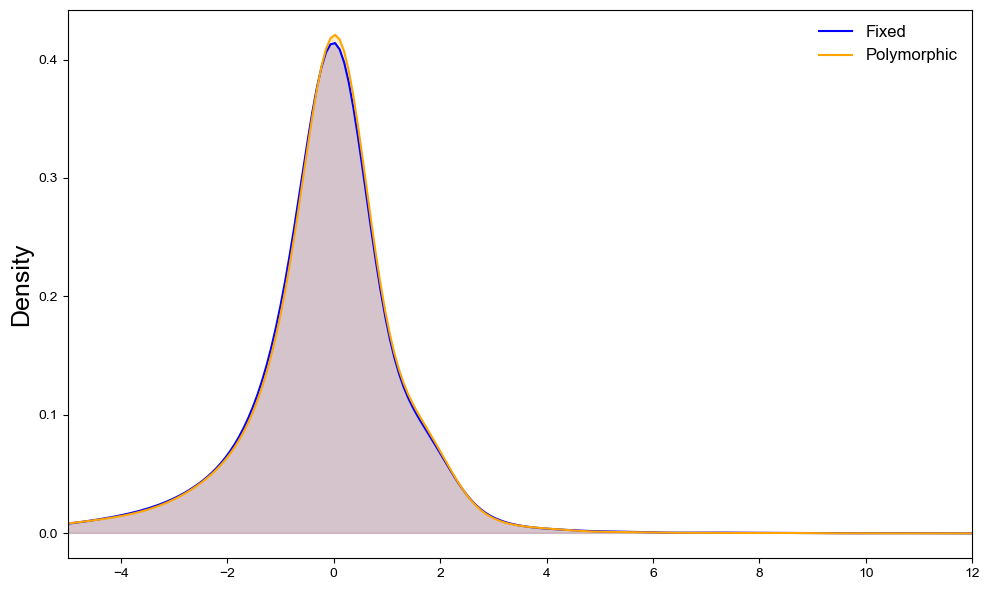

In [103]:
vvv = prepare_alpha(v_mctsn, vv_mctsn)
compute_alpha_new(vvv, plot = True)

In [ ]:
fisher_exact([[3944, 1019], [, 705]])

In [146]:
vv_mctsn

,Unnamed: 0,Position,MAFMaxAcrossAncestry,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Human ref,Human alt,Chimp ref,Gorilla ref,UnfoldedMAF,Chrom,Pos,FixedOrPoly
chr1:101133683-C-G,chr1:101133683,chr1:101133683,0.376348,S1PR1,103272,0.768,0.000,331,0.013882,184.69028,186.47601,0.013882,C,G,C,C,0.376348,chr1,101133683,Polymorphic
chr1:101317434-C-T,chr1:101317434,chr1:101317434,0.312249,S1PR1,80478,1.244,0.000,176,0.021388,599.01874,607.96545,0.021388,C,T,C,C,0.312249,chr1,101317434,Polymorphic
chr1:101411090-T-G,chr1:101411090,chr1:101411090,0.299342,S1PR1,174134,1.295,0.002,101,-0.043148,353.20782,342.80054,0.043148,T,G,T,T,0.299342,chr1,101411090,Polymorphic
chr1:101411363-C-T,chr1:101411363,chr1:101411363,0.301119,S1PR1,174408,-2.468,0.003,101,-0.025653,244.31900,240.01312,0.025653,C,T,C,C,0.301119,chr1,101411363,Polymorphic
chr1:102622000-A-G,chr1:102622000,chr1:102622000,0.375146,COL11A1,486508,0.486,0.003,101,-0.002216,177.18985,176.91786,0.002216,A,G,A,A,0.375146,chr1,102622000,Polymorphic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:26544141-A-G,chrX:26544141,chrX:26544141,0.400754,MAGEB5,327406,0.563,0.000,356,-0.008855,1033.77670,1027.45130,0.008855,A,G,G,G,0.599246,chrX,26544141,Polymorphic
chrX:26544166-C-T,chrX:26544166,chrX:26544166,0.403119,MAGEB5,327431,1.465,0.121,173,-0.000843,1081.55570,1080.92360,0.000843,C,T,T,T,0.596881,chrX,26544166,Polymorphic
chrX:26544422-G-C,chrX:26544422,chrX:26544422,0.401677,MAGEB5,327687,-0.173,0.002,173,-1.468582,1359.52120,491.24567,1.468582,G,C,C,C,0.598323,chrX,26544422,Polymorphic
chrX:34786116-G-A,chrX:34786116,chrX:34786116,0.621699,TMEM47,128817,0.785,0.001,428,0.007286,159.01355,159.81866,0.007286,G,A,A,A,0.378301,chrX,34786116,Polymorphic


In [145]:
vv_mctsn[vv_mctsn["fixed logfc"] < -0.1]

KeyError: 'fixed logfc'

(0.13840760408208463,
 0.13248368587249726,
 [0.13248368587249726,
  1.6642233253310175,
  1.9247232640144394,
  2.5082431266653042,
  2.914623031011442,
  4.4567826680173],
 'dc > 0.1, likely stable',
 [[3933, 13905], [967, 3968]],
 <Figure size 1000x600 with 1 Axes>)

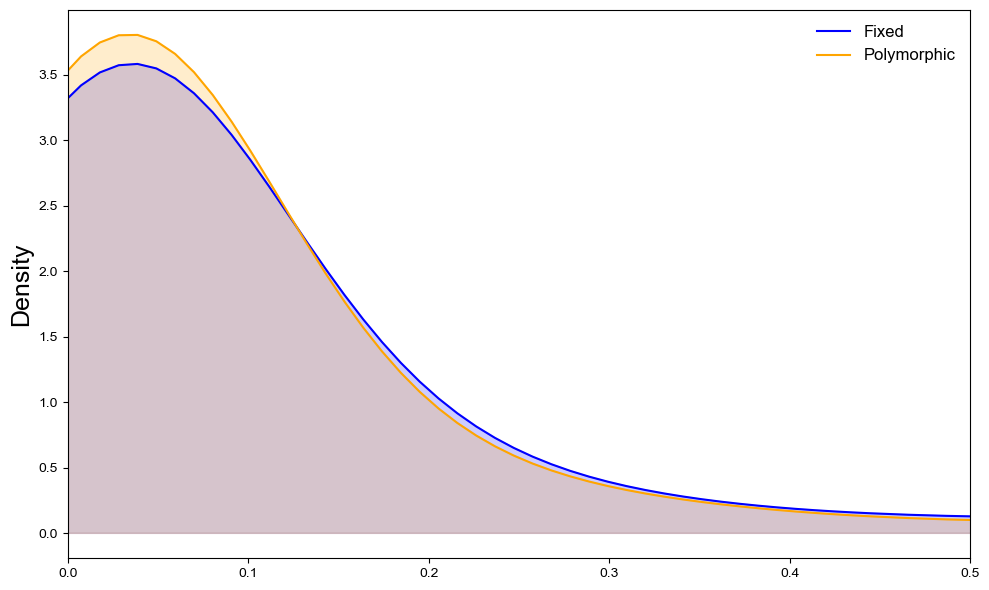

In [140]:
vvv = prepare_alpha(v_mctsn, vv_mctsn, stat = "abs logfc")
compute_alpha_new(vvv, plot = True, window = [0, 0.5])

(0.08105885436431115,
 0.08038369813581292,
 [0.08038369813581292,
  1.1223834528695003,
  1.226583428342869,
  1.3724633940055853,
  1.4037233866475956,
  1.6746433228783544,
  1.8934632713724286,
  2.0080832443931342,
  2.0706032296771557,
  2.2477431879818823,
  2.299843175718567,
  2.4769831340232935,
  2.539503119307315,
  2.581183109496662,
  2.852103045727421,
  3.1438629770528532,
  3.4773028985676335,
  4.4567826680173],
 'dc > 0.1, likely stable',
 [[11690, 58728], [3114, 17024]],
 <Figure size 1000x600 with 1 Axes>)

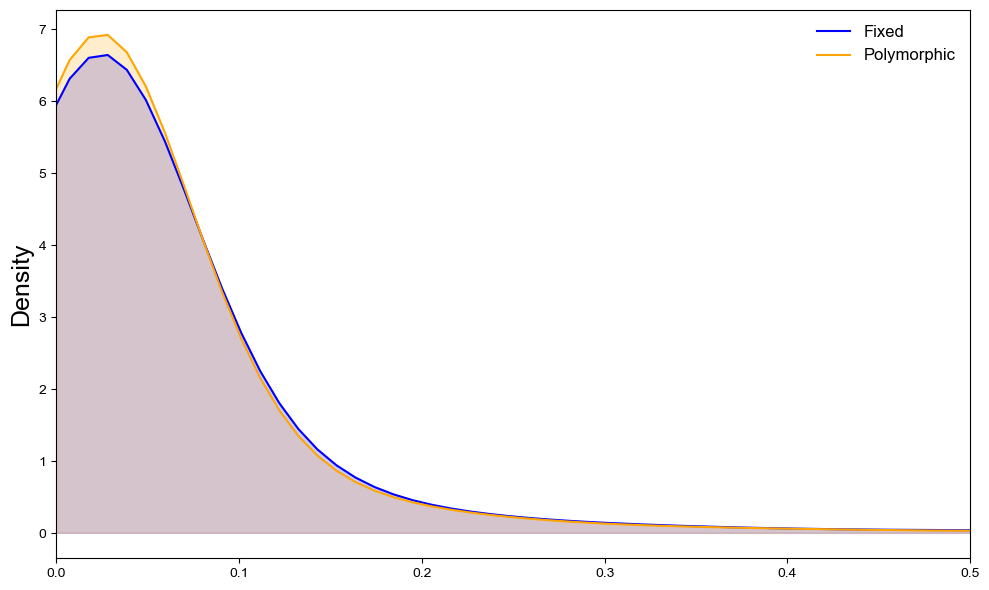

In [104]:
vvv = prepare_alpha(v_mctsn2, vv_mctsn2, stat = "abs logfc")
compute_alpha_new(vvv, plot = True, window = [0, 0.5])

In [108]:
fisher_exact([[6094, 53723], [1630, 15684]])

SignificanceResult(statistic=1.0914690432597387, pvalue=0.002788861549937028)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.08380360746335125,
 0.09728854348323435,
 [0.04280744068418296,
  0.09728854348323435,
  0.197170565281495,
  0.2425714842807044,
  0.3696940574784908,
  0.43325534407738386,
  0.660259939073431,
  0.7510617770718497,
  0.805542879870901,
  0.8418636150702687,
  0.9235852692688455,
  1.0053069234674226,
  1.04162765866679,
  1.2232313346636277,
  1.4593161134595167,
  1.5228774000584098,
  1.904245119651769,
  3.8837251880173],
 'dc > 0.1, likely stable',
 [[6094, 53723], [1630, 15684]],
 <Figure size 1000x600 with 1 Axes>)

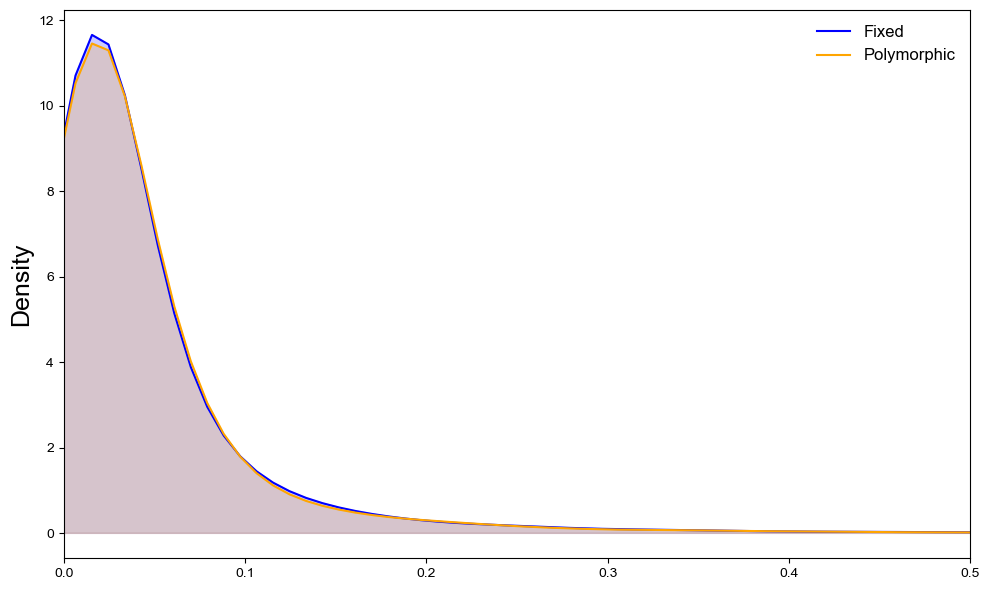

In [105]:
vvv = prepare_alpha(v_mctsn[~v_mctsn["Position"].isin(v_mcts["Position"])], vv_mctsn[~vv_mctsn["Position"].isin(vv_mcts["Position"])], stat = "abs logfc")
compute_alpha_new(vvv, plot = True, window = [0, 0.5])

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.05820168202332776,
 0.17416433173172507,
 [0.17416433173172507,
  1.153643919755495,
  1.4558237926564455,
  1.653803709384654,
  1.9351435910510562,
  2.6645432842602466,
  2.9354631703093745,
  4.4567825304314],
 'dc > 0.1, likely stable',
 [[2345, 8256], [596, 2228]],
 <Figure size 1000x600 with 1 Axes>)

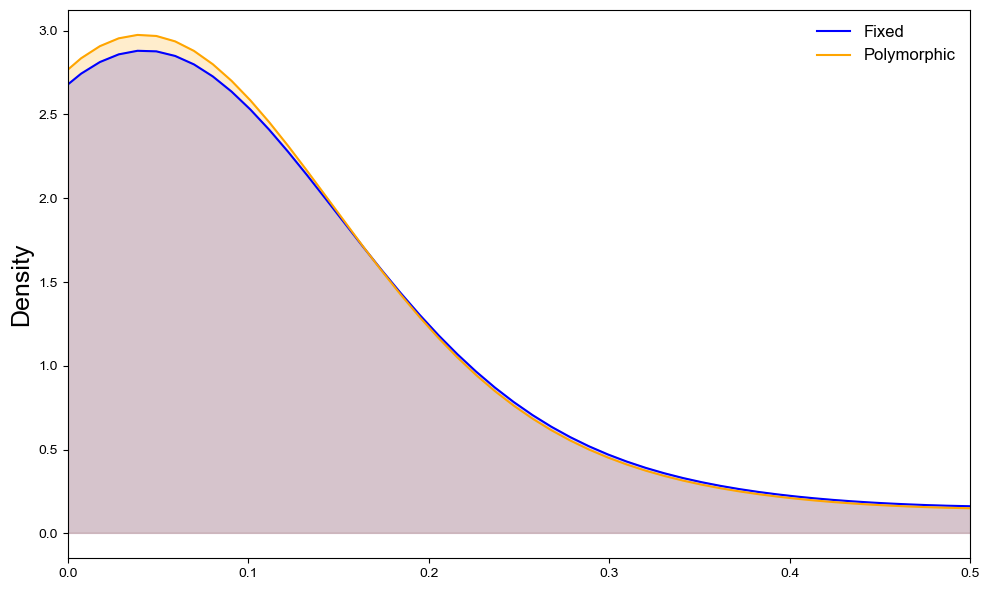

In [109]:
vvv = prepare_alpha(v_mctsn[v_mctsn["Position"].isin(v_mcts["Position"])], vv_mctsn[vv_mctsn["Position"].isin(vv_mcts["Position"])], stat = "abs logfc")
compute_alpha_new(vvv, plot = True, window = [0, 0.5])

In [110]:
fisher_exact([[2345, 8256], [596, 2228]])

SignificanceResult(statistic=1.0617984561157068, pvalue=0.24943994972778086)

In [95]:
v_mctsn[v_mctsn["Position"].isin(v_mcts["Position"])]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
3633,chr1:2276030,chr1:2276030,SKI,47329,-2.810,0.000,270,0.090307,410.77360,437.30835,0.090307,chr1,2276030,Fixed,.,.
4814,chr1:2994422,chr1:2994422,ACTRT2,27062,-0.027,0.001,190,0.079163,783.37476,827.56104,0.079163,chr1,2994422,Fixed,.,.
6999,chr1:3485509,chr1:3485509,ARHGEF16,30867,-3.951,0.000,225,0.000856,346.80444,347.01025,0.000856,chr1,3485509,Fixed,.,.
7821,chr1:3648329,chr1:3648329,WRAP73,1736,0.848,0.000,234,-0.015987,460.56058,455.48520,0.015987,chr1,3648329,Fixed,.,.
9387,chr1:4050336,chr1:4050336,C1orf174,150076,-1.424,0.000,166,0.005665,270.27940,271.34270,0.005665,chr1,4050336,Fixed,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315786,chrX:150552205,chrX:150552205,MTM1,16328,-3.113,0.000,391,-0.029498,301.05267,294.95970,0.029498,chrX,150552205,Fixed,.,.
10315787,chrX:150552242,chrX:150552242,MTM1,16290,0.491,0.000,360,0.002765,311.32474,311.92188,0.002765,chrX,150552242,Fixed,.,.
10318557,chrX:151617791,chrX:151617791,PASD1,54084,-0.357,0.000,378,0.028580,933.14124,951.81116,0.028580,chrX,151617791,Fixed,.,.
10320508,chrX:152336239,chrX:152336239,GABRA3,115069,-0.043,0.000,219,0.056748,412.95627,429.52338,0.056748,chrX,152336239,Fixed,.,.


In [111]:
vv_mctsn[vv_mctsn["Position"].isin(vv_mcts["Position"])].shape

(2824, 20)

In [113]:
vv_mctsn

,Unnamed: 0,Position,MAFMaxAcrossAncestry,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Human ref,Human alt,Chimp ref,Gorilla ref,UnfoldedMAF,Chrom,Pos,FixedOrPoly
chr1:101133683-C-G,chr1:101133683,chr1:101133683,0.376348,S1PR1,103272,0.768,0.000,331,0.013882,184.69028,186.47601,0.013882,C,G,C,C,0.376348,chr1,101133683,Polymorphic
chr1:101139197-T-C,chr1:101139197,chr1:101139197,0.254060,S1PR1,97758,-0.225,0.000,383,-0.029380,749.46130,734.35300,0.029380,T,C,T,T,0.254060,chr1,101139197,Polymorphic
chr1:101317434-C-T,chr1:101317434,chr1:101317434,0.312249,S1PR1,80478,1.244,0.000,176,0.021388,599.01874,607.96545,0.021388,C,T,C,C,0.312249,chr1,101317434,Polymorphic
chr1:101411090-T-G,chr1:101411090,chr1:101411090,0.299342,S1PR1,174134,1.295,0.002,101,-0.043148,353.20782,342.80054,0.043148,T,G,T,T,0.299342,chr1,101411090,Polymorphic
chr1:101411363-C-T,chr1:101411363,chr1:101411363,0.301119,S1PR1,174408,-2.468,0.003,101,-0.025653,244.31900,240.01312,0.025653,C,T,C,C,0.301119,chr1,101411363,Polymorphic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:5367634-C-T,chrX:5367634,chrX:5367634,0.422816,NLGN4X,860334,-0.470,0.000,168,-0.062897,234.72195,224.70868,0.062897,C,T,T,T,0.577184,chrX,5367634,Polymorphic
chrX:54477411-T-C,chrX:54477411,chrX:54477411,0.431112,FGD1,18624,0.106,0.947,400,-0.012080,174.20322,172.75067,0.012080,T,C,C,C,0.568888,chrX,54477411,Polymorphic
chrX:6009749-T-C,chrX:6009749,chrX:6009749,0.320660,NLGN4X,218218,-1.459,0.000,237,-0.113494,574.67820,531.20190,0.113494,T,C,C,C,0.679340,chrX,6009749,Polymorphic
chrX:69554632-G-A,chrX:69554632,chrX:69554632,0.566125,FAM155B,49392,1.927,0.001,368,-0.011205,706.06995,700.60730,0.011205,G,A,A,A,0.433875,chrX,69554632,Polymorphic


In [147]:


fd = v_mctsn_fo[v_mctsn_fo["logfc"] > 0.1].shape[0]
fu = v_mctsn_fo[v_mctsn_fo["logfc"] < -0.1].shape[0]

pd = vv_mctsn_fo[vv_mctsn_fo["logfc"] > 0.1].shape[0]
pu = vv_mctsn_fo[vv_mctsn_fo["logfc"] < -0.1].shape[0]

fisher_exact([[fu, fd], [pu, pd]])

SignificanceResult(statistic=0.992312089869986, pvalue=0.9091092577650448)

In [123]:
v_mcts[(v_mcts["NearestGene"].isin(["CSMD1"])) & (v_mcts["logfc"] < -0.25)]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,...,Tau_Allele1,Tau_Allele2,Tau_abs_logfc,Tau_jsd,Dif,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,Chrom,Pos
9174,chr8:3910071,chr8:3910071,CSMD1,1084848,-0.292,0.0,277,-0.611469,1682.60560,1101.31560,...,0.582314,0.369035,0.970123,0.914671,0.213279,Fixed,.,.,chr8,3910071
9175,chr8:3910072,chr8:3910072,CSMD1,1084846,-2.185,0.0,277,-0.675406,1685.15060,1055.16720,...,0.583686,0.362566,0.912104,0.922875,0.221120,Fixed,.,.,chr8,3910072
9184,chr8:4955072,chr8:4955072,CSMD1,39846,-0.874,0.0,223,-0.258535,311.17352,260.12134,...,0.642964,0.422260,0.898689,0.927695,0.220704,Fixed,.,.,chr8,4955072
9187,chr8:5111483,chr8:5111483,CSMD1,116564,-0.282,0.0,344,-1.156695,1899.65590,852.06960,...,0.796129,0.547192,0.968848,0.971394,0.248937,Fixed,.,.,chr8,5111483
9191,chr8:5249445,chr8:5249445,CSMD1,254526,0.443,0.0,228,-0.781395,1563.85280,909.85570,...,0.715470,0.494321,0.949024,0.880266,0.221149,Fixed,.,.,chr8,5249445
9195,chr8:5456329,chr8:5456329,CSMD1,461410,-2.553,0.0,190,-1.415566,1009.40310,378.38766,...,0.692675,0.243090,0.989170,0.964641,0.449585,Fixed,.,.,chr8,5456329
9198,chr8:5646087,chr8:5646087,CSMD1,651168,-1.977,0.0,170,-0.582233,855.52655,571.43100,...,0.512342,0.278902,0.491026,0.544861,0.233440,Fixed,.,.,chr8,5646087


In [122]:
v_mctsn_fo[(v_mctsn_fo["NearestGene"].isin(["CSMD1"])) & (v_mctsn_fo["logfc"] < -0.25)]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
8965246,chr8:3909253,chr8:3909253,CSMD1,1085666,0.130,0.000,288,-0.459002,730.76746,531.62560,0.459002,chr8,3909253,Fixed,.,.
8965265,chr8:3910229,chr8:3910229,CSMD1,1084690,-0.266,0.000,324,-0.503853,1716.01030,1210.16640,0.503853,chr8,3910229,Fixed,.,.
8975518,chr8:4988004,chr8:4988004,CSMD1,6914,0.188,0.946,104,-0.335260,645.64480,511.76483,0.335260,chr8,4988004,Fixed,.,.
8976589,chr8:5111346,chr8:5111346,CSMD1,116428,-0.107,0.000,208,-0.349698,1722.37730,1351.63260,0.349698,chr8,5111346,Fixed,.,.
8977578,chr8:5249310,chr8:5249310,CSMD1,254392,0.001,0.000,230,-0.351991,1572.85440,1232.33500,0.351991,chr8,5249310,Fixed,.,.
8977582,chr8:5249484,chr8:5249484,CSMD1,254566,0.848,0.000,329,-0.290313,1459.15380,1193.18580,0.290313,chr8,5249484,Fixed,.,.


In [121]:
v[v["NearestGene"].isin(["CSMD1"])]

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Chrom,Pos
8961713,chr8:3520077,chr8:3520077,CSMD1,1474842,-0.076,0.000,286,-0.004313,242.15323,241.430330,0.004313,chr8,3520077
8961714,chr8:3520260,chr8:3520260,CSMD1,1474658,-0.008,0.000,255,0.067826,208.88422,218.939150,0.067826,chr8,3520260
8961715,chr8:3520325,chr8:3520325,CSMD1,1474594,-0.672,0.000,264,0.014600,211.49800,213.649230,0.014600,chr8,3520325
8961716,chr8:3520427,chr8:3520427,CSMD1,1474492,-0.762,0.000,264,0.013961,217.01901,219.129360,0.013961,chr8,3520427
8961717,chr8:3520822,chr8:3520822,CSMD1,1474096,-0.009,0.000,268,-0.003743,290.62430,289.871250,0.003743,chr8,3520822
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8981448,chr8:5699709,chr8:5699709,CSMD1,704790,-0.367,0.000,180,0.008050,168.75546,169.699690,0.008050,chr8,5699709
8981449,chr8:5699898,chr8:5699898,CSMD1,704980,-0.579,0.000,197,0.012839,136.84518,138.068450,0.012839,chr8,5699898
8981450,chr8:5700406,chr8:5700406,CSMD1,705488,1.457,0.001,170,-0.023100,138.86896,136.663120,0.023100,chr8,5700406
8981451,chr8:5700708,chr8:5700708,CSMD1,705790,1.445,0.000,170,-0.123691,133.40283,122.441956,0.123691,chr8,5700708


In [128]:
fisher_exact([[6153, 32583], [1555, 8879]])

SignificanceResult(statistic=1.078274933380623, pvalue=0.014594384684793408)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.07259274138480998,
 0.09080369568314972,
 [0.09080369568314972,
  1.1015434577748264,
  1.205743433248195,
  1.3516233989109114,
  1.4141433841949325,
  1.7475833057097128,
  1.9247232640144394,
  1.9872432492984604,
  2.0706032296771557,
  2.445723141381283,
  2.945883023653453,
  3.1438629770528532,
  3.4877228961149704,
  4.4567826680173],
 'dc > 0.1, likely stable',
 [[6153, 32583], [1555, 8879]],
 <Figure size 1000x600 with 1 Axes>)

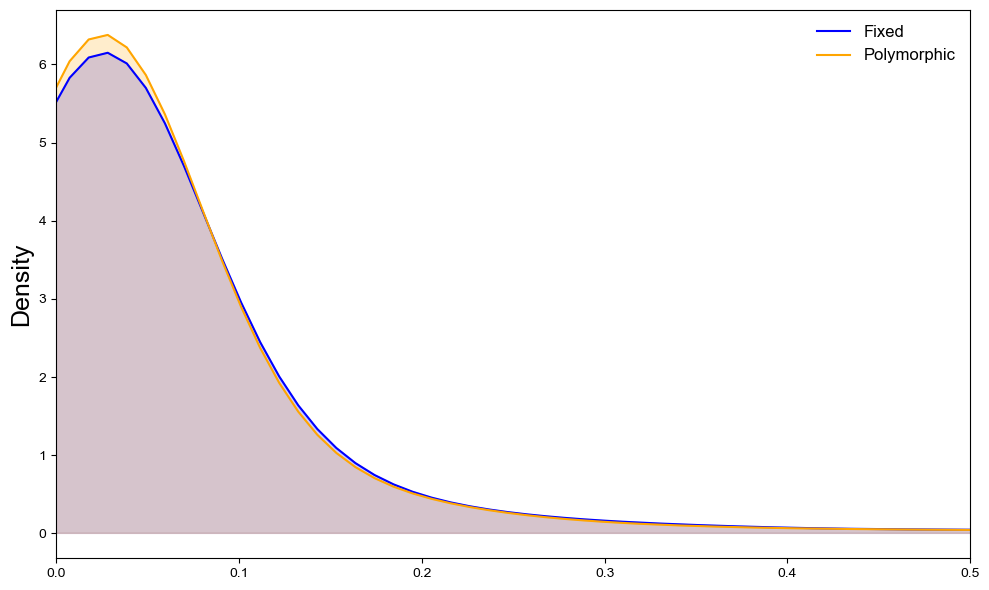

In [127]:
vvv = prepare_alpha(v_mctsn[v_mctsn["SpecSup447"] > 250], vv_mctsn[vv_mctsn["SpecSup447"] > 250], stat = "abs logfc")
compute_alpha_new(vvv, plot = True, window = [0, 0.5])

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.04080961797615901,
 -0.059603607214423704,
 [2.5109815631262578,
  3.6249018036072194,
  4.396077354709423,
  8.16626893787576,
  9.62293386773548,
  16.6492],
 'dc > 0.1, likely stable',
 [[20192, 18544], [5543, 4891]],
 <Figure size 1000x600 with 1 Axes>)

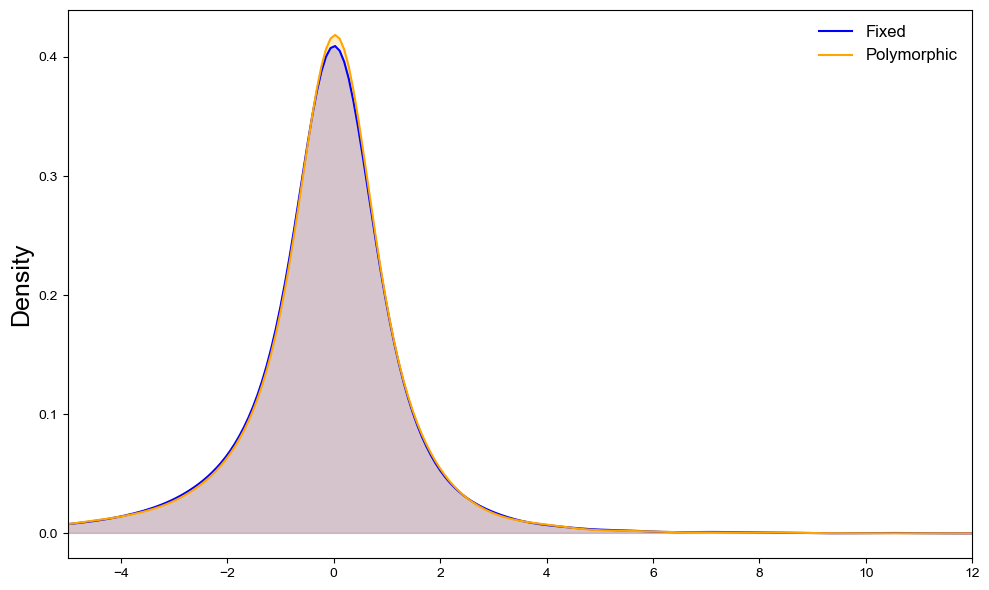

In [126]:
vvv = prepare_alpha(v_mctsn[v_mctsn["SpecSup447"] > 250], vv_mctsn[vv_mctsn["SpecSup447"] > 250], stat = "PhyloP447")
compute_alpha_new(vvv, plot = True)